# Single-unit curation with CEBRA

* **Problem**: Despite substantial progress in spike sorting, the isolation of high-quality single-units is still not a fully automated and objective process. 
    * The hundreds of single-units isolated by SOTA spike sorters such as Kilosort4 still requires labor intensive manual curation, which remained a subjective and biased process [REF]. Kilosort2-4, the most sophisticated and accurate algorithms, isolate single-units that do not violate a specified interspike interval. 
    * Yet, accurate sorting requires that all the action potentials of a ground truth unit be assigned to one single-unit. Actual isolation still allows for biases such that the isolated single-units contain spikes from more than a single ground truth unit (overmerger),  miss a large proportion of spikes from a ground truth unit (incomplete), of be redundant by detecting the spikes of a ground truth units that is also captured by another sorted single-unit, or essentially capture noise (false positive). These biases have significant impact on neural code modeling and interpretation.
* Purpose: Fully automate the spike sorting of high-quality single-units.
* Hypothesis: If the action potential waveforms of high-quality single-units have temporal features that are distinct from poorly isolated units, we should be able to isolate a reduced latent space on which they separate into two clusters. We should be able to train a machine learning algorithm to decode their reduced representation with good accuracy.

* Methods:
    * Method 1: 100-Fold cross-validate on the same dataset, split into train and tests.
    * Method 2: Test on a new dataset
        * 2a : train on spontaneous, test on evoked
        * 2b(e2s): train on evoked, test on spontaneous
            * e2s-pooled-pm1:
            * e2s-lyr-pm1: 
            * e2s-pooled-pm2:
            * e2s-lyr-pm2:

    * Model selection:
        * 3-dimensional output:
            * parameters 1 (10 receptive fields):
                * Train on spontaneous, test on left-out spontaneous:
                    * **Run 1** - pooled: 
                        * RESULTS: near 100% precision and recalls
                * Train on evoked, test on left-out evoked:
                    * **Run 2** - pooled:
                        * RESULTS: near 100% precision and recalls
                        * CONCLUSION: the model generalizes perfectly within the same activity regime.
                * Train on spontaneous, test on evoked:
                    * **Run 3** - pooled: {'accuracy': 0.9667330110889963, 'bal_accuracy': 0.9009521388910613, 'precision': 0.5806451612903226, 'recall': 0.8289473684210527, 'f1_score': 0.6829268292682927}
                        * RESULTS: precision is too low to be useful. The model has a high recall but classifies too many poor units as good units (False positives).
                    * **Run 4** - by layer:
                        * l23: {'accuracy': 0.8709677419354839, 'bal_accuracy': 0.6, 'precision': 1.0, 'recall': 0.2, 'f1_score': 0.3333333333333333}
                        * l4: {'accuracy': 0.5, 'bal_accuracy': 0.6578947368421053, 'precision': 0.35, 'recall': 1.0, 'f1_score': 0.5185185185185185}
                        * l5: {'accuracy': 0.9230058515552818, 'bal_accuracy': 0.927609219682967, 'precision': 0.2197452229299363, 'recall': 0.9324324324324325, 'f1_score': 0.3556701030927835}
                        * l6: {'accuracy': 0.7333333333333333, 'bal_accuracy': 0.7666666666666666, 'precision': 0.5652173913043478, 'recall': 0.8666666666666667, 'f1_score': 0.6842105263157895}
                            * RESULTS: precision is too low to be useful for all layers. The model tend to have a high recall but classifies too many poor units as good units.
                * Train on evoked, test on spontaneous:
                    * **Run 5** - pooled - pm1 : {'accuracy': 0.8317214700193424, 'bal_accuracy': 0.720889530514575, 'precision': 0.7558139534883721, 'recall': 0.4961832061068702, 'f1_score': 0.5990783410138248}
                        * RESULTS: precision is well above chance. The model still classifies too many poor units as good units.
                    * **Run 6** - by layer - pm1:  
                        * l23: {'accuracy': 0.8125, 'bal_accuracy': 0.4642857142857143, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
                        * l4: {'accuracy': 0.864406779661017, 'bal_accuracy': 0.8464285714285714, 'precision': 0.9, 'recall': 0.75, 'f1_score': 0.8181818181818182}
                        * l5: {'accuracy': 0.8426666666666667, 'bal_accuracy': 0.791958041958042, 'precision': 0.6043956043956044, 'recall': 0.7051282051282052, 'f1_score': 0.650887573964497}
                        * l6: {'accuracy': 0.746268656716418, 'bal_accuracy': 0.763425925925926, 'precision': 0.6388888888888888, 'recall': 0.8518518518518519, 'f1_score': 0.7301587301587301}
                            * RESULTS: precision improves again for all layers except l23 (few samples).
                            * CONCLUSION: the activity regime is a richer better training dataset - it contains more diverse training examples - that favor generalization.
                    * **Run 7** - pooled - pm2: {'accuracy': 0.7388781431334622, 'bal_accuracy': 0.7015781355060713, 'precision': 0.4880952380952381, 'recall': 0.6259541984732825, 'f1_score': 0.5484949832775919}
                    * **Run 8** - by layer - pm2:
                        * l23: {'mae': 0.0, 'r2': -0.7142857142857142, 'accuracy': 0.8125, 'bal_accuracy': 0.6785714285714286, 'precision': 0.3333333333333333, 'recall': 0.5, 'f1_score': 0.4}
                        * l4: {'mae': 0.0, 'r2': -0.4047619047619051, 'accuracy': 0.6610169491525424, 'bal_accuracy': 0.6553571428571429, 'precision': 0.5769230769230769, 'recall': 0.625, 'f1_score': 0.6}
                        * l5: {'mae': 0.0, 'r2': -0.5216265216265215, 'accuracy': 0.7493333333333333, 'bal_accuracy': 0.6526806526806527, 'precision': 0.41304347826086957, 'recall': 0.48717948717948717, 'f1_score': 0.4470588235294118}
                        * l6: {'mae': 0.0, 'r2': -0.7370370370370372, 'accuracy': 0.582089552238806, 'bal_accuracy': 0.6018518518518519, 'precision': 0.48717948717948717, 'recall': 0.7037037037037037, 'f1_score': 0.5757575757575758}
                            * RESULTS: reduces size of the receptive field and time_offset consistently reduces precision and recall for all layers.                            
                            * CONCLUSION: The model does better with a larger receptive field.
                    
                    * **Run 9** - pooled - pm3: {'accuracy': 0.8104448742746615, 'bal_accuracy': 0.7242910255903177, 'precision': 0.6486486486486487, 'recall': 0.549618320610687, 'f1_score': 0.5950413223140496}
                    * **Run 10** - by layer - pm3:
                        * l23: {'mae': 0.0, 'r2': -0.1428571428571428, 'accuracy': 0.875, 'bal_accuracy': 0.5, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
                        * l4: {'mae': 0.0, 'r2': 0.22738095238095224, 'accuracy': 0.8135593220338984, 'bal_accuracy': 0.7904761904761904, 'precision': 0.8421052631578947, 'recall': 0.6666666666666666, 'f1_score': 0.7441860465116279}
                        * l5: {'mae': 0.0, 'r2': 0.061124061124061324, 'accuracy': 0.8453333333333334, 'bal_accuracy': 0.6707459207459208, 'precision': 0.7631578947368421, 'recall': 0.3717948717948718, 'f1_score': 0.5}
                        * l6: {'mae': 0.0, 'r2': 0.06944444444444431, 'accuracy': 0.7761194029850746, 'bal_accuracy': 0.7643518518518518, 'precision': 0.7307692307692307, 'recall': 0.7037037037037037, 'f1_score': 0.7169811320754716}
                            * RESULTS: increasing dimensionality to 4 marginally improves precision.
                            * CONCLUSION: the discriminative features could be higher dimensional than 4.                        

                    * `**Run 11**` - pooled - pm4: {'accuracy': 0.8143133462282398, 'bal_accuracy': 0.7142744136376221, 'precision': 0.6767676767676768, 'recall': 0.5114503816793893, 'f1_score': 0.5826086956521739}
                    * `**Run 12**` - by layer - pm4:
                        * l23: {'accuracy': 0.875, 'bal_accuracy': 0.7142857142857143, 'precision': 0.5, 'recall': 0.5, 'f1_score': 0.5}
                        * l4: {'accuracy': 0.847457627118644, 'bal_accuracy': 0.8386904761904761, 'precision': 0.8260869565217391, * 'recall': 0.7916666666666666, 'f1_score': 0.8085106382978723}
                        * l5: {'accuracy': 0.864, 'bal_accuracy': 0.6730769230769231, 'precision': 1.0, 'recall': 0.34615384615384615, 'f1_score': 0.5142857142857142}
                        * l6: {'accuracy': 0.7761194029850746, 'bal_accuracy': 0.7703703703703704, 'precision': 0.7142857142857143, 'recall': 0.7407407407407407, 'f1_score': 0.7272727272727273}
                            * RESULTS: increasing dimensionality to 10 (tenth of the raw dimensionality) does noticeably improve precision.
                            * CONCLUSION: the discriminative features are low-dimensional.                        

                    * **Run13** - pooled - pm5: {'mae': 0.0, 'r2': 0.03891943202942705, 'accuracy': 0.8181818181818182, 'bal_accuracy': 0.6992148874737967, 'precision': 0.7228915662650602, 'recall': 0.4580152671755725, 'f1_score': 0.5607476635514018}
                    * **Run 14** - by layer - pm5:
                        * l23: {'mae': 0.0, 'r2': -0.1428571428571428, 'accuracy': 0.875, 'bal_accuracy': 0.5, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
                        *  l4: {'mae': 0.0, 'r2': 0.22738095238095224, 'accuracy': 0.8135593220338984, 'bal_accuracy': 0.7839285714285714, 'precision': 0.8823529411764706, 'recall': 0.625, 'f1_score': 0.7317073170731707}
                        * l5: {'mae': 0.0, 'r2': 0.012561512561512722, 'accuracy': 0.8373333333333334, 'bal_accuracy': 0.7696840196840197, 'precision': 0.6, 'recall': 0.6538461538461539, 'f1_score': 0.6257668711656442}
                        * l6: {'mae': 0.0, 'r2': -0.1166666666666667, 'accuracy': 0.7313432835820896, 'bal_accuracy': 0.7449074074074074, 'precision': 0.6285714285714286, 'recall': 0.8148148148148148, 'f1_score': 0.7096774193548387}
                            * RESULTS: increasing dimensionality to 60 (half raw dimensionality) does not noticeably improve precision nor recall.
                            * CONCLUSION: the discriminative features are low-dimensional.

                    * ***Run 15** - pooled - balanced: {'accuracy': 0.7756286266924565, 'bal_accuracy': 0.726189534469802, 'precision': 0.5503355704697986, 'recall': 0.6259541984732825, 'f1_score': 0.5857142857142857}
                    * ***Run 16** - by layer - balanced
                        * l23: {'mae': 0.0, 'r2': -0.1428571428571428, 'accuracy': 0.875, 'bal_accuracy': 0.9285714285714286, 'precision': 0.5, 'recall': 1.0, 'f1_score': 0.6666666666666666}
                        * l4: {'mae': 0.0, 'r2': 0.15714285714285703, 'accuracy': 0.7966101694915254, 'bal_accuracy': 0.7761904761904761, 'precision': 0.8, 'recall': 0.6666666666666666, 'f1_score': 0.7272727272727273}
                        * l5: {'mae': 0.0, 'r2': -0.4406889406889405, 'accuracy': 0.7626666666666667, 'bal_accuracy': 0.7225459725459725, 'precision': 0.45132743362831856, 'recall': 0.6538461538461539, 'f1_score': 0.5340314136125655}
                        * l6: {'mae': 0.0, 'r2': -0.1787037037037038, 'accuracy': 0.7164179104477612, 'bal_accuracy': 0.7504629629629629, 'precision': 0.5952380952380952, 'recall': 0.9259259259259259, 'f1_score': 0.7246376811594203}
                            * RESULTS: balancing CEBRA training dataset noticeably degrade predicision, probably due to insufficient training samples.

                    * **Run 17** - pooled: {'accuracy': 0.8143133462282398, 'bal_accuracy': 0.7167958707431872, 'precision': 0.6732673267326733, 'recall': 0.5190839694656488, 'f1_score': 0.5862068965517241}

                    * **Run 18** - by layer:
                        * l23: {'mae': 0.0, 'r2': -0.7142857142857142, 'accuracy': 0.8125, 'bal_accuracy': 0.4642857142857143, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
                        * l4: {'mae': 0.0, 'r2': 0.438095238095238, 'accuracy': 0.864406779661017, 'bal_accuracy': 0.8464285714285714, 'precision': 0.9, 'recall': 0.75, 'f1_score': 0.8181818181818182}
                        * l5: {'mae': 0.0, 'r2': 0.23918673918673927, 'accuracy': 0.8746666666666667, 'bal_accuracy': 0.7790727790727792, 'precision': 0.7384615384615385, 'recall': 0.6153846153846154, 'f1_score': 0.6713286713286714}
                        * l6: {'mae': 0.0, 'r2': 0.25555555555555554, 'accuracy': 0.8208955223880597, 'bal_accuracy': 0.7958333333333334, 'precision': 0.8571428571428571, 'recall': 0.6666666666666666, 'f1_score': 0.75}
                            * RESULTS: augmenting the waveform dataset with quality metrics increased layer-wise model precision by 10% and globally kept layer-wise precision high.

                    * `**Run 19**`: pooled: {'mae': 0.0, 'r2': 0.13772599437525102, 'accuracy': 0.8356164383561644, 'bal_accuracy': 0.7444154278826838, 'precision': 0.7373737373737373, 'recall': 0.5572519083969466, 'f1_score': 0.6347826086956522}

                    * `**Run 20**` - by layer:
                        * l23: {'mae': 0.0, 'r2': -0.1538461538461542, 'accuracy': 0.8666666666666667, 'bal_accuracy': 0.5, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
                        * l4: {'mae': 0.0, 'r2': 0.218137254901961, 'accuracy': 0.8103448275862069, 'bal_accuracy': 0.8014705882352942, 'precision': 0.782608695652174, 'recall': 0.75, 'f1_score': 0.7659574468085106}
                        * l5: {'mae': 0.0, 'r2': 0.12339196639537908, 'accuracy': 0.8544474393530997, 'bal_accuracy': 0.7385140456812811, 'precision': 0.7, 'recall': 0.5384615384615384, 'f1_score': 0.6086956521739131}
                        * l6: {'mae': 0.0, 'r2': 0.37962962962962954, 'accuracy': 0.8507462686567164, 'bal_accuracy': 0.8268518518518518, 'precision': 0.9047619047619048, 'recall': 0.7037037037037037, 'f1_score': 0.7916666666666666}
                            * RESULTS: increasing the number of spikes to 50 instead of 25 increased pooled precision by 10%.

* RESULTS:
    * A large `spike sample size` (50) increases precision and recall.
    * intermediate-size `dimensionality` (10 dimensions) increases precision.
    * augmenting waveform latent dataset with `quality metrics` increased precision and recall
    * `Large receptive fields` of size 10 which have better representation than size 1 improve precision.
    * The best (best generalization performance) model seems to be the **Run 12** (layer-wise) and **Run 11** (Pooled) with a 10-dimensional latent space and receptive field of size 10 (offset-10-model).

* note: all accuracies will spuriously be high because the datasets are severely imbalanced in favor of poor units. This metric is unreliable. We use balanced accuracy, precision, recall and f1_score instead. R-squared is also not an adapted metric for binary classification. Precision is the most important metrics to maximize the quality of sorting.
* k-NN was choosen because it makes no assumption about the geometry of the decision boundary between binary classes.
* note 
    * higher time_offset should increase the quality of the representation.
    * the "offset10-model" increase by more than 30% the precision of run 5, 6 compared to the "offset10-model-mse".
    * with above chance precision, the user can still use the model by discarding the rejected units, and focussing on curating only the flagged units. Saves significant amount of time.
* 

DOING: 
- run 5 and 6


TODO:
- set batch_size to entire dataset: None

### Setup

- For now setup `cebraspike3`
- pip install numba

In [2]:
%load_ext autoreload
%autoreload 2
import os
import spikeinterface as si
import spikeinterface.core.template_tools as ttools
from spikeinterface import comparison
from spikeinterface.qualitymetrics import compute_quality_metrics as qm
from spikeinterface import qualitymetrics
import pandas as pd
from cebra import CEBRA
import cebra
import torch
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
from sklearn import metrics
import cebra.models
import shutil
from spikeinterface.postprocessing import compute_principal_components
import multiprocessing

# set project path
proj_path = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023/"
os.chdir(proj_path)

from src.nodes.utils import get_config
from src.nodes import utils
from src.nodes.utils import euclidean_distance

# npx spont. biophy.
cfg_ns, _ = get_config("silico_neuropixels", "concatenated").values()
KS4_ns_10m = cfg_ns["sorting"]["sorters"]["kilosort4"]["10m"][
    "output"
]  # sorting with KS4
GT_ns_10m = cfg_ns["sorting"]["simulation"]["ground_truth"]["10m"]["output"] # KS4 sorting
STUDY_ns = cfg_ns["postprocessing"]["waveform"]["sorted"]["study"]["kilosort4"][
    "10m"
]  # WaveformExtractor
STUDY_ns_su = '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/0_silico/neuropixels/concatenated_campaigns/postpro/realism/spike/sorted/study_ks4_10m_single_units'
REC_ns = cfg_ns["probe_wiring"]["full"]["output"]  # Wired

# npx evoked biophy.
cfg_ne, _ = get_config("silico_neuropixels", "stimulus").values()
KS4_ne_10m = cfg_ne["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
GT_ne_10m = cfg_ne["sorting"]["simulation"]["ground_truth"]["10m"]["output"]
STUDY_ne = cfg_ne["postprocessing"]["waveform"]["sorted"]["study"]["kilosort4"][
    "10m"
]  # WaveformExtractor
REC_ne = cfg_ne["probe_wiring"]["full"]["output"]  # Wired
STUDY_ne_su = '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/0_silico/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids/0fcb7709-b1e9-4d84-b056-5801f20d55af/postpro/realism/spike/sorted/study_ks4_10m_single_units'

# job parameters
job_kwargs = dict(n_jobs=-1, chunk_duration="1s", progress_bar=True)

# PATHS

# pre-computed sorted unit quality
quality_path = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/sorting_quality.csv"

# model save path
MODEL_PATH_40Khz_s2s_pooled_pm1 = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_40Khz/s2s_pooled_pm1"
MODEL_PATH_20Khz = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/"
MODEL_PATH_20Khz_e2e_pm1 = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2e_pm1/"
MODEL_PATH_20Khz_s2e_pm1 = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/s2e_pm1/"
MODEL_PATH_20Khz_e2s_pm1 = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm1/"
MODEL_PATH_20Khz_e2s_pm2 = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm2/"
MODEL_PATH_20Khz_e2s_pm3 = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm3/"
MODEL_PATH_20Khz_e2s_pm4 = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm4/"
MODEL_PATH_20Khz_e2s_pm5 = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm5/"
MODEL_PATH_20Khz_e2s_pm4_bal = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm4_bal/"
MODEL_PATH_20Khz_e2s_pm4_mixed_dataset = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm4_mixed_dataset/"
MODEL_PATH_20Khz_e2s_pm4_mixed_dataset_2dwave = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm4_mixed_dataset_2dwave/"
MODEL_PATH_20Khz_e2s_pm4_mixed_dataset_1dwave_qmall = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm4_mixed_dataset_1dwave_qmall/"

tight_layout_cfg = {"pad": 0.001}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-09-17 09:41:32,686 - root - utils.py - get_config - INFO - Reading experiment config.
2024-09-17 09:41:32,831 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-09-17 09:41:32,833 - root - utils.py - get_config - INFO - Reading experiment config.
2024-09-17 09:41:32,994 - root - utils.py - get_config - INFO - Reading experiment config. - done


## Specs

In [2]:
# check GPU specs
print("GPU specs:", multiprocessing.cpu_count())

use_cuda = torch.cuda.is_available()
if use_cuda:
    print("__CUDNN VERSION:", torch.backends.cudnn.version())
    print("__Number CUDA Devices:", torch.cuda.device_count())
    print("__CUDA Device Name:", torch.cuda.get_device_name(0))
    print(
        "__CUDA Device Total Memory [GB]:",
        torch.cuda.get_device_properties(0).total_memory / 1e9,
    )

# check CPU specs
print("CPU specs:", multiprocessing.cpu_count())

GPU specs: 72
__CUDNN VERSION: 90100
__Number CUDA Devices: 4
__CUDA Device Name: Tesla V100-SXM2-16GB
__CUDA Device Total Memory [GB]: 16.935419904
CPU specs: 72


# Setup 

* setup cebraspike env.
* faster on node with GPU


# Custom

In [20]:
# DATASET **************************************************


def get_waveformExtractor_for_single_units(
    sort_path: str,
    study_path,
    save_path: str,
    n_sites=384,
    load_if_exists: bool = False,
    add_pca: bool = True,
):
    """Setup WaveformExtractors to calculate quality metrics for single units

    Args:
        sort_path (str): _description_
        study_path (_type_): _description_
        save_path (str): _description_
        n_sites (int, optional): _description_. Defaults to 384.
        load_if_exists: bool=False (bool)
        add_pca (bool): only if load_if_exists=False

    Returns:
        _type_: _description_
    """
    # compute
    if not load_if_exists:
        # get single units
        Sorting = si.load_extractor(sort_path)
        su_ix = np.where(Sorting.get_property("KSLabel") == "good")[0]
        su_unit_ids = Sorting.unit_ids[su_ix]

        # load WaveformExtractor
        We = si.WaveformExtractor.load_from_folder(study_path)

        # create waveformExtractor for single units
        # which we will keep for all downstream analyses
        # this should speed up computations
        shutil.rmtree(save_path, ignore_errors=True)
        WeSu = We.select_units(unit_ids=su_unit_ids, new_folder=save_path)

        # setup two properties required to calculate some quality metrics
        WeSu.recording.set_property("gain_to_uV", np.ones((n_sites,)))
        WeSu.recording.set_property("offset_to_uV", np.zeros((n_sites,)))

        # augment extractors with pca results
        if add_pca:
            _ = compute_principal_components(
                waveform_extractor=WeSu,
                n_components=5,
                mode="by_channel_local",
                **job_kwargs,
            )
    else:
        # or load existing
        WeSu = si.WaveformExtractor.load_from_folder(save_path)
    return WeSu


def get_good_sorted_unit_ids(
    quality, quality_path: str, sorter: str, exp: str, layer: str, fltd_unit: list
):
    """_summary_

    Args:
        quality (_type_): _description_
        quality_path (str): _description_
        sorter (str): _description_
        exp (str): _description_
        layer (str): _description_
        fltd_unit (list): _description_

    Returns:
        np.array(int): filtered sorted unit ids
    """
    # load quality results
    unit_quality = pd.read_csv(quality_path)

    # select a sorted unit and conditions
    df = unit_quality[
        (unit_quality["quality"].str.contains(quality))
        & (unit_quality["experiment"] == exp)
        & (unit_quality["sorter"] == sorter)
        & (unit_quality["layer"] == layer)
    ]
    # filter units based on previous conditions
    df = df[df["sorted"].isin(fltd_unit)]
    return df["sorted"].values.astype(int)


def get_poor_sorted_unit_ids(
    quality, quality_path: str, sorter: str, exp: str, layer: str, fltd_unit: list
):
    """_summary_

    Args:
        quality (_type_): _description_
        quality_path (str): _description_
        sorter (str): _description_
        exp (str): _description_
        layer (str): _description_
        fltd_unit (list[int]): _description_

    Returns:
        np.array[int]: filtered sorted unit ids
    """
    np.array(fltd_unit).astype(int)

    # load quality results
    unit_quality = pd.read_csv(quality_path)

    # select a sorted unit and conditions
    df = unit_quality[
        (unit_quality["quality"] == quality)
        & (unit_quality["experiment"] == exp)
        & (unit_quality["sorter"] == sorter)
        & (unit_quality["layer"] == layer)
    ]
    df = df[df["sorted"].isin(fltd_unit)]
    return df["sorted"].values.astype(int)


def get_spike_dataset_for(
    unit_ids: np.array,
    we,
    max_spikes: int,
    interval_ms: float,
    sfreq: int,
    downsample: int,
):
    """_summary_

    Args:
        unit_ids (np.array[int]): _description_
        we (_type_): _description_
        max_spikes (int): _description_
        interval_ms (float): _description_
        sfreq (int): _description_
        downsample (int): downsample waveforms to produce
        - a lower sampling frequency (e.g., 2 to reduce a 40 KHz frequency
        to 20 KHz)

    Returns:
        _type_: _description_
    """
    # convert interval in ms to samples
    ttp_sp = we.nbefore
    bef_aft_sp = interval_ms * sfreq / 1000
    interval = np.arange(ttp_sp - bef_aft_sp, ttp_sp + bef_aft_sp, 1).astype(int)

    # get all units nearest channels (with extremum amplitude)
    max_chids = ttools.get_template_extremum_channel(we, peak_sign="both")

    # loop over good units
    # 240 samples (-3 to 3 ms at 40KHz)
    wvs = np.zeros((int(max_spikes * we.nbefore * 2 / downsample), 1))
    unit_label = []
    for unit in unit_ids:

        # get its waveforms (num_spikes, num_samples, num_channels)
        wv = we.get_waveforms(unit_id=unit)

        # get its nearest channel
        c_ids = we.sparsity.unit_id_to_channel_ids[unit]
        max_chid = max_chids[unit]
        max_chid_ix = np.where(c_ids == max_chid)[0][0]

        # get waveform for that channels (2D)
        # and (num_samples, num_spikes)
        # TODO: sample instead of taking the first ones
        wv_i = np.array(wv[:max_spikes, interval[::downsample], max_chid_ix]).flatten()[
            :, None
        ]

        # record waveforms
        wvs = np.hstack([wvs, wv_i])

    wvs = wvs[:, 1:]
    # unit_label = np.array(unit_label)
    unit_label = np.array(unit_ids)
    return wvs, unit_label


def drop_sites(wv, c_ids, max_chid_ix, n_sites):

    # drop channels to get the number of
    # sites for all waveforms
    n_to_drop = wv.shape[2] - n_sites

    # if the channel is located closest to the
    # first site
    if len(c_ids) - max_chid_ix > max_chid_ix:
        # remove the n last sites
        wv = wv[:, :, :-n_to_drop]
    else:
        # remove the n first sites
        n_to_drop = wv.shape[2] - n_sites
        wv = wv[:, :, n_to_drop:]
    return wv


def get_n_nearest_sites(site_coord, max_chid, c_ids, n_sites):
    """get the id and indices of the n_sites nearest
    to the max_chids (site of unit). The sites are
    ordered not by distance but by id to conserve
    their probe grid layout.

    Args:
        site_coord (_type_): _description_
        max_chid (_type_): _description_
        c_ids (_type_): _description_
        n_sites (_type_): _description_

    Returns:
        _type_: _description_
    """
    eudist = []
    for c_i in c_ids:
        eudist.append(euclidean_distance(site_coord[max_chid, :], site_coord[c_i, :]))
    ix = np.argsort(eudist)
    new_c_ix = np.sort(ix[:n_sites])
    new_c_ids = c_ids[new_c_ix]
    return new_c_ids, new_c_ix


def get_2d_spike_dataset_for(
    unit_ids: np.array,
    we,
    max_spikes: int,
    interval_ms: float,
    sfreq: int,
    downsample: int,
    n_sites: int = 25,
    site_coord: np.array = None,
):
    """_summary_

    Args:
        unit_ids (np.array[int]): _description_
        we (_type_): _description_
        max_spikes (int): _description_
        interval_ms (float): _description_
        sfreq (int): _description_
        downsample (int): downsample waveforms to produce
        - a lower sampling frequency (e.g., 2 to reduce a 40 KHz frequency
        to 20 KHz)

    Returns:
        _type_: _description_
    """

    # convert interval in ms to samples
    ttp_sp = we.nbefore
    bef_aft_sp = interval_ms * sfreq / 1000
    interval = np.arange(ttp_sp - bef_aft_sp, ttp_sp + bef_aft_sp, 1).astype(int)

    # loop over units
    # get number of sites subsampled (sparsity)

    # get all units nearest channels (with extremum amplitude)
    max_chids = ttools.get_template_extremum_channel(we, peak_sign="both")

    # preallocate flattened 2D waveform
    wvs = np.zeros((int(max_spikes * we.nbefore * 2 / downsample * n_sites), 1))
    unit_label = []

    # lopp over units and collect waveforms
    for unit in unit_ids:

        # get its waveforms (num_spikes, num_samples, num_channels)
        wv = we.get_waveforms(unit_id=unit)

        # get its nearest channel
        c_ids = we.sparsity.unit_id_to_channel_ids[unit]
        max_chid = max_chids[unit]
        # max_chid_ix = np.where(c_ids == max_chid)[0][0]

        # drop sites away from nearest site to get the
        # same number of sites for all waveforms
        # wv = drop_sites(wv, c_ids, max_chid_ix, n_sites)

        # get nearest sites to the unit (zoom in)
        _, ix_new = get_n_nearest_sites(site_coord, max_chid, c_ids, n_sites)

        # flatten the 2D waveform
        wv_i = np.array(
            wv[:max_spikes, :, ix_new][:, interval[::downsample], :]
        ).flatten()[:, None]

        # record waveforms
        wvs = np.hstack([wvs, wv_i])

    wvs = wvs[:, 1:]
    unit_label = np.array(unit_ids)
    return wvs, unit_label


def get_sorted_unit_best_score(
    KS4_ns_10m: str,
    GT_ns_10m: str,
):
    """Get sorted unit best agreement scores

    Args:
        KS4_ns_10m (str): path of SortingExtractor
        GT_ns_10m (str): path of GroundTruth SortingExtractor

    Returns:
        pd.Series:
        - index_ sorted units
        - values: agreement scores
    """
    SortingTrue = si.load_extractor(GT_ns_10m)
    SortingTrue = SortingTrue.remove_empty_units()
    Sorting = si.load_extractor(KS4_ns_10m)
    comp = comparison.compare_sorter_to_ground_truth(
        SortingTrue,
        Sorting,
        match_mode="hungarian",
        exhaustive_gt=True,
        delta_time=1.3,
        compute_labels=True,
        compute_misclassifications=False,
        well_detected_score=0.8,
        match_score=0.8,  # modified
        redundant_score=0.2,  # default - we don't use that info in this analysis
        overmerged_score=0.2,  # default - we don't use that info in this analysis
        chance_score=0.1,  # default - we don't use that info in this analysis
    )
    return comp.agreement_scores.max()


def get_dataset_for(
    we,
    quality_path: str,
    sorter: str,
    exp: str,
    layer: str,
    max_spikes: int,
    flt_unit: list[int],
    interval_ms: float,
    sfreq: int,
    downsample: int,
    wave_dim: int = 1,
    n_sites: int = 25,
    site_coord: np.array = None,
):
    """get dataset

    Args:
        we (WaveformExtractor): WaveformExtractor
        quality_path (str): path of the pandas dataframe
        - containing sorted unit quality classification
        sorter (str): one of "KS4", "KS3", "KS2.5", "KS2"...
        - contained in the quality dataframe in the "sorter" column
        exp (str): _description_
        layer (str): _description_
        max_spikes (int): _description_
        flt_unit (list[int]): _description_
        interval_ms (float): _description_
        sfreq (int): _description_
        downsample
        wave_dim: waveform dimension
        - 1: for temporal. Waveform are
        are collected from the nearest channel only)
        - 2: spatiotemporal. Waveform are collected from
        the "n_sites" nearest channels
        n_sites: common number of sites to keep if 2D-waveforms

    Returns:
        _type_: _description_
    """

    # get good units (filtered based on some conditions)
    g_units = get_good_sorted_unit_ids(
        "good", quality_path, sorter, exp, layer, flt_unit
    )

    # poor units (filtered based on some conditions)
    p_units = get_poor_sorted_unit_ids(
        "mixed: overmerger + oversplitter", quality_path, sorter, exp, layer, flt_unit
    )

    # if waveform are 1-dim (temporal on nearest channel)
    if wave_dim == 1:
        wvs_good, good_unit_label = get_spike_dataset_for(
            g_units, we, max_spikes, interval_ms, sfreq, downsample
        )
        wvs_poor, poor_unit_label = get_spike_dataset_for(
            p_units, we, max_spikes, interval_ms, sfreq, downsample
        )
    elif wave_dim == 2:
        # if waveform are 2-dim (spatiotemporal on 30 nearest channels)
        wvs_good, good_unit_label = get_2d_spike_dataset_for(
            g_units, we, max_spikes, interval_ms, sfreq, downsample, n_sites, site_coord
        )
        wvs_poor, poor_unit_label = get_2d_spike_dataset_for(
            p_units, we, max_spikes, interval_ms, sfreq, downsample, n_sites, site_coord
        )

    # spike dataset
    spike_data = np.hstack([wvs_good, wvs_poor]).T

    # quality label (1D discrete, CEBRA can handle only one)
    quality_label = np.hstack(
        [np.array([1] * len(good_unit_label)), np.array([0] * len(poor_unit_label))]
    )

    # unit ids
    unit_ids = np.hstack([g_units, p_units])

    return spike_data, quality_label, unit_ids


def get_dataset_by_layer(
    sort_path: str,
    gt_path: str,
    we,
    quality_path: str,
    sorter: str,
    exp: str,
    num_spike: int,
    interval_ms: float,
    downsample: int,
    continuous_qmetrics: bool = False,
    metric_names: list = None,
    qmetrics_in_dataset: bool = False,
    load_if_exists: bool = False,
    wave_dim: int = 1,
    n_sites: int = 25,
    site_coord: np.array = None,
):
    """get a dataset by layer

    Args:
        sort_path (str): _description_
        gt_path (str): ground truth SortingExtractor
        we (WaveformExtractor): WaveformExtractor
        quality_path (str): file path of .csv dataframe with sorted unit
            - quality evaluation
        sorter (str): spike sorter
        exp (str): experiment
        num_spike (int): number of spikes kept from units
        interval_ms (float): interval before and after timestamp in ms
        downsample (int): waveform downsampling factor (1, 2, 3 ...)
        continuous_qmetrics (bool): compute quality metrics
            - needed to use them as auxiliary variables
            - or needed to add them the waveform dataset
        load_if_exists (bool): load all pre-computed datasets if they
        exist.
        n_sites (int): if wave_dim=2, number of nearest sites to keep

    Returns:
        dict: _description_
    """

    # calculate the common maximum number
    # of spikes that it is possible to use
    # across all units (the number of spikes of the
    # least active unit)
    Sorting = si.load_extractor(sort_path)
    unit_spike = Sorting.get_total_num_spikes()
    sfreq = Sorting.get_sampling_frequency()
    print("Recording sampling frequency:", sfreq)

    # select unit ids with at least num_spikes
    n_spike = [unit_spike[key] for key in unit_spike]
    if num_spike == None:
        num_spike = min(n_spike)
        flt_unit = [unit for unit in unit_spike]
    else:
        flt_unit = [unit for unit in unit_spike if unit_spike[unit] > num_spike]

    # get data for CEBRA by layer
    # L2/3
    spike_data_l23, quality_label_l23, unit_ids_l23 = get_dataset_for(
        we,
        quality_path,
        sorter,
        exp,
        "L2/3",
        num_spike,
        flt_unit,
        interval_ms,
        sfreq,
        downsample,
        wave_dim,
        n_sites,
        site_coord,
    )
    # L4
    spike_data_l4, quality_label_l4, unit_ids_l4 = get_dataset_for(
        we,
        quality_path,
        sorter,
        exp,
        "L4",
        num_spike,
        flt_unit,
        interval_ms,
        sfreq,
        downsample,
        wave_dim,
        n_sites,
        site_coord,
    )
    # L5
    spike_data_l5, quality_label_l5, unit_ids_l5 = get_dataset_for(
        we,
        quality_path,
        sorter,
        exp,
        "L5",
        num_spike,
        flt_unit,
        interval_ms,
        sfreq,
        downsample,
        wave_dim,
        n_sites,
        site_coord,
    )
    # L6
    spike_data_l6, quality_label_l6, unit_ids_l6 = get_dataset_for(
        we,
        quality_path,
        sorter,
        exp,
        "L6",
        num_spike,
        flt_unit,
        interval_ms,
        sfreq,
        downsample,
        wave_dim,
        n_sites,
        site_coord,
    )

    # if continuous quality metrics
    # are required
    cont_label_l23 = None
    cont_label_l4 = None
    cont_label_l5 = None
    cont_label_l6 = None

    if continuous_qmetrics:

        print("calculating continuous quality metrics labels")
        job_kwargs = dict(n_jobs=-1, verbose=True, progress_bar=True)

        # add spike amplitudes
        we = add_spike_amplitude_extension(
            we, n_sites=384, load_if_exists=load_if_exists
        )

        # pre-compute Spiketinterface quality metrics
        # 20 secs/unit
        qmetrics = qm(we, load_if_exists=False, skip_pc_metrics=True, **job_kwargs)
        # qmetrics = qm(
        #     we,
        #     qm_params={
        #         "amplitude_cutoff": {
        #             "peak_sign": "neg",
        #             "num_histogram_bins": 100,
        #             "histogram_smoothing_value": 3,
        #             "amplitudes_bins_min_ratio": 0,  # instead of 5
        #         }
        #     },
        #     load_if_exists=True,
        #     skip_pc_metrics=True,
        #     **job_kwargs,
        # )
        qmetrics = qmetrics[
            [
                "amplitude_cutoff",
                "firing_range",
                "firing_rate",
                "isi_violations_ratio",
                "presence_ratio",
                "rp_contamination",
                "rp_violations",
                "sd_ratio",
                "snr",
            ]
        ]

        # pre-compute amplitudes
        amplitudes = si.postprocessing.compute_spike_amplitudes(
            we, peak_sign="neg", outputs="by_unit", load_if_exists=load_if_exists
        )[0]

        # add quality metrics per layer
        cont_label_l23 = get_quality_metrics_table(
            qmetrics,
            amplitudes,
            we,
            unit_ids_l23,
            metrics_name=metric_names,
            load_if_exists=load_if_exists,
            job_kwargs=job_kwargs,
        )
        print("Computed quality metrics for layer 23")

        cont_label_l4 = get_quality_metrics_table(
            qmetrics,
            amplitudes,
            we,
            unit_ids_l4,
            metrics_name=metric_names,
            load_if_exists=load_if_exists,
            job_kwargs=job_kwargs,
        )
        print("Computed quality metrics for layer 4")

        cont_label_l5 = get_quality_metrics_table(
            qmetrics,
            amplitudes,
            we,
            unit_ids_l5,
            metrics_name=metric_names,
            load_if_exists=load_if_exists,
            job_kwargs=job_kwargs,
        )
        print("Computed quality metrics for layer 5")

        cont_label_l6 = get_quality_metrics_table(
            qmetrics,
            amplitudes,
            we,
            unit_ids_l6,
            metrics_name=metric_names,
            load_if_exists=load_if_exists,
            job_kwargs=job_kwargs,
        )
        print("Computed quality metrics for layer 6")

    if qmetrics_in_dataset:
        if not continuous_qmetrics:
            raise ValueError("continuous_qmetrics must be True")

        # add quality metrics to waveform dataset
        spike_data_l23 = np.hstack([spike_data_l23, cont_label_l23])
        spike_data_l4 = np.hstack([spike_data_l4, cont_label_l4])
        spike_data_l5 = np.hstack([spike_data_l5, cont_label_l5])
        spike_data_l6 = np.hstack([spike_data_l6, cont_label_l6])

    # get best scores of sorted unit
    best_score = get_sorted_unit_best_score(
        sort_path,
        gt_path,
    )
    print("ex. data shape (L4):", spike_data_l4.shape)
    print("ex. label shape (L4):", quality_label_l4.shape)

    # bundle dataset for model 1 (by layer)
    dataset1 = {
        "data_l23": spike_data_l23,
        "data_l4": spike_data_l4,
        "data_l5": spike_data_l5,
        "data_l6": spike_data_l6,
        "label_l23": quality_label_l23,
        "label_l4": quality_label_l4,
        "label_l5": quality_label_l5,
        "label_l6": quality_label_l6,
        "cont_label_l23": cont_label_l23,
        "cont_label_l4": cont_label_l4,
        "cont_label_l5": cont_label_l5,
        "cont_label_l6": cont_label_l6,
        "unit_ids_l23": unit_ids_l23,
        "unit_ids_l4": unit_ids_l4,
        "unit_ids_l5": unit_ids_l5,
        "unit_ids_l6": unit_ids_l6,
        "best_score": best_score,
        "nb_spikes": num_spike,
    }
    return dataset1


def get_dataset_pooled(
    dat1, continuous_qmetrics: bool = False, qmetrics_in_dataset: bool = False
):

    # concatenated waveforms data
    spike_data = np.vstack(
        [dat1["data_l23"], dat1["data_l4"], dat1["data_l5"], dat1["data_l6"]]
    )

    # quality labels (good:1 or poor:0)
    quality_label = np.hstack(
        [dat1["label_l23"], dat1["label_l4"], dat1["label_l5"], dat1["label_l6"]]
    )

    # continuous quality metrics label
    cont_label = None
    if continuous_qmetrics:
        cont_label = pd.concat(
            [
                dat1["cont_label_l23"],
                dat1["cont_label_l4"],
                dat1["cont_label_l5"],
                dat1["cont_label_l6"],
            ]
        )

    # enrich waveform dataset with quality metrics
    if qmetrics_in_dataset:
        spike_data = np.hstack([spike_data, cont_label.values])

    # unit ids
    unit_ids = np.hstack(
        [
            dat1["unit_ids_l23"],
            dat1["unit_ids_l4"],
            dat1["unit_ids_l5"],
            dat1["unit_ids_l6"],
        ]
    )
    return {
        "data": spike_data,
        "label": quality_label,
        "cont_label": cont_label,
        "unit_ids": unit_ids,
    }


# CROSS-VALIDATION SCHEME   *******************************


def vanilla_cv_split(label, split, seed):

    np.random.seed(seed)

    # get good unit indices
    good_ix = np.where(label)[0]
    n_tr = int(np.floor(len(good_ix) * split))
    shuffled = np.random.permutation(good_ix)
    g_tr_ix = shuffled[:n_tr]

    # get poor unit indices
    poor_ix = np.where(label == 0)[0]
    n_tr = int(np.floor(len(poor_ix) * split))
    shuffled = np.random.permutation(poor_ix)
    p_tr_ix = shuffled[:n_tr]

    # get train and test indices
    tr_ix = np.hstack([g_tr_ix, p_tr_ix])
    all_ix = np.arange(0, len(label), 1)
    test_ix = np.where(~np.isin(all_ix, tr_ix))[0]
    return tr_ix, test_ix


def train_test_eval(
    model_cfg,
    train: bool,
    model_path: str,
    train_layerwise,
    test_pooled,
    train_pooled,
    show_dims=[0, 1, 2],
    tight_layout_cfg={"pad": 0.001},
    mixed_model: bool = False,
):

    # train on evoked and plot
    model_lyr_ev_20Khz, model_pool_ev_20Khz = select_model(
        mixed_model, model_cfg, train, model_path, train_layerwise, train_pooled
    )

    # plot trained embeddings
    # layer-wise
    fig = plt.figure(figsize=(7, 1.5))
    fig = plot_model1_em_by_layer(
        fig, train_layerwise, model_lyr_ev_20Khz, show_dims, [-1, 1]
    )
    fig.tight_layout(**tight_layout_cfg)

    # pooled
    fig = plt.figure(figsize=(1.5, 1.5))
    ax = plot_model2_em_by_layer(
        fig, train_pooled, model_pool_ev_20Khz["embedding"], show_dims, [-1, 1]
    )
    ax.set_title("Trained pooled")

    # check training convergence of the pooled model
    fig = plt.figure(figsize=(1.5, 1.5))
    ax = plt.subplot(111)
    ax = cebra.plot_loss(
        model_pool_ev_20Khz["model"],
        color=[0.5, 0.5, 0.5],
        label="pooled model",
        ax=ax,
    )

    # disconnect axes (R style)
    ax.set_title("Pooled model's loss function")
    ax.spines[["right", "top"]].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.05))
    ax.yaxis.set_ticks_position("left")
    ax.spines["left"].set_position(("axes", -0.05))
    ax.spines["right"].set_visible(False)

    # check training convergence of the layer models
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax = cebra.plot_loss(
        model_lyr_ev_20Khz["model_l23"], color=[1, 0.8, 0.8], label="l23", ax=ax
    )
    ax = cebra.plot_loss(
        model_lyr_ev_20Khz["model_l4"], color=[0.6, 1, 0.6], label="l4", ax=ax
    )
    ax = cebra.plot_loss(
        model_lyr_ev_20Khz["model_l5"], color=[0.4, 0.4, 1], label="l5", ax=ax
    )
    ax = cebra.plot_loss(
        model_lyr_ev_20Khz["model_l6"], color=[0.2, 1, 0.2], label="l6", ax=ax
    )

    # disconnect axes (R style)
    ax.set_title("Layer-wise loss functions")
    ax.spines[["right", "top"]].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.05))
    ax.yaxis.set_ticks_position("left")
    ax.spines["left"].set_position(("axes", -0.05))
    ax.spines["right"].set_visible(False)

    # DECODE SPONT **************************

    # pooled ************
    # get the spontaneous embedding from the pooled evoked model
    emb_pool_sp_20Khz = model_pool_ev_20Khz["model"].transform(test_pooled["data"])
    # plot embeddings
    # pooled
    fig = plt.figure(figsize=(1.5, 1.5))
    ax = plot_model2_em_by_layer(
        fig, test_pooled, emb_pool_sp_20Khz, show_dims, [-1, 1]
    )
    ax.set_title("Test pooled")
    # assign color to each quality label
    # (good "r", poor "k")
    colr = np.array(["None"] * len(test_pooled["label"]))
    colr[test_pooled["label"] == 1] = "r"
    colr[test_pooled["label"] == 0] = "k"
    ax.view_init(20, 45, 0)  # elevation, azimuth, roll
    scat = ax.scatter(
        emb_pool_sp_20Khz[:, 0],
        emb_pool_sp_20Khz[:, 1],
        emb_pool_sp_20Khz[:, 2],
        c=colr,
        edgecolors="w",
        linewidths=0.2,
        s=20,
    )

    # evaluate decoding
    eval_rez = decode(
        model_pool_ev_20Khz["embedding"],  # pooled evoked embedding
        emb_pool_sp_20Khz,  # pooled spont. embedding
        train_pooled["label"],
        test_pooled["label"],
    )

    print("accuracy metrics:\n")
    print("pooled:", eval_rez["metrics"])

    # diagnostic (error analysis)
    fig, ax = plt.subplots(1, 1, figsize=(1.5, 1.5))
    ax.plot(eval_rez["prediction"], "r:")
    ax.plot(test_pooled["label"])
    return {
        "model_lyr_ev": model_lyr_ev_20Khz,
        "model_pool_ev": model_pool_ev_20Khz,
        "emb_pool_sp": emb_pool_sp_20Khz,
        "eval_rez": emb_pool_sp_20Khz,
    }


def train_test_eval_layerwise(
    model_lyr_ev_20Khz,
    data_lyr_sp_20Khz,
    data_lyr_ev_20Khz,
    show_dims,
    tight_layout_cfg: dict,
):
    # layer-wise ************

    # get the spontaneous embedding from the pooled evoked model
    em_lyr_sp_20Khz = {}
    l23 = model_lyr_ev_20Khz["model_l23"].transform(data_lyr_sp_20Khz["data_l23"])
    l4 = model_lyr_ev_20Khz["model_l4"].transform(data_lyr_sp_20Khz["data_l4"])
    l5 = model_lyr_ev_20Khz["model_l5"].transform(data_lyr_sp_20Khz["data_l5"])
    l6 = model_lyr_ev_20Khz["model_l6"].transform(data_lyr_sp_20Khz["data_l6"])
    em_lyr_sp_20Khz["l23"] = l23
    em_lyr_sp_20Khz["l4"] = l4
    em_lyr_sp_20Khz["l5"] = l5
    em_lyr_sp_20Khz["l6"] = l6

    # plot test embeddings
    fig = plt.figure(figsize=(7, 1.5))
    ax = plot_model1_em_by_layer(
        fig, data_lyr_sp_20Khz, em_lyr_sp_20Khz, show_dims, [-1, 1]
    )

    # decode
    eval_rez_l23 = decode(
        model_lyr_ev_20Khz["l23"],  # evoked embedding
        em_lyr_sp_20Khz["l23"],  # spont embedding
        data_lyr_ev_20Khz["label_l23"],
        data_lyr_sp_20Khz["label_l23"],
    )
    eval_rez_l4 = decode(
        model_lyr_ev_20Khz["l4"],  # evoked embedding
        em_lyr_sp_20Khz["l4"],  # spont embedding
        data_lyr_ev_20Khz["label_l4"],
        data_lyr_sp_20Khz["label_l4"],
    )
    eval_rez_l5 = decode(
        model_lyr_ev_20Khz["l5"],  # evoked embedding
        em_lyr_sp_20Khz["l5"],  # spont embedding
        data_lyr_ev_20Khz["label_l5"],
        data_lyr_sp_20Khz["label_l5"],
    )
    eval_rez_l6 = decode(
        model_lyr_ev_20Khz["l6"],  # evoked embedding
        em_lyr_sp_20Khz["l6"],  # spont embedding
        data_lyr_ev_20Khz["label_l6"],
        data_lyr_sp_20Khz["label_l6"],
    )
    print("accuracy metrics:\n")
    print("l23:", eval_rez_l23["metrics"])
    print("l4:", eval_rez_l4["metrics"])
    print("l5:", eval_rez_l5["metrics"])
    print("l6:", eval_rez_l6["metrics"])

    # diagnostic (error analysis)
    fig, ax = plt.subplots(1, 4, figsize=(5.5, 1.5))
    # l2/3
    ax[0].plot(eval_rez_l23["prediction"], "r:")
    ax[0].plot(data_lyr_sp_20Khz["label_l23"])
    # l4
    ax[1].plot(eval_rez_l4["prediction"], "r:")
    ax[1].plot(data_lyr_sp_20Khz["label_l4"])
    # l5
    ax[2].plot(eval_rez_l5["prediction"], "r:")
    ax[2].plot(data_lyr_sp_20Khz["label_l5"])
    fig.tight_layout(**tight_layout_cfg)
    # l6
    ax[3].plot(eval_rez_l6["prediction"], "r:")
    ax[3].plot(data_lyr_sp_20Khz["label_l6"])
    fig.tight_layout(**tight_layout_cfg)
    return {
        "eval_rez_l23": eval_rez_l23,
        "eval_rez_l4": eval_rez_l4,
        "eval_rez_l5": eval_rez_l5,
        "eval_rez_l6": eval_rez_l6,
        "em_lyr_sp": em_lyr_sp_20Khz,
    }


# MODEL  *******************************


def get_model1(model_cfg: dict, train: bool, model_path: str, dataset):
    """train discrete label-supervised CEBRA"""
    if train:
        # instantiate model
        CebraL23 = CEBRA(**model_cfg)
        CebraL4 = CEBRA(**model_cfg)
        CebraL5 = CEBRA(**model_cfg)
        CebraL6 = CEBRA(**model_cfg)

        # train model
        CebraL23.fit(dataset["data_l23"], dataset["label_l23"])
        CebraL4.fit(dataset["data_l4"], dataset["label_l4"])
        CebraL5.fit(dataset["data_l5"], dataset["label_l5"])
        CebraL6.fit(dataset["data_l6"], dataset["label_l6"])

        # save model
        utils.create_if_not_exists(model_path)
        CebraL23.save(model_path + "cebra_l23.pt")
        CebraL4.save(model_path + "cebra_l4.pt")
        CebraL5.save(model_path + "cebra_l5.pt")
        CebraL6.save(model_path + "cebra_l6.pt")
    else:
        # load
        CebraL23 = cebra.CEBRA.load(model_path + "cebra_l23.pt")
        CebraL4 = cebra.CEBRA.load(model_path + "cebra_l4.pt")
        CebraL5 = cebra.CEBRA.load(model_path + "cebra_l5.pt")
        CebraL6 = cebra.CEBRA.load(model_path + "cebra_l6.pt")

    # get embedding
    CebraL23_em = CebraL23.transform(dataset["data_l23"])
    CebraL4_em = CebraL4.transform(dataset["data_l4"])
    CebraL5_em = CebraL5.transform(dataset["data_l5"])
    CebraL6_em = CebraL6.transform(dataset["data_l6"])
    return {
        "model_l23": CebraL23,
        "model_l4": CebraL4,
        "model_l5": CebraL5,
        "model_l6": CebraL6,
        "l23": CebraL23_em,
        "l4": CebraL4_em,
        "l5": CebraL5_em,
        "l6": CebraL6_em,
    }


def get_model2(model_cfg: dict, train: bool, model_path, dataset):
    """train discrete label-supervised CEBRA
    Args
        train (bool)
        model_path (str): save path
        dataset (dict):
        - "data": spike data
        - "label": supervised labels
        max_iter (int): number of training iterations

    Returns:

    """
    if train:
        # instantiate model
        CebraPooled = CEBRA(**model_cfg)
        # train model
        CebraPooled.fit(dataset["data"], dataset["label"])
        # save model
        utils.create_if_not_exists(model_path)
        CebraPooled.save(model_path + "cebra_pooled.pt")
    else:
        # load
        CebraPooled = cebra.CEBRA.load(model_path + "cebra_pooled.pt")

    # get embedding
    CebraPooled_em = CebraPooled.transform(dataset["data"])
    return {"model": CebraPooled, "embedding": CebraPooled_em}


def get_model_layerws_mixed(model_cfg: dict, train: bool, model_path: str, dataset):
    """train mixed continuous and discrete label-supervised CEBRA"""

    # check that continuous labels are arrays
    if isinstance(dataset["cont_label_l23"], pd.DataFrame):
        cont_l23 = dataset["cont_label_l23"].values
        cont_l4 = dataset["cont_label_l4"].values
        cont_l5 = dataset["cont_label_l5"].values
        cont_l6 = dataset["cont_label_l6"].values

    # train or load
    if train:
        # instantiate model
        CebraL23 = CEBRA(**model_cfg)
        CebraL4 = CEBRA(**model_cfg)
        CebraL5 = CEBRA(**model_cfg)
        CebraL6 = CEBRA(**model_cfg)

        # train model
        CebraL23.fit(dataset["data_l23"], cont_l23, dataset["label_l23"])
        CebraL4.fit(dataset["data_l4"], cont_l4, dataset["label_l4"])
        CebraL5.fit(dataset["data_l5"], cont_l5, dataset["label_l5"])
        CebraL6.fit(dataset["data_l6"], cont_l6, dataset["label_l6"])

        # save model
        utils.create_if_not_exists(model_path)
        CebraL23.save(model_path + "cebra_mixed_labels_l23.pt")
        CebraL4.save(model_path + "cebra_mixed_labels_l4.pt")
        CebraL5.save(model_path + "cebra_mixed_labels_l5.pt")
        CebraL6.save(model_path + "cebra_mixed_labels_l6.pt")
    else:
        # load
        CebraL23 = cebra.CEBRA.load(model_path + "cebra_labels_l23.pt")
        CebraL4 = cebra.CEBRA.load(model_path + "cebra_labels_l4.pt")
        CebraL5 = cebra.CEBRA.load(model_path + "cebra_labels_l5.pt")
        CebraL6 = cebra.CEBRA.load(model_path + "cebra_labels_l6.pt")

    # get embedding
    CebraL23_em = CebraL23.transform(dataset["data_l23"])
    CebraL4_em = CebraL4.transform(dataset["data_l4"])
    CebraL5_em = CebraL5.transform(dataset["data_l5"])
    CebraL6_em = CebraL6.transform(dataset["data_l6"])
    return {
        "model_l23": CebraL23,
        "model_l4": CebraL4,
        "model_l5": CebraL5,
        "model_l6": CebraL6,
        "l23": CebraL23_em,
        "l4": CebraL4_em,
        "l5": CebraL5_em,
        "l6": CebraL6_em,
    }


def get_model_pooled_mixed(model_cfg: dict, train: bool, model_path, dataset):
    """train discrete label-supervised CEBRA
    Args
        train (bool)
        model_path (str): save path
        dataset (dict):
        - "data": spike data
        - "label": supervised labels
        max_iter (int): number of training iterations

    Returns:

    """
    # check that continuous label object is an array
    if isinstance(dataset["cont_label"], pd.DataFrame):
        cont_label = dataset["cont_label"].values

    # train or load
    if train:
        # instantiate model
        CebraPooled = CEBRA(**model_cfg)
        # train model
        CebraPooled.fit(dataset["data"], cont_label, dataset["label"])
        # save model
        utils.create_if_not_exists(model_path)
        CebraPooled.save(model_path + "cebra_mixed_labels_pooled.pt")
    else:
        # load
        CebraPooled = cebra.CEBRA.load(model_path + "cebra_mixed_labels_pooled.pt")

    # get embedding
    CebraPooled_em = CebraPooled.transform(dataset["data"])
    return {"model": CebraPooled, "embedding": CebraPooled_em}


def select_model(
    mixed_model: bool,
    model_cfg: dict,
    train: bool,
    model_path: str,
    train_layerwise,
    train_pooled,
):
    """select the CEBRA model to train

    Args:
        mixed_model (bool):
        True: CEBRA model with a mix of discrete
        - (unit quality labels) and continuous quality metrics
        - auxiliary variables
        False: CEBRA model with only discrete unit quality labels
        model_cfg (dict): CEBRA model parameters
        train (bool): True: train; False: load
        model_path (str): path where the model is saved
        train_layerwise (_type_): _description_
        train_pooled (_type_): _description_

    Returns:
        _type_: _description_
    """

    # if mix of discrete unit quality and continuous waveform
    # quality metrics
    if mixed_model:
        model_lyr_ev_20Khz = get_model_layerws_mixed(
            model_cfg, train, model_path, train_layerwise
        )
        model_pool_ev_20Khz = get_model_pooled_mixed(
            model_cfg, train, model_path, train_pooled
        )
    else:
        # if discrete quality labels
        # train supervised-CEBRA with discrete quality label
        model_lyr_ev_20Khz = get_model1(model_cfg, train, model_path, train_layerwise)
        model_pool_ev_20Khz = get_model2(model_cfg, train, model_path, train_pooled)
    return model_lyr_ev_20Khz, model_pool_ev_20Khz


def decode(embed_train, embed_test, label_train, label_test):
    """decoding using a k-Nearest Neighbor clustering technique
    We use the fixed number of neighbors 2
    """
    # predict
    decoder = cebra.KNNDecoder(n_neighbors=2, metric="cosine")
    decoder.fit(embed_train, label_train)
    prediction = decoder.predict(embed_test)

    # calculate performance metrics
    # precision and recall are for label 1 ("good" units)
    accuracy = sklearn.metrics.accuracy_score(label_test, prediction)
    bal_accuracy = sklearn.metrics.balanced_accuracy_score(label_test, prediction)
    precision = sklearn.metrics.precision_score(label_test, prediction, pos_label=1)
    recall = sklearn.metrics.recall_score(label_test, prediction, pos_label=1)
    f1_score = sklearn.metrics.f1_score(label_test, prediction, pos_label=1)
    mae = np.median(abs(prediction - label_test))
    r2 = sklearn.metrics.r2_score(label_test, prediction)
    return {
        "metrics": {
            "mae": mae,
            "r2": r2,
            "accuracy": accuracy,
            "bal_accuracy": bal_accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
        },
        "prediction": prediction,
    }


# EMBEDDING **************************************


def plot_em(
    ax, CebraL4_em, quality_label, dims: list = [0, 1, 2], xlim: list = [-1, 1]
):
    """plot the embedding, on which dots are
    sorted units colored by sorting quality
    (good in "red", poor in "black")

    Args:
        ax (_type_): axis
        CebraL4_em (np.array): embedding
        quality_label (np.array): quality labels
        - (1: good, 0: poor)

    Returns:
        scat: plot handle
    """
    # set color for good units in red, poor in black
    colr = np.array(["None"] * len(quality_label))
    colr[quality_label == 1] = "r"
    colr[quality_label == 0] = "k"

    # plot
    ax.view_init(20, 45, 0)  # elevation, azimuth, roll
    scat = ax.scatter(
        CebraL4_em[:, dims[0]],
        CebraL4_em[:, dims[1]],
        CebraL4_em[:, dims[2]],
        c=colr,
        edgecolors="w",
        linewidths=0.2,
        s=20,
    )
    # aesthetics
    # disconnect axes (R style)
    ax.spines[["right", "top"]].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.05))
    ax.spines["left"].set_position(("axes", -0.05))
    ax.spines["right"].set_visible(False)
    ax.set_xlim(xlim)
    ax.set_ylim(xlim)
    ax.set_zlim(xlim)
    return scat


def plot_model1_em_by_layer(fig, dataset, em, show_dims=[0, 1, 2], xlim=[-1, 1]):

    # L2/3
    ax = fig.add_subplot(1, 4, 1, projection="3d")
    scat = plot_em(ax, em["l23"], dataset["label_l23"], show_dims, xlim)
    ax.set_title("L2/3")
    # L4
    ax = fig.add_subplot(1, 4, 2, projection="3d")
    scat = plot_em(ax, em["l4"], dataset["label_l4"], show_dims, xlim)
    ax.set_title("L4")
    # L5
    ax = fig.add_subplot(1, 4, 3, projection="3d")
    scat = plot_em(ax, em["l5"], dataset["label_l5"], show_dims, xlim)
    ax.set_title("L5")
    # L6
    ax = fig.add_subplot(1, 4, 4, projection="3d")
    scat = plot_em(ax, em["l6"], dataset["label_l6"], show_dims, xlim)
    ax.set_title("L6")
    return fig


def plot_model2_em_by_layer(fig, dataset, em, show_dims=[0, 1, 2], xlim=[-1, 1]):
    ax = fig.add_subplot(1, 1, 1, projection="3d")
    _ = plot_em(ax, em, dataset["label"], show_dims, xlim)
    return ax


# QUALITY METRICS ***************


def add_spike_amplitude_extension(we, n_sites, load_if_exists: bool):
    """Add spike amplitudes to WaveformExtractor

    Args:
        we (WaveformExtractor): _description_
        n_sites (int): typically 384 for neuropixels
        load_if_exists (bool): load if exists

    Returns:
        WaveformExtractor: _description_
    """

    # these two properties are required to compute amplitudes
    we.recording.set_property("gain_to_uV", np.ones((n_sites,)))
    we.recording.set_property("offset_to_uV", np.zeros((n_sites,)))

    # compute spike amplitudes
    # or it as an extension
    if not load_if_exists:
        _ = si.postprocessing.compute_spike_amplitudes(we, outputs="by_unit")
    else:
        we.load_extension("spike_amplitudes")

    # unit-test
    assert we.has_extension("spike_amplitudes"), "load spike_amplitudes extension"
    return we


def get_amplitudes_for(unit_ids, amplitudes):
    return {unit: amplitudes[unit] for unit in unit_ids}


def get_np_abs_CV(amplitude, percentiles=(75, 25)):
    """calculate the non parametric absolute coefficient
    of variation of the waveform amplitudes.

    Args:
        amplitudes (_type_): _description_
        percentiles (tuple, optional): _description_. Defaults to (75, 25).

    Returns:
        _type_: _description_
    """
    q3, q1 = np.percentile(amplitude, [percentiles[0], percentiles[1]])
    return np.absolute(q3 - q1 / np.median(amplitude))


def get_abs_CV(amplitude):
    """calculate the absolute coefficient
    of variation of the waveform amplitudes.

    Args:
        amplitudes (_type_): _description_

    Returns:
        _type_: _description_
    """
    return np.absolute(np.std(amplitude) / np.median(amplitude))


def get_np_abs_CV_all_units(we, unit_ids, percentiles=(75, 25), load_if_exists=False):

    # get waveform amplitudes
    amplitudes = si.postprocessing.compute_spike_amplitudes(
        we, peak_sign="neg", outputs="by_unit", load_if_exists=load_if_exists
    )[0]
    amplitudes = get_amplitudes_for(unit_ids, amplitudes)
    return [
        get_np_abs_CV(amplitudes[unit], percentiles=percentiles) for unit in unit_ids
    ]


def get_abs_CV_all_units(amplitudes, we, unit_ids, load_if_exists=False):

    # get waveform amplitudes
    amplitudes = get_amplitudes_for(unit_ids, amplitudes)

    # calculate coefficient of variation
    cv = [get_abs_CV(amplitudes[unit]) for unit in unit_ids]

    # replace infinite values (when amplitude is 0) by a large number
    cv = [1e6 if cv_i == np.inf else cv_i for cv_i in cv]
    return cv


def get_quality_metrics_table(
    qmetrics,
    amplitudes,
    we,
    unit_ids: list,
    metrics_name: list,
    load_if_exists: bool,
    job_kwargs: dict,
):
    """_summary_

    Args:
        qmetrics
        we (_type_): _description_
        unit_ids (_type_): _description_
        load_if_exists (bool, optional): _description_. Defaults to False.
        - False takes 20 secs/unit (1h for 180 units; 2h30 for 400 units)

    Returns:
        pd.DataFrame: table of quality metrics (column) for each unit id (index)

    Requirements:
        * pca has been pre-computed and added to WaveformExtractors with
        get_waveformExtractor_for_single_units()
    """

    # keep metrics for specified units
    qmetrics = qmetrics.loc[unit_ids]

    # add custom non-parametric coefficient of
    # variation of negative amplitude
    # cvs = get_np_abs_CV_all_units(
    #     we, unit_ids, percentiles=(95, 5), load_if_exists=True
    # )
    cvs = get_abs_CV_all_units(amplitudes, we, unit_ids, load_if_exists=load_if_exists)
    qmetrics["amplitude_cv"] = cvs
    return qmetrics[metrics_name]


# def get_quality_metrics_table(we, unit_ids, load_if_exists=False):

#     # signal-to-noise ratio
#     snrs = qualitymetrics.compute_snrs(
#         we, peak_sign="neg", peak_mode="extremum", unit_ids=unit_ids
#     )
#     snrs = list(snrs.values())

#     # contamination: ISI violations
#     isi_violations_ratio, isi_violations_count = qualitymetrics.compute_isi_violations(
#         we, isi_threshold_ms=1.5, min_isi_ms=0, unit_ids=unit_ids
#     )
#     isi_violations_ratio = list(isi_violations_ratio.values())
#     isi_violations_count = list(isi_violations_count.values())

#     # non parametric coefficient of variation of negative amplitude
#     # cvs = get_np_abs_CV_all_units(
#     #     we, unit_ids, percentiles=(95, 5), load_if_exists=True
#     # )
#     cvs = get_abs_CV_all_units(we, unit_ids, load_if_exists=load_if_exists)

#     # sd ratio
#     sd_ratio = qualitymetrics.compute_sd_ratio(
#         we, censored_period_ms=4.0, unit_ids=unit_ids
#     )
#     sd_ratio = list(sd_ratio.values())

#     # firing rate
#     firing_rate = qualitymetrics.compute_firing_rates(we, unit_ids=unit_ids)
#     firing_rate = list(firing_rate.values())

#     # presence ratio
#     presence_ratio = qualitymetrics.compute_presence_ratios(we, unit_ids=unit_ids)
#     presence_ratio = list(presence_ratio.values())

#     # create quality metrics dataset
#     return pd.DataFrame(
#         data=[
#             snrs,
#             isi_violations_count,
#             isi_violations_ratio,
#             cvs,
#             sd_ratio,
#             firing_rate,
#             presence_ratio,
#         ],
#         index=[
#             "snrs",
#             "isi_violations_ratio",
#             "isi_violations_count",
#             "amplitude_cv",
#             "sd_ratio",
#             "firing_rate",
#             "presence_ratio",
#         ],
#         columns=unit_ids,
#     ).T


# ERROR ANALYSIS ******************************


def get_tp_tn_fp_fn(prediction, label):
    """evaluate individual predictions as
    TP, TN, FP, FN

    Args:
        prediction (np.array): model prediction (1 or 0)
        label (np.array): actual label (1 or 0)

    Returns:
        np.array[str]: array of TP, TN, ...
    """

    model_eval = np.zeros(len(label)).astype(str)

    # true positives
    model_eval[(prediction == 1) & (label == 1)] = str("TP")
    # true negatives
    model_eval[(prediction == 0) & (label == 0)] = str("TN")
    # false positive
    model_eval[(prediction == 1) & (label == 0)] = str("FP")
    # false negative
    model_eval[(prediction == 0) & (label == 1)] = str("FN")
    return model_eval


def locate_spike_by_mt(we, job_kwargs: dict):
    """locate spikes
    - with monopolar_triangulation
    - both positive and negative peaks

    Returns:
        [('x', 'float64'),  ('y', 'float64'), ('z', 'float64'), ('alpha', 'float64')]
    """

    spike_loc = si.postprocessing.compute_spike_locations(
        we,
        load_if_exists=False,
        ms_before=0.5,
        ms_after=0.5,
        spike_retriver_kwargs={
            "channel_from_template": True,
            "peak_sign": "both",
            "radius_um": 50,
        },
        method="monopolar_triangulation",
        method_kwargs={},
        outputs="by_unit",
        **job_kwargs,
    )
    return spike_loc[0]


def plot_waveforms_2D(ax, we, unit_id, n_sites, site_coord):
    """plot first 2D waveform, all 1D waveform
    on nearest site

    Args:
        ax (_type_): _description_
        we (_type_): _description_
        unit_id (_type_): _description_

    Returns:
        _type_: _description_
    """

    # get all units nearest channels (with extremum amplitude)
    max_chids = ttools.get_template_extremum_channel(we, peak_sign="both")

    # get its waveforms (num_spikes, num_samples, num_channels)
    wv = we.get_waveforms(unit_id=unit_id)

    # get the nearest channel
    c_ids = we.sparsity.unit_id_to_channel_ids[unit_id]
    max_chid = max_chids[unit_id]
    max_chid_ix = np.where(c_ids == max_chid)[0][0]

    # zoom in on n nearest sites
    c_ids, c_ix = get_n_nearest_sites(site_coord, max_chid, c_ids, n_sites)

    # plot
    ax[0].imshow(wv[0, :, c_ix], cmap="viridis", aspect="auto")
    ax[0].set_title(f"unit {unit_id}")
    ax[0].set_yticks(np.arange(0, len(c_ids), 2), c_ids[::2])
    ax[1].plot(wv[:, :, max_chid_ix].T)
    return ax


def plot_2d_1d_waveform_and_sites(we, unit_id, n_site, site_coord):

    # get all units nearest channels (with extremum amplitude)
    max_chids = ttools.get_template_extremum_channel(we, peak_sign="both")

    # get the nearest channel
    c_ids = we.sparsity.unit_id_to_channel_ids[unit_id]
    max_chid = max_chids[unit_id]
    print("channels:", c_ids)
    print("nearest channel:", max_chid)

    # plot site layout
    site_c = site_coord[c_ids, :]
    ax = plt.plot(site_c[:, 0], site_c[:, 1], "o")
    for ix in range(len(site_c)):
        plt.annotate(text=c_ids[ix], xy=(site_c[ix, 0], site_c[ix, 1]))

    # plot 2D waveform
    _, ax = plt.subplots(1, 2, figsize=(5, 2))
    ax = plot_waveforms_2D(ax, we, unit_id, n_site, site_coord)
    return ax


def plot_sites_xy(ax, Probe):
    """ """

    ax.scatter(
        Probe.contact_positions[:, 0],
        Probe.contact_positions[:, 1],
        marker="o",
        color="k",
        facecolors="none",
        s=1,
    )
    ax.set_xlabel("x: width", fontsize=20)
    ax.set_ylabel("y: depth", fontsize=20)
    return ax


def plot_spike_quality(ax, spike_loc, unit, title, quality, color_tp, color_fp):
    spike_c = spike_loc[unit]
    for sp_i in range(len(spike_c)):
        if quality[sp_i] == "TP":
            color = color_tp
        else:
            color = color_fp
        ax.scatter(spike_c[sp_i][0], spike_c[sp_i][1], color=color, s=1)
    ax.set_title(title)


def plot_waveforms(ax, we, max_chids, unit, before_ms, after_ms):

    # get waveforms
    wv, spike_ix = we.get_waveforms(unit_id=unit, with_index=True)

    # get channel ids (sparse)
    c_ids = we.sparsity.unit_id_to_channel_ids[unit]

    # get nearest channel
    max_chid = max_chids[unit]
    max_chid_ix = np.where(c_ids == max_chid)[0][0]

    # plot waveforms (num_spikes, num_samples, num_channels)
    ax.plot(wv[:5, :, max_chid_ix].T)
    ax.set_xticks([0, wv.shape[1], wv.shape[1]], [before_ms, 0, after_ms])
    ax.spines["right"].set_visible(False)
    return (ax, spike_ix, c_ids, max_chid)


def plot_all_unit_waveforms(
    we, comp, max_chids, Probe, unit_ids, spike_loc_mt, n_spikes, metrics
):
    # loop over units and plot waveforms
    for _, unit in enumerate(unit_ids):

        fig = plt.figure(figsize=(6, 3))

        # plot
        ax = fig.add_subplot(121)

        # PANEL 1: spike location
        quality = comp.get_labels2(unit)[0]
        ax = plot_sites_xy(ax, Probe)
        plot_spike_quality(ax, spike_loc_mt, unit, "good", quality, "r", [0, 0.6, 1])

        # aesthetics
        ax.set_xlim([3500, 4600])
        ax.set_ylim([-1500, -1100])
        ax.spines["right"].set_visible(False)

        # report
        print(f"unit {unit}")
        print("best score:", sum(quality == "TP") / len(quality))
        print("firing rate:", n_spikes[unit] / 600)
        print("qmetrics:\n", metrics.iloc[unit])

        # PANEL 2: plot waveforms
        ax = fig.add_subplot(122)
        ax = plot_waveforms(ax, we, max_chids, unit, -3, 3)


def plot_2d_waveform_on_neareast_sites(ax, we, site_coord, n_sites: int, unit_id: int):
    """plot 2d waveform on the sites nearest to the unit

    Args:
        we (_type_): _description_
        unit (_type_): _description_
        n_sites (int, optional): _description_. Defaults to 10.

    Returns:
        _type_: _description_
    """
    # get all units nearest channels (with extremum amplitude)
    max_chids = ttools.get_template_extremum_channel(we, peak_sign="both")

    # get its waveforms (num_spikes, num_samples, num_channels)
    wv = we.get_waveforms(unit_id=unit_id)

    # get its nearest channel
    c_ids = we.sparsity.unit_id_to_channel_ids[unit_id]
    max_chid = max_chids[unit_id]

    # drop sites away from nearest site to get the
    # same number of sites for all waveforms
    c_ids_new, ix_new = get_n_nearest_sites(site_coord, max_chid, c_ids, n_sites)

    # plot
    ax[0].imshow(wv[0, :, ix_new], cmap="viridis", aspect="auto")
    ax[0].set_yticklabels(c_ids_new)
    ax[1].imshow(wv[0, :, :].T, cmap="viridis", aspect="auto")
    return ax

# (1.5m)Datasets

In [5]:
# Sorted unit quality *************************
# from sort_quality.py pipeline

unit_quality = pd.read_csv(quality_path)

# Extractors *************************

# (40s)for single units
# note: adding PCA takes 3 hours (do once, then set load_if_exists=True)
WeNs = get_waveformExtractor_for_single_units(
    KS4_ns_10m, STUDY_ns, STUDY_ns_su, n_sites=384, load_if_exists=True
)
WeNe = get_waveformExtractor_for_single_units(
    KS4_ne_10m, STUDY_ne, STUDY_ne_su, n_sites=384, load_if_exists=True
)

# Model datasets *************************

# # "Spontaneous" by layer and pooled
# data_lyr_sp_20Khz = get_dataset_by_layer(
#     KS4_ns_10m, GT_ns_10m, WeNs, quality_path, "KS4", "NS", 25, 3, 2
# )
# data_pool_sp_20Khz = get_dataset_pooled(data_lyr_sp_20Khz)

# # # "Evoked" by layer
# data_lyr_ev_20Khz = get_dataset_by_layer(
#     KS4_ne_10m,
#     GT_ne_10m,
#     WeNe,
#     quality_path,
#     "KS4",
#     "E",
#     num_spike=25,
#     interval_ms=3,
#     downsample=1,
# )

# Model selection

## Spont-to-Spont

Train on spontaneous regime, test on left-out spontaneous regime data.

**(30s)Datasets**

* "spike_data": spike dataset has shape (num_samples, num_units). The waveforms of each unit (column) are concatenated along the column, producing 240 time samples x max_spikes rows.
* "labels": quality_labels contain a numeric label for each unit: 1 (good) 2 (poor). Good means that the unit contained above 80% accurate spikes (but could also have some biases), and "poor" means that the unit is a "mixed: overmerger + oversplitter" (below 80% accurate, the predominant bias found).
* waveforms used for training sampled at 40 KHz.

**(10m)Train/Test/eval**

* Cebra label-supervised can only handle 1 discrete label (1, note it can handles many continuous labels).
* spike data shape should be (num_samples, num_units)
* training with GPU (2.5m, else 3h)
* waveforms used for training sampled at 40 KHz.
* **run 1**: pooled: units are pooled across layers to obtain a large enough sample of units for training. 
* **run 2**: layer-wise: training separate for each layer, except L1 not enough units

* TODO: 
    - add loss functions to show convergence
    - validate against shuffled control condition

* k-NN decoding
    * 100-Fold cross-validation on the same dataset (biophy. spont)
        * train on a subset of 80% of units. We can't balance good and poor (poor predominantly represented) in the training set w/o oversampling. We first test with an unbalanced training dataset for simplicity. We take 80% of the poor and 80% of the good for training.
    

#### (30m)Run 1

In [4]:
# parameters
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000
TRAIN = False

# model parameters
model_cfg = {
    "model_architecture": "offset10-model",  # 10 receptive field
    "distance": "cosine",  # adapted to contrastive learning
    "batch_size": 1024,
    "temperature_mode": "auto",
    "learning_rate": 0.001,
    "max_iterations": MAX_ITER,
    "conditional": "time_delta",
    "time_offsets": 10,  # 10 timestep (should be >= nb of receptve fields)
    "output_dimension": 3,
    "device": "cuda_if_available",
    "verbose": True,
}

# Decoding parameters
NFOLD = 100
seed = np.arange(0, NFOLD, 1)
split = 0.8

/tmp/ipykernel_98685/2300276791.py:256: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 40000.0
ex. data shape (L4): (59, 6000)
ex. label shape (L4): (59,)


/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudn

Text(0, 0.5, 'Decoding performance')

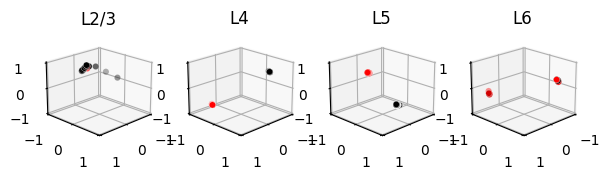

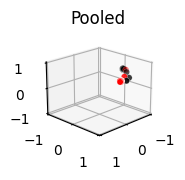

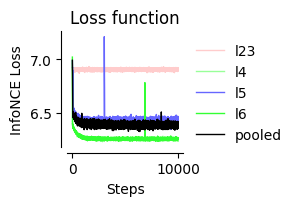

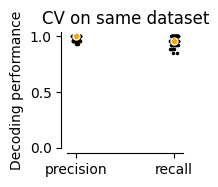

In [5]:
# DATASET

# get dataset for layer and pooled models
dat1_40Khz = get_dataset_by_layer(
    KS4_ns_10m, GT_ns_10m, STUDY_ns, quality_path, "KS4", "NS", 25, 3, 1
)
dat2_40Khz = get_dataset_pooled(dat1_40Khz)

# TRAIN AND PLOT ***************************

# get the embeddings of layer and pooled models
model1_output = get_model1(
    model_cfg, TRAIN, MODEL_PATH_40Khz_s2s_pooled_pm1, dat1_40Khz, MAX_ITER
)
model2_output = get_model2(
    model_cfg, TRAIN, MODEL_PATH_40Khz_s2s_pooled_pm1, dat2_40Khz, MAX_ITER
)

# plot embeddings
# layer-wise
fig = plt.figure(figsize=(7, 1.5))
fig = plot_model1_em_by_layer(fig, dat1_40Khz, model1_output, [-1, 1])
# pooled
fig = plt.figure(figsize=(7, 1.5))
ax = plot_model2_em_by_layer(fig, dat2_40Khz, model2_output["embedding"], [-1, 1])
ax.set_title("Pooled")

# check training convergence of pooled model
fig, ax = plt.subplots(1, 1, figsize=(1.5, 1.5))
ax = cebra.plot_loss(
    model1_output["model_l23"], color=[1, 0.8, 0.8], label="l23", ax=ax
)
ax = cebra.plot_loss(model1_output["model_l4"], color=[0.6, 1, 0.6], label="l4", ax=ax)
ax = cebra.plot_loss(model1_output["model_l5"], color=[0.4, 0.4, 1], label="l5", ax=ax)
ax = cebra.plot_loss(model1_output["model_l6"], color=[0.2, 1, 0.2], label="l6", ax=ax)
ax = cebra.plot_loss(model2_output["model"], color=[0, 0, 0], label="pooled", ax=ax)
ax.legend(bbox_to_anchor=(1, 1), frameon=False)
ax.legend(bbox_to_anchor=(1, 1), frameon=False)
ax.set_title("Loss function")
ax.spines[["right", "top"]].set_visible(False)

# disconnect axes (R style)
ax.spines[["right", "top"]].set_visible(False)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))
ax.spines["right"].set_visible(False)

# DECODING **********************************

# cross-validation: loop over KFOLD random
# seeds to get generate different subsets of
# train/test units
precision = []
recall = []
# loop over sets
for s_i in seed:
    # get train and test units ix
    tr_ix, test_ix = vanilla_cv_split(dat2_40Khz["label"], split=0.8, seed=s_i)
    # decode
    eval_rez = decode(
        model2_output["embedding"][tr_ix, :],
        model2_output["embedding"][test_ix, :],
        dat2_40Khz["label"][tr_ix],
        dat2_40Khz["label"][test_ix],
    )
    # record
    precision.append(eval_rez["metrics"]["precision"])
    recall.append(eval_rez["metrics"]["recall"])

# plot performance
fig, ax = plt.subplots(figsize=(1.5, 1.5))
df = pd.DataFrame(data=[precision, recall], index=["precision", "recall"]).T
sns.stripplot(ax=ax, data=df, jitter=0.04, color="k", size=2.5)

# stats precision
ax.errorbar(
    x=0,
    y=np.median(precision),
    yerr=np.std(precision),
    marker="o",
    color="orange",
    markeredgecolor="w",
    markersize=5,
    zorder=np.inf,
)
# stats recall
ax.errorbar(
    x=1,
    y=np.median(recall),
    yerr=np.std(recall),
    marker="o",
    color="orange",
    markeredgecolor="w",
    markersize=5,
    zorder=np.inf,
)

# aesthetics
# disconnect axes (R style)
ax.spines[["right", "top"]].set_visible(False)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))
ax.spines["right"].set_visible(False)
# labels
ax.set_ylim([0, 1.04])
ax.set_title("CV on same dataset")
ax.set_ylabel("Decoding performance")

## Evoked-to-Evoked

### (19m) Run 2

/tmp/ipykernel_163839/2635416862.py:256: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 20000.0
ex. data shape (L4): (104, 3000)
ex. label shape (L4): (104,)


/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudn

NameError: name 'seed' is not defined

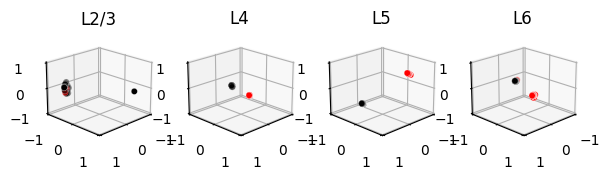

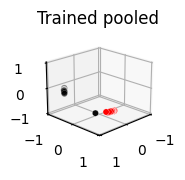

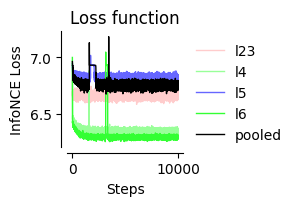

In [13]:
# parameters
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000
TRAIN = False
SHOW_DIMS = [0, 1, 2]

# (15min) DATASET  **************************

# get evoked dataset for layer model and pooled model
data_lyr_ev_20Khz = get_dataset_by_layer(
    KS4_ne_10m, GT_ne_10m, STUDY_ne, quality_path, "KS4", "E", 25, 3, 1
)
data_pool_ev_20Khz = get_dataset_pooled(data_lyr_ev_20Khz)

# TRAIN ON SPONT. AND PLOT  **************************

# train the layer and pooled models
model_lyr_ev_20Khz = get_model1(
    model_cfg, TRAIN, MODEL_PATH_20Khz_e2e_pm1, data_lyr_ev_20Khz, MAX_ITER
)
model_pool_ev_20Khz = get_model2(
    model_cfg, TRAIN, MODEL_PATH_20Khz_e2e_pm1, data_pool_ev_20Khz, MAX_ITER
)

# plot trained embeddings
# layer-wise
fig = plt.figure(figsize=(7, 1.5))
fig = plot_model1_em_by_layer(
    fig, data_lyr_ev_20Khz, model_lyr_ev_20Khz, SHOW_DIMS, [-1, 1]
)
# pooled
fig = plt.figure(figsize=(1.5, 1.5))
ax = plot_model2_em_by_layer(
    fig, data_pool_ev_20Khz, model_pool_ev_20Khz["embedding"], SHOW_DIMS, [-1, 1]
)
ax.set_title("Trained pooled")

# check training convergence
fig, ax = plt.subplots(1, 1, figsize=(1.5, 1.5))
ax = cebra.plot_loss(
    model_lyr_ev_20Khz["model_l23"], color=[1, 0.8, 0.8], label="l23", ax=ax
)
ax = cebra.plot_loss(
    model_lyr_ev_20Khz["model_l4"], color=[0.6, 1, 0.6], label="l4", ax=ax
)
ax = cebra.plot_loss(
    model_lyr_ev_20Khz["model_l5"], color=[0.4, 0.4, 1], label="l5", ax=ax
)
ax = cebra.plot_loss(
    model_lyr_ev_20Khz["model_l6"], color=[0.2, 1, 0.2], label="l6", ax=ax
)
ax = cebra.plot_loss(
    model_pool_ev_20Khz["model"], color=[0, 0, 0], label="pooled", ax=ax
)
ax.legend(bbox_to_anchor=(1, 1), frameon=False)

# disconnect axes (R style)
ax.spines[["right", "top"]].set_visible(False)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))
ax.spines["right"].set_visible(False)
ax.set_title("Loss function")

# DECODING **********************************

# cross-validation: loop over KFOLD random
# seeds to get generate different subsets of
# train/test units
precision = []
recall = []
# loop over sets
for s_i in seed:
    # get train and test units ix
    tr_ix, test_ix = vanilla_cv_split(data_pool_ev_20Khz["label"], split=0.8, seed=s_i)
    # decode
    eval_rez = decode(
        model_pool_ev_20Khz["embedding"][tr_ix, :],
        model_pool_ev_20Khz["embedding"][test_ix, :],
        data_pool_ev_20Khz["label"][tr_ix],
        data_pool_ev_20Khz["label"][test_ix],
    )
    # record
    precision.append(eval_rez["metrics"]["precision"])
    recall.append(eval_rez["metrics"]["recall"])

# plot performance
fig, ax = plt.subplots(figsize=(1.5, 1.5))
df = pd.DataFrame(data=[precision, recall], index=["precision", "recall"]).T
sns.stripplot(ax=ax, data=df, jitter=0.04, color="k", size=2.5)

# stats precision
ax.errorbar(
    x=0,
    y=np.median(precision),
    yerr=np.std(precision),
    marker="o",
    color="orange",
    markeredgecolor="w",
    markersize=5,
    zorder=np.inf,
)
# stats recall
ax.errorbar(
    x=1,
    y=np.median(recall),
    yerr=np.std(recall),
    marker="o",
    color="orange",
    markeredgecolor="w",
    markersize=5,
    zorder=np.inf,
)

# aesthetics
# disconnect axes (R style)
ax.spines[["right", "top"]].set_visible(False)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))
ax.spines["right"].set_visible(False)
# labels
ax.set_ylim([0, 1.04])
ax.set_title("CV on same dataset")
ax.set_ylabel("Decoding performance")

## Spont-to-Evoked

* Train on one experiment, test on another.

* Method
    * (15m) Training: 
        * train on spontaneous regime, test on evoked regime
        * We downsampled the training dataset (spont biophy waveforms) by a factor of 2 (taking every second samples) to match the evoked dataset sampling frequency.
        * 20 KHz sampling frequency
    * Decoding:
        * k-NN
        * Cebra.transform() requires that the new dataset had the same recording sampling frequency as the one used for training.
        * TODO: need to check the effect of trace sampling frequency.
            * solution 1: simplest is we train on a low sampling frequency (e.g., 20 KHz). The user can always downsample its waveforms to 20KHz, if they were sampled at a higher sampling frequency.
            * solution 2: when provided with an arbitrary, we interpolate the user waveform to very high sampling frequency and then we resample it at our sampling frequency.


* Results:
    * we still see very strong clustering of "good" and "poor units" for 20KHz training waveforms.

#### (3m)Run 3 (pooled)

/tmp/ipykernel_169054/2635416862.py:256: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 40000.0
ex. data shape (L4): (59, 3000)
ex. label shape (L4): (59,)


/tmp/ipykernel_169054/2635416862.py:256: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 20000.0
ex. data shape (L4): (104, 3000)
ex. label shape (L4): (104,)
accuracy metrics:

{'mae': 0.0, 'r2': 0.19549346993039785, 'accuracy': 0.9667330110889963, 'bal_accuracy': 0.9009521388910613, 'precision': 0.5806451612903226, 'recall': 0.8289473684210527, 'f1_score': 0.6829268292682927}


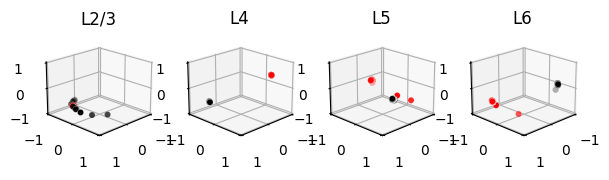

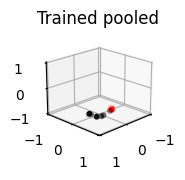

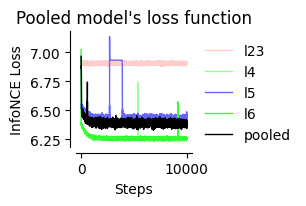

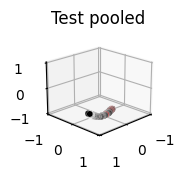

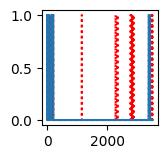

In [9]:
# parameters
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000
TRAIN = False
SHOW_DIMS = [0, 1, 2]

# (15min) DATASET  **************************

# # get spontaneous dataset for layer model and pooled model
# data_lyr_sp_20Khz = get_dataset_by_layer(
#     KS4_ns_10m, GT_ns_10m, STUDY_ns, quality_path, "KS4", "NS", 25, 3, 2
# )
# data_pool_sp_20Khz = get_dataset_pooled(data_lyr_sp_20Khz)

# TRAIN ON SPONT. AND PLOT  **************************

# train the layer and pooled models
model_lyr_sp_20Khz = get_model1(
    model_cfg, TRAIN, MODEL_PATH_20Khz_s2e_pm1, data_lyr_sp_20Khz, MAX_ITER
)
model_pool_sp_20Khz = get_model2(
    model_cfg, TRAIN, MODEL_PATH_20Khz_s2e_pm1, data_pool_sp_20Khz, MAX_ITER
)

# plot trained embeddings
# layer-wise
fig = plt.figure(figsize=(7, 1.5))
fig = plot_model1_em_by_layer(
    fig, data_lyr_sp_20Khz, model_lyr_sp_20Khz, SHOW_DIMS, [-1, 1]
)
# pooled
fig = plt.figure(figsize=(1.5, 1.5))
ax = plot_model2_em_by_layer(
    fig, data_pool_sp_20Khz, model_pool_sp_20Khz["embedding"], SHOW_DIMS, [-1, 1]
)
ax.set_title("Trained pooled")

# check training convergence
fig, ax = plt.subplots(1, 1, figsize=(1.5, 1.5))
ax = cebra.plot_loss(
    model_lyr_sp_20Khz["model_l23"], color=[1, 0.8, 0.8], label="l23", ax=ax
)
ax = cebra.plot_loss(
    model_lyr_sp_20Khz["model_l4"], color=[0.6, 1, 0.6], label="l4", ax=ax
)
ax = cebra.plot_loss(
    model_lyr_sp_20Khz["model_l5"], color=[0.4, 0.4, 1], label="l5", ax=ax
)
ax = cebra.plot_loss(
    model_lyr_sp_20Khz["model_l6"], color=[0.2, 1, 0.2], label="l6", ax=ax
)
ax = cebra.plot_loss(
    model_pool_sp_20Khz["model"], color=[0, 0, 0], label="pooled", ax=ax
)
ax.legend(bbox_to_anchor=(1, 1), frameon=False)

# disconnect axes (R style)
ax.spines[["right", "top"]].set_visible(False)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))
ax.spines["right"].set_visible(False)
ax.set_title("Pooled model's loss function")


# DECODE  **************************

# get evoked dataset for layer and pooled models
data_lyr_ev_20Khz = get_dataset_by_layer(
    KS4_ne_10m, GT_ne_10m, STUDY_ne, quality_path, "KS4", "E", 25, 3, 1
)
data_pool_ev_20Khz = get_dataset_pooled(data_lyr_ev_20Khz)

# get evoked (test) embedding
emb_pool_ev_20Khz = model_pool_sp_20Khz["model"].transform(data_pool_ev_20Khz["data"])
fig = plt.figure(figsize=(1.5, 1.5))
ax = plot_model2_em_by_layer(
    fig, data_pool_ev_20Khz, emb_pool_ev_20Khz, SHOW_DIMS, [-1, 1]
)
ax.set_title("Test pooled")

# plot embedding
# assign color to each quality label
# (good "r", poor "k")
quality_label = data_pool_ev_20Khz["label"]
colr = np.array(["None"] * len(quality_label))
colr[quality_label == 1] = "r"
colr[quality_label == 0] = "k"
ax.view_init(20, 45, 0)  # elevation, azimuth, roll
scat = ax.scatter(
    emb_pool_ev_20Khz[:, 0],
    emb_pool_ev_20Khz[:, 1],
    emb_pool_ev_20Khz[:, 2],
    c=colr,
    edgecolors="w",
    linewidths=0.2,
    s=20,
)

# evaluate decoding
eval_rez = decode(
    model_pool_sp_20Khz["embedding"],
    emb_pool_ev_20Khz,
    data_pool_sp_20Khz["label"],
    data_pool_ev_20Khz["label"],
)
print("accuracy metrics:\n")
print(eval_rez["metrics"])

# diagnostic (error analysis)
fig, ax = plt.subplots(figsize=(1.5, 1.5))
ax.plot(eval_rez["prediction"], "r:")
ax.plot(data_pool_ev_20Khz["label"])

#### (3s)Run 4 (layer-wise)

accuracy metrics:

l23: {'mae': 0.0, 'r2': 0.0461538461538461, 'accuracy': 0.8709677419354839, 'bal_accuracy': 0.6, 'precision': 1.0, 'recall': 0.2, 'f1_score': 0.3333333333333333}
l4: {'mae': 0.5, 'r2': -1.5413533834586466, 'accuracy': 0.5, 'bal_accuracy': 0.6578947368421053, 'precision': 0.35, 'recall': 1.0, 'f1_score': 0.5185185185185185}
l5: {'mae': 0.0, 'r2': -2.4571681672217434, 'accuracy': 0.9230058515552818, 'bal_accuracy': 0.927609219682967, 'precision': 0.2197452229299363, 'recall': 0.9324324324324325, 'f1_score': 0.3556701030927835}
l6: {'mae': 0.0, 'r2': -0.19999999999999973, 'accuracy': 0.7333333333333333, 'bal_accuracy': 0.7666666666666666, 'precision': 0.5652173913043478, 'recall': 0.8666666666666667, 'f1_score': 0.6842105263157895}


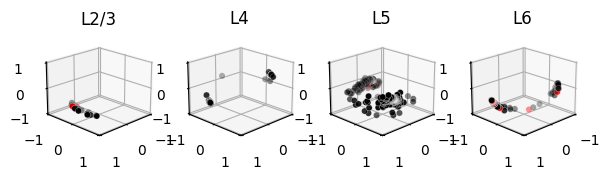

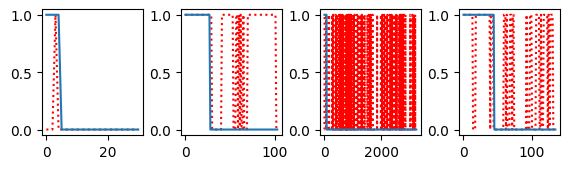

In [8]:
# get the evoked embeddings from the pooled spontaneous model
em_lyr_ev_20Khz = {}
l23 = model_lyr_sp_20Khz["model_l23"].transform(data_lyr_ev_20Khz["data_l23"])
l4 = model_lyr_sp_20Khz["model_l4"].transform(data_lyr_ev_20Khz["data_l4"])
l5 = model_lyr_sp_20Khz["model_l5"].transform(data_lyr_ev_20Khz["data_l5"])
l6 = model_lyr_sp_20Khz["model_l6"].transform(data_lyr_ev_20Khz["data_l6"])
em_lyr_ev_20Khz["l23"] = l23
em_lyr_ev_20Khz["l4"] = l4
em_lyr_ev_20Khz["l5"] = l5
em_lyr_ev_20Khz["l6"] = l6

# plot test embeddings
fig = plt.figure(figsize=(7, 1.5))
ax = plot_model1_em_by_layer(
    fig, data_lyr_ev_20Khz, em_lyr_ev_20Khz, SHOW_DIMS, [-1, 1]
)

# decode
eval_rez_l23 = decode(
    model_lyr_sp_20Khz["l23"],  # spontaneous embedding
    em_lyr_ev_20Khz["l23"],  # evoked embedding
    data_lyr_sp_20Khz["label_l23"],
    data_lyr_ev_20Khz["label_l23"],
)
eval_rez_l4 = decode(
    model_lyr_sp_20Khz["l4"],
    em_lyr_ev_20Khz["l4"],
    data_lyr_sp_20Khz["label_l4"],
    data_lyr_ev_20Khz["label_l4"],
)
eval_rez_l5 = decode(
    model_lyr_sp_20Khz["l5"],
    em_lyr_ev_20Khz["l5"],
    data_lyr_sp_20Khz["label_l5"],
    data_lyr_ev_20Khz["label_l5"],
)
eval_rez_l6 = decode(
    model_lyr_sp_20Khz["l6"],
    em_lyr_ev_20Khz["l6"],
    data_lyr_sp_20Khz["label_l6"],
    data_lyr_ev_20Khz["label_l6"],
)
print("accuracy metrics:\n")
print("l23:", eval_rez_l23["metrics"])
print("l4:", eval_rez_l4["metrics"])
print("l5:", eval_rez_l5["metrics"])
print("l6:", eval_rez_l6["metrics"])

# diagnostic (error analysis)
fig, ax = plt.subplots(1, 4, figsize=(5.5, 1.5))
# l2/3
ax[0].plot(eval_rez_l23["prediction"], "r:")
ax[0].plot(data_lyr_ev_20Khz["label_l23"])
# l4
ax[1].plot(eval_rez_l4["prediction"], "r:")
ax[1].plot(data_lyr_ev_20Khz["label_l4"])
# l5
ax[2].plot(eval_rez_l5["prediction"], "r:")
ax[2].plot(data_lyr_ev_20Khz["label_l5"])
fig.tight_layout(**tight_layout_cfg)
# l6
ax[3].plot(eval_rez_l6["prediction"], "r:")
ax[3].plot(data_lyr_ev_20Khz["label_l6"])
fig.tight_layout(**tight_layout_cfg)

## (15m)Evoked-to-Spont

* Train on evoked regime, test on spontaneous regime
* 10 receptive fields and time_offset 10 from the reference samples' time steps.

In [9]:
# parameters
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000
TRAIN = True

#### Run 5 (pooled, pm1)

  0%|          | 0/10000 [00:00<?, ?it/s]/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
pos: -1.1175 neg:  7.7880 total:  6.6704 temperature:  0.7758: 100%|██████

accuracy metrics:

pooled: {'mae': 0.0, 'r2': 0.11048926155915051, 'accuracy': 0.8317214700193424, 'bal_accuracy': 0.720889530514575, 'precision': 0.7558139534883721, 'recall': 0.4961832061068702, 'f1_score': 0.5990783410138248}


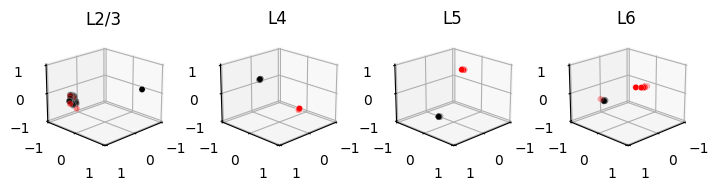

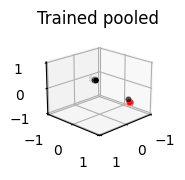

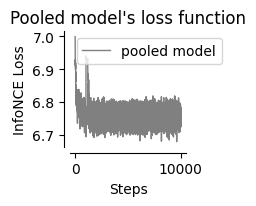

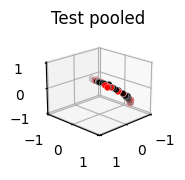

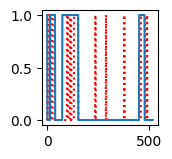

In [10]:
# train, test and evaluate
rez_e2s_20Khz_pooled_pms1 = train_test_eval(
    model_cfg,
    TRAIN,
    MODEL_PATH_20Khz_e2s_pm1,
    data_lyr_ev_20Khz,
    data_pool_sp_20Khz,
    data_pool_ev_20Khz,
    MAX_ITER,
    tight_layout_cfg,
)

#### Run 6 (layer-wise, pm1)

accuracy metrics:

l23: {'mae': 0.0, 'r2': -0.7142857142857142, 'accuracy': 0.8125, 'bal_accuracy': 0.4642857142857143, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
l4: {'mae': 0.0, 'r2': 0.438095238095238, 'accuracy': 0.864406779661017, 'bal_accuracy': 0.8464285714285714, 'precision': 0.9, 'recall': 0.75, 'f1_score': 0.8181818181818182}
l5: {'mae': 0.0, 'r2': 0.044936544936545086, 'accuracy': 0.8426666666666667, 'bal_accuracy': 0.791958041958042, 'precision': 0.6043956043956044, 'recall': 0.7051282051282052, 'f1_score': 0.650887573964497}
l6: {'mae': 0.0, 'r2': -0.054629629629629806, 'accuracy': 0.746268656716418, 'bal_accuracy': 0.763425925925926, 'precision': 0.6388888888888888, 'recall': 0.8518518518518519, 'f1_score': 0.7301587301587301}


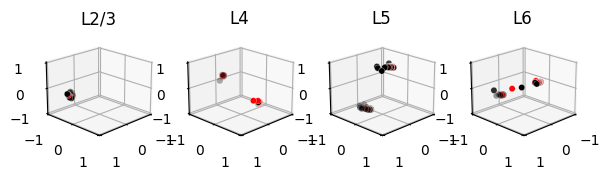

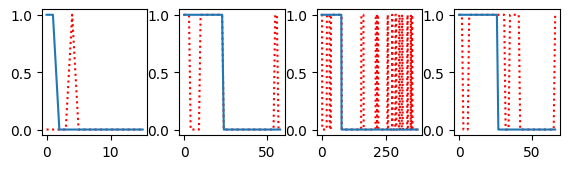

In [42]:
rez_e2s_20Khz_lyr_pms1 = train_test_eval_layerwise(
    rez_e2s_20Khz_pooled_pms1["model_lyr_ev"],
    data_lyr_sp_20Khz,
    SHOW_DIMS,
    tight_layout_cfg,
)

### Run 7 (pooled, pm2)

In [12]:
# parameters
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000
TRAIN = True

# model parameters
model_cfg = {
    "model_architecture": "offset1-model",  # 1 receptive field
    "distance": "cosine",
    "batch_size": 1024,
    "temperature_mode": "auto",
    "learning_rate": 0.001,
    "max_iterations": MAX_ITER,
    "conditional": "time_delta",
    "time_offsets": 1,  # 1 timestep (should be >= nb of receptve fields)
    "output_dimension": 3,
    "device": "cuda_if_available",
    "verbose": True,
}

print(
    cebra.models.get_options(
        "offset*",
    )
)

['offset10-model', 'offset10-model-mse', 'offset5-model', 'offset1-model-mse', 'offset1-model', 'offset1-model-v2', 'offset1-model-v3', 'offset1-model-v4', 'offset1-model-v5', 'offset40-model-4x-subsample', 'offset20-model-4x-subsample', 'offset4-model-2x-subsample', 'offset36-model', 'offset36-model-dropout', 'offset36-model-more-dropout']


pos: -6.1652 neg:  12.6423 total:  6.4771 temperature:  0.1622: 100%|██████████| 10000/10000 [01:13<00:00, 135.68it/s]
pos: -5.8366 neg:  12.1851 total:  6.3485 temperature:  0.1713: 100%|██████████| 10000/10000 [01:12<00:00, 137.71it/s]
pos: -5.6453 neg:  12.5053 total:  6.8600 temperature:  0.1771: 100%|██████████| 10000/10000 [01:08<00:00, 146.86it/s]
pos: -5.2224 neg:  11.5213 total:  6.2989 temperature:  0.1914: 100%|██████████| 10000/10000 [01:07<00:00, 148.16it/s]


2024-09-07 11:25:47,038 - root - utils.py - create_if_not_exists - INFO - The following path has been created /gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm2/


pos: -5.5603 neg:  12.2790 total:  6.7187 temperature:  0.1797: 100%|██████████| 10000/10000 [01:06<00:00, 149.67it/s]


accuracy metrics:

pooled: {'mae': 0.0, 'r2': -0.38027528378752495, 'accuracy': 0.7388781431334622, 'bal_accuracy': 0.7015781355060713, 'precision': 0.4880952380952381, 'recall': 0.6259541984732825, 'f1_score': 0.5484949832775919}


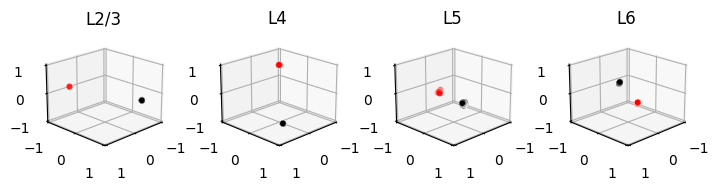

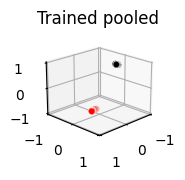

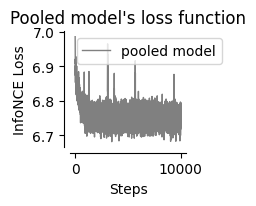

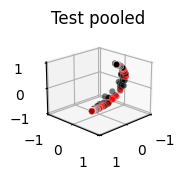

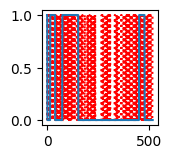

In [13]:
# train, test and evaluate
rez_e2s_20Khz_pooled_pms2 = train_test_eval(
    model_cfg,
    TRAIN,
    MODEL_PATH_20Khz_e2s_pm2,
    data_lyr_ev_20Khz,
    data_pool_sp_20Khz,
    data_pool_ev_20Khz,
    MAX_ITER,
    tight_layout_cfg,
)

### Run 8 (layer-wise, pm2)

accuracy metrics:

l23: {'mae': 0.0, 'r2': -0.7142857142857142, 'accuracy': 0.8125, 'bal_accuracy': 0.6785714285714286, 'precision': 0.3333333333333333, 'recall': 0.5, 'f1_score': 0.4}
l4: {'mae': 0.0, 'r2': -0.4047619047619051, 'accuracy': 0.6610169491525424, 'bal_accuracy': 0.6553571428571429, 'precision': 0.5769230769230769, 'recall': 0.625, 'f1_score': 0.6}
l5: {'mae': 0.0, 'r2': -0.5216265216265215, 'accuracy': 0.7493333333333333, 'bal_accuracy': 0.6526806526806527, 'precision': 0.41304347826086957, 'recall': 0.48717948717948717, 'f1_score': 0.4470588235294118}
l6: {'mae': 0.0, 'r2': -0.7370370370370372, 'accuracy': 0.582089552238806, 'bal_accuracy': 0.6018518518518519, 'precision': 0.48717948717948717, 'recall': 0.7037037037037037, 'f1_score': 0.5757575757575758}


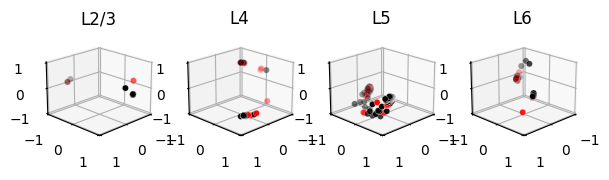

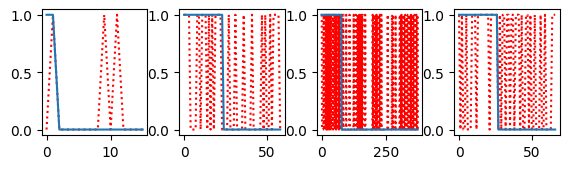

In [14]:
rez_e2s_20Khz_lyr_pms2 = train_test_eval_layerwise(
    rez_e2s_20Khz_pooled_pms2["model_lyr_ev"], data_lyr_sp_20Khz, tight_layout_cfg
)

### Run 9 (pooled, pm3)

* Higher-dimensionality (4 dimensions)

In [33]:
# parameters
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000
TRAIN = False
DIMENSION = 4  # increase output dimensionality
# SHOW_DIMS = [0, 1, 2]
# SHOW_DIMS = [0, 1, 3]
# SHOW_DIMS = [0, 2, 3]
SHOW_DIMS = [1, 2, 3]

# model parameters
model_cfg = {
    "model_architecture": "offset10-model",  # receptive field size
    "distance": "cosine",
    "batch_size": 1024,
    "temperature_mode": "auto",
    "learning_rate": 0.001,
    "max_iterations": MAX_ITER,
    "conditional": "time_delta",
    "time_offsets": 10,  # 10 timesteps (should be >= nb of receptve fields)
    "output_dimension": DIMENSION,
    "device": "cuda_if_available",
    "verbose": True,
}

accuracy metrics:

pooled: {'mae': 0.0, 'r2': -0.0019776134161293424, 'accuracy': 0.8104448742746615, 'bal_accuracy': 0.7242910255903177, 'precision': 0.6486486486486487, 'recall': 0.549618320610687, 'f1_score': 0.5950413223140496}


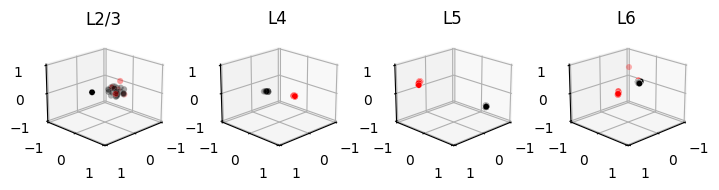

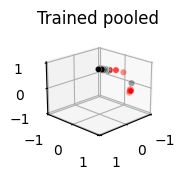

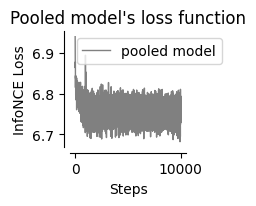

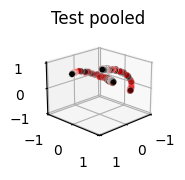

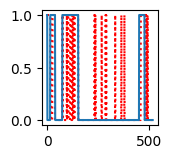

In [34]:
# train, test and evaluate
rez_e2s_20Khz_pooled_pms3 = train_test_eval(
    model_cfg,
    TRAIN,
    MODEL_PATH_20Khz_e2s_pm3,
    data_lyr_ev_20Khz,
    data_pool_sp_20Khz,
    data_pool_ev_20Khz,
    SHOW_DIMS,
    MAX_ITER,
    tight_layout_cfg,
)

### Run 10 (layer-wise, pm3)

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudn

accuracy metrics:

l23: {'mae': 0.0, 'r2': -0.1428571428571428, 'accuracy': 0.875, 'bal_accuracy': 0.5, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
l4: {'mae': 0.0, 'r2': 0.22738095238095224, 'accuracy': 0.8135593220338984, 'bal_accuracy': 0.7904761904761904, 'precision': 0.8421052631578947, 'recall': 0.6666666666666666, 'f1_score': 0.7441860465116279}
l5: {'mae': 0.0, 'r2': 0.061124061124061324, 'accuracy': 0.8453333333333334, 'bal_accuracy': 0.6707459207459208, 'precision': 0.7631578947368421, 'recall': 0.3717948717948718, 'f1_score': 0.5}
l6: {'mae': 0.0, 'r2': 0.06944444444444431, 'accuracy': 0.7761194029850746, 'bal_accuracy': 0.7643518518518518, 'precision': 0.7307692307692307, 'recall': 0.7037037037037037, 'f1_score': 0.7169811320754716}


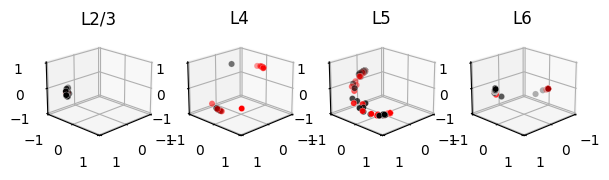

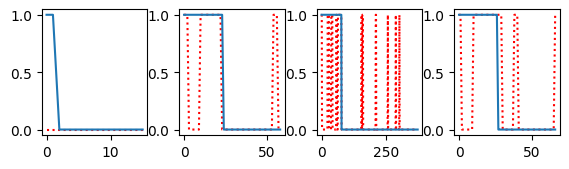

In [19]:
rez_e2s_20Khz_lyr_pms3 = train_test_eval_layerwise(
    rez_e2s_20Khz_pooled_pms3["model_lyr_ev"], data_lyr_sp_20Khz, tight_layout_cfg
)

### Run 11 (pooled, pm4)

* Higher-dimensionality: 10 Output dimensions

In [4]:
# parameters
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000
TRAIN = False
DIMENSION = 10  # increase output dimensionality
SHOW_DIMS = [0, 1, 2]

# model parameters
model_cfg = {
    "model_architecture": "offset10-model",  # receptive field size
    "distance": "cosine",
    "batch_size": 1024,
    "temperature_mode": "auto",
    "learning_rate": 0.001,
    "max_iterations": MAX_ITER,
    "conditional": "time_delta",
    "time_offsets": 10,  # 10 timesteps (should be >= nb of receptve fields)
    "output_dimension": DIMENSION,
    "device": "cuda_if_available",
    "verbose": True,
}

In [5]:
# # get spontaneous dataset for layer model and pooled model
# data_lyr_sp_20Khz = get_dataset_by_layer(
#     KS4_ns_10m, GT_ns_10m, STUDY_ns, quality_path, "KS4", "NS", 25, 3, 2
# )
# data_pool_sp_20Khz = get_dataset_pooled(data_lyr_sp_20Khz)

# # get evoked dataset for layer and pooled models
# data_lyr_ev_20Khz = get_dataset_by_layer(
#     KS4_ne_10m, GT_ne_10m, STUDY_ne, quality_path, "KS4", "E", 25, 3, 1
# )
# data_pool_ev_20Khz = get_dataset_pooled(data_lyr_ev_20Khz)

/tmp/ipykernel_33954/788137423.py:256: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 40000.0
ex. data shape (L4): (59, 3000)
ex. label shape (L4): (59,)


/tmp/ipykernel_33954/788137423.py:256: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 20000.0
ex. data shape (L4): (104, 3000)
ex. label shape (L4): (104,)


/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudn

accuracy metrics:

pooled: {'mae': 0.0, 'r2': 0.018470909306648853, 'accuracy': 0.8143133462282398, 'bal_accuracy': 0.7142744136376221, 'precision': 0.6767676767676768, 'recall': 0.5114503816793893, 'f1_score': 0.5826086956521739}


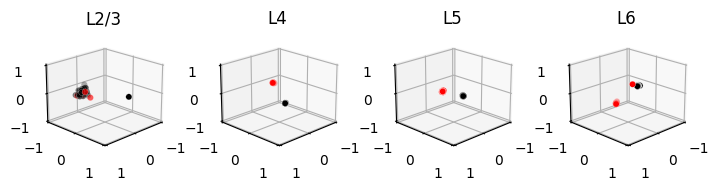

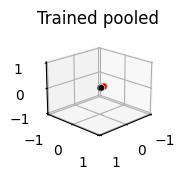

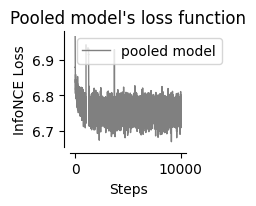

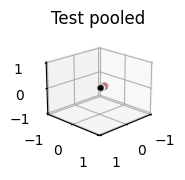

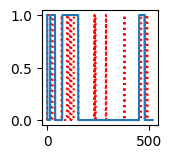

In [7]:
# train, test and evaluate
rez_e2s_20Khz_pooled_pms4 = train_test_eval(
    model_cfg,
    TRAIN,
    MODEL_PATH_20Khz_e2s_pm4,
    data_lyr_ev_20Khz,
    data_pool_sp_20Khz,
    data_pool_ev_20Khz,
    SHOW_DIMS,
    MAX_ITER,
    tight_layout_cfg,
)

### Run 12 (layer-wise, pm4)

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudn

accuracy metrics:

l23: {'mae': 0.0, 'r2': -0.1428571428571428, 'accuracy': 0.875, 'bal_accuracy': 0.7142857142857143, 'precision': 0.5, 'recall': 0.5, 'f1_score': 0.5}
l4: {'mae': 0.0, 'r2': 0.36785714285714277, 'accuracy': 0.847457627118644, 'bal_accuracy': 0.8386904761904761, 'precision': 0.8260869565217391, 'recall': 0.7916666666666666, 'f1_score': 0.8085106382978723}
l5: {'mae': 0.0, 'r2': 0.17443667443667454, 'accuracy': 0.864, 'bal_accuracy': 0.6730769230769231, 'precision': 1.0, 'recall': 0.34615384615384615, 'f1_score': 0.5142857142857142}
l6: {'mae': 0.0, 'r2': 0.06944444444444431, 'accuracy': 0.7761194029850746, 'bal_accuracy': 0.7703703703703704, 'precision': 0.7142857142857143, 'recall': 0.7407407407407407, 'f1_score': 0.7272727272727273}


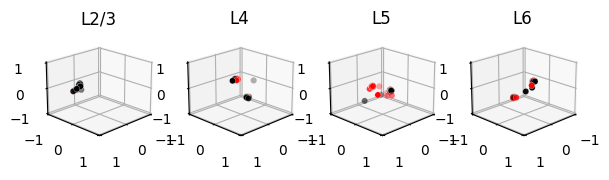

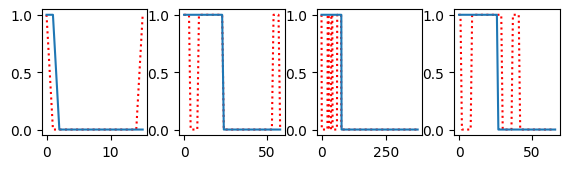

In [8]:
rez_e2s_20Khz_lyr_pms4 = train_test_eval_layerwise(
    rez_e2s_20Khz_pooled_pms4["model_lyr_ev"],
    data_lyr_sp_20Khz,
    data_lyr_ev_20Khz,
    SHOW_DIMS,
    tight_layout_cfg,
)

### Run 13 (pooled, pm5)

* Higher dimensionality: 60 output dimensions
* note: waveforms dimensionality is 120 time samples on a period of 6 ms, sampled at 120 Hz.

In [91]:
# parameters
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000
TRAIN = False
DIMENSION = 60  # increase output dimensionality
SHOW_DIMS = [0, 1, 2]

# model parameters
model_cfg = {
    "model_architecture": "offset10-model",  # receptive field size
    "distance": "cosine",
    "batch_size": 1024,
    "temperature_mode": "auto",
    "learning_rate": 0.001,
    "max_iterations": MAX_ITER,
    "conditional": "time_delta",
    "time_offsets": 10,  # 10 timesteps (should be >= nb of receptve fields)
    "output_dimension": DIMENSION,
    "device": "cuda_if_available",
    "verbose": True,
}

pos: -0.7814 neg:  7.4609 total:  6.6795 temperature:  0.9883:   0%|          | 10/10000 [00:00<03:25, 48.68it/s]

pos: -1.0526 neg:  7.6996 total:  6.6469 temperature:  0.7269: 100%|██████████| 10000/10000 [03:05<00:00, 53.82it/s]
pos: -6.0325 neg:  12.3932 total:  6.3607 temperature:  0.1657: 100%|██████████| 10000/10000 [03:06<00:00, 53.60it/s]
pos: -6.1823 neg:  13.0099 total:  6.8276 temperature:  0.1617: 100%|██████████| 10000/10000 [03:33<00:00, 46.77it/s]
pos: -5.9177 neg:  12.2091 total:  6.2913 temperature:  0.1689: 100%|██████████| 10000/10000 [03:06<00:00, 53.59it/s]

2024-09-07 13:58:58,415 - root - utils.py - create_if_not_exists - INFO - The following path has been created /gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm5/



pos: -7.1955 neg:  13.9467 total:  6.7511 temperature:  0.1389: 100%|██████████| 10000/10000 [03:33<00:00, 46.73it/s]


accuracy metrics:

pooled: {'mae': 0.0, 'r2': 0.03891943202942705, 'accuracy': 0.8181818181818182, 'bal_accuracy': 0.6992148874737967, 'precision': 0.7228915662650602, 'recall': 0.4580152671755725, 'f1_score': 0.5607476635514018}


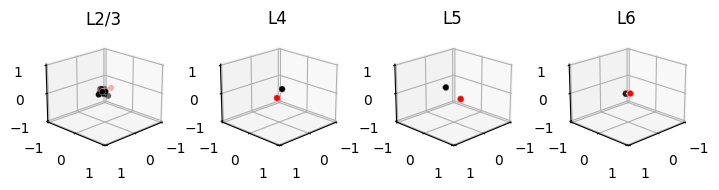

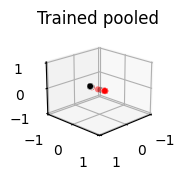

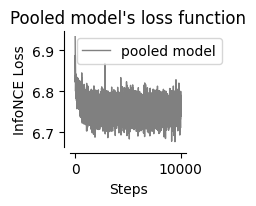

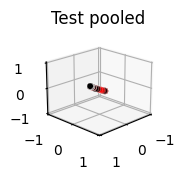

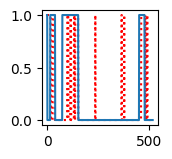

In [57]:
# train, test and evaluate
rez_e2s_20Khz_pooled_pms5 = train_test_eval(
    model_cfg,
    TRAIN,
    MODEL_PATH_20Khz_e2s_pm5,
    data_lyr_ev_20Khz,
    data_pool_sp_20Khz,
    data_pool_ev_20Khz,
    SHOW_DIMS,
    MAX_ITER,
    tight_layout_cfg,
)

### Run 14 (layer-wise. pm5)

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


accuracy metrics:

l23: {'mae': 0.0, 'r2': -0.1428571428571428, 'accuracy': 0.875, 'bal_accuracy': 0.5, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
l4: {'mae': 0.0, 'r2': 0.22738095238095224, 'accuracy': 0.8135593220338984, 'bal_accuracy': 0.7839285714285714, 'precision': 0.8823529411764706, 'recall': 0.625, 'f1_score': 0.7317073170731707}
l5: {'mae': 0.0, 'r2': 0.012561512561512722, 'accuracy': 0.8373333333333334, 'bal_accuracy': 0.7696840196840197, 'precision': 0.6, 'recall': 0.6538461538461539, 'f1_score': 0.6257668711656442}
l6: {'mae': 0.0, 'r2': -0.1166666666666667, 'accuracy': 0.7313432835820896, 'bal_accuracy': 0.7449074074074074, 'precision': 0.6285714285714286, 'recall': 0.8148148148148148, 'f1_score': 0.7096774193548387}


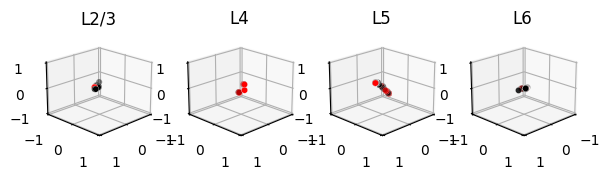

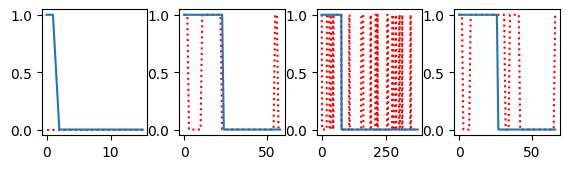

In [58]:
rez_e2s_20Khz_lyr_pms5 = train_test_eval_layerwise(
    rez_e2s_20Khz_pooled_pms5["model_lyr_ev"],
    data_lyr_sp_20Khz,
    data_lyr_ev_20Khz,
    SHOW_DIMS,
    tight_layout_cfg,
)

### Balancing training dataset

In [120]:
import random
import copy

# parameters
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000
TRAIN = True
DIMENSION = 10  # increase output dimensionality
SHOW_DIMS = [0, 1, 2]
SEED = 0

# model parameters
model_cfg = {
    "model_architecture": "offset10-model",  # receptive field size
    "distance": "cosine",
    "batch_size": 1024,
    "temperature_mode": "auto",
    "learning_rate": 0.001,
    "max_iterations": MAX_ITER,
    "conditional": "time_delta",
    "time_offsets": 10,  # 10 timesteps (should be >= nb of receptve fields)
    "output_dimension": DIMENSION,
    "device": "cuda_if_available",
    "verbose": True,
}

### (14m)Run 15 (pooled, bal)

In [121]:
np.random.seed(SEED)  # reproducibility


def get_balanced_ix(data):

    nb_good = sum(data == 1)
    nb_poor = sum(data == 0)
    nbs = [nb_good, nb_poor]
    common_nb = nbs[np.argmin([nb_good, nb_poor])]
    common_nb
    # get common number of samples (of less frequent class)
    g_ix = np.where(data)[0].tolist()
    g_ix = random.sample(g_ix, common_nb)
    p_ix = np.where(data == 0)[0].tolist()
    p_ix = random.sample(p_ix, common_nb)
    return np.hstack([g_ix, p_ix])


def balance_dataset(data: dict):

    bal_ix_l23 = get_balanced_ix(data["label_l23"])
    bal_ix_l4 = get_balanced_ix(data["label_l4"])
    bal_ix_l5 = get_balanced_ix(data["label_l5"])
    bal_ix_l6 = get_balanced_ix(data["label_l6"])

    data_bal = copy.copy(data)

    data_bal["label_l23"] = data["label_l23"][bal_ix_l23]
    data_bal["label_l4"] = data["label_l4"][bal_ix_l4]
    data_bal["label_l5"] = data["label_l5"][bal_ix_l5]
    data_bal["label_l6"] = data["label_l6"][bal_ix_l6]

    data_bal["data_l23"] = data["data_l23"][bal_ix_l23]
    data_bal["data_l4"] = data["data_l4"][bal_ix_l4]
    data_bal["data_l5"] = data["data_l5"][bal_ix_l5]
    data_bal["data_l6"] = data["data_l6"][bal_ix_l6]

    data_bal["unit_ids_l23"] = data["unit_ids_l23"][bal_ix_l23]
    data_bal["unit_ids_l4"] = data["unit_ids_l4"][bal_ix_l4]
    data_bal["unit_ids_l5"] = data["unit_ids_l5"][bal_ix_l5]
    data_bal["unit_ids_l6"] = data["unit_ids_l6"][bal_ix_l6]
    return data_lyr_ev_20Khz_bal


# balanced training dataset for CEBRA
data_lyr_ev_20Khz_bal = balance_dataset(data_lyr_ev_20Khz)
data_pool_ev_20Khz_bal = get_dataset_pooled(data_lyr_ev_20Khz_bal)

pos: -0.8346 neg:  7.7661 total:  6.9315 temperature:  1.1980: 100%|██████████| 10000/10000 [03:02<00:00, 54.67it/s]
pos: -5.5782 neg:  11.8151 total:  6.2369 temperature:  0.1792: 100%|██████████| 10000/10000 [02:54<00:00, 57.21it/s]
pos: -6.0032 neg:  12.2416 total:  6.2385 temperature:  0.1665: 100%|██████████| 10000/10000 [02:55<00:00, 57.04it/s]
pos: -5.9506 neg:  12.1881 total:  6.2375 temperature:  0.1680: 100%|██████████| 10000/10000 [02:54<00:00, 57.17it/s]

2024-09-07 14:57:32,346 - root - utils.py - create_if_not_exists - INFO - The following path has been created /gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/analysis/sorting_quality/models/cebra/sf_20Khz/e2s_pm4_bal/



/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cud

accuracy metrics:

pooled: {'mae': 0.0, 'r2': -0.18601431792113265, 'accuracy': 0.7756286266924565, 'bal_accuracy': 0.726189534469802, 'precision': 0.5503355704697986, 'recall': 0.6259541984732825, 'f1_score': 0.5857142857142857}


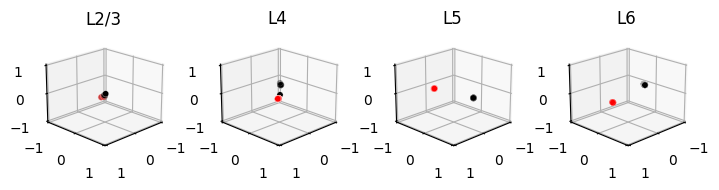

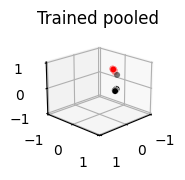

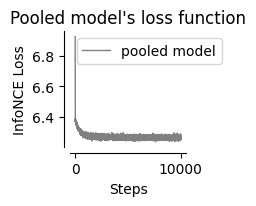

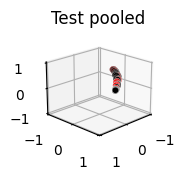

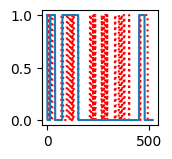

In [122]:
# train, test and evaluate
rez_e2s_20Khz_pooled_pms4_bal = train_test_eval(
    model_cfg,
    TRAIN,
    MODEL_PATH_20Khz_e2s_pm4_bal,
    data_lyr_ev_20Khz_bal,
    data_pool_sp_20Khz,
    data_pool_ev_20Khz_bal,
    SHOW_DIMS,
    MAX_ITER,
    tight_layout_cfg,
)

### Run 16 (layer-wise, bal.)

accuracy metrics:

l23: {'mae': 0.0, 'r2': -0.1428571428571428, 'accuracy': 0.875, 'bal_accuracy': 0.9285714285714286, 'precision': 0.5, 'recall': 1.0, 'f1_score': 0.6666666666666666}
l4: {'mae': 0.0, 'r2': 0.15714285714285703, 'accuracy': 0.7966101694915254, 'bal_accuracy': 0.7761904761904761, 'precision': 0.8, 'recall': 0.6666666666666666, 'f1_score': 0.7272727272727273}
l5: {'mae': 0.0, 'r2': -0.4406889406889405, 'accuracy': 0.7626666666666667, 'bal_accuracy': 0.7225459725459725, 'precision': 0.45132743362831856, 'recall': 0.6538461538461539, 'f1_score': 0.5340314136125655}
l6: {'mae': 0.0, 'r2': -0.1787037037037038, 'accuracy': 0.7164179104477612, 'bal_accuracy': 0.7504629629629629, 'precision': 0.5952380952380952, 'recall': 0.9259259259259259, 'f1_score': 0.7246376811594203}


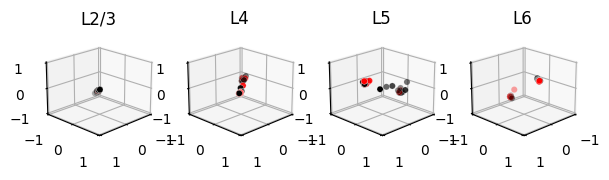

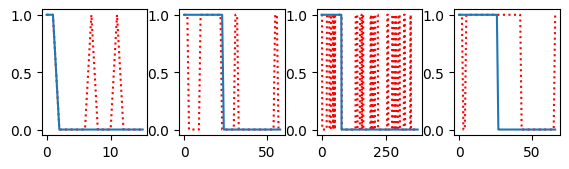

In [123]:
rez_e2s_20Khz_lyr_pms4_bal = train_test_eval_layerwise(
    rez_e2s_20Khz_pooled_pms4_bal["model_lyr_ev"],
    data_lyr_sp_20Khz,
    data_lyr_ev_20Khz_bal,
    SHOW_DIMS,
    tight_layout_cfg,
)

# Error analysis

* Model (run 11 and 12):
* Results:
    * Contamination metrics:
        * **Low ISI violation ratio** and **count** seems to predict FP when compared with TN.
        * **High SNR** tend to predict FPs when compared with TN (characterized by lower snrs). 
    * Amplitude variability?

In [23]:
# evaluate best model's individual predictions
model_eval_l23 = get_tp_tn_fp_fn(
    rez_e2s_20Khz_lyr_pms4["eval_rez_l23"]["prediction"], data_lyr_sp_20Khz["label_l23"]
)
model_eval_l4 = get_tp_tn_fp_fn(
    rez_e2s_20Khz_lyr_pms4["eval_rez_l4"]["prediction"], data_lyr_sp_20Khz["label_l4"]
)
model_eval_l5 = get_tp_tn_fp_fn(
    rez_e2s_20Khz_lyr_pms4["eval_rez_l5"]["prediction"], data_lyr_sp_20Khz["label_l5"]
)
model_eval_l6 = get_tp_tn_fp_fn(
    rez_e2s_20Khz_lyr_pms4["eval_rez_l6"]["prediction"], data_lyr_sp_20Khz["label_l6"]
)

# Analyze the model's false positive errors:
# compare the two sets of units. What makes some poor units incorrectly detected as good (FP)
# while others are correctly rejected
tp_unit_ids = data_lyr_sp_20Khz["unit_ids_l4"][model_eval_l4 == "TP"]  # correct
tn_unit_ids = data_lyr_sp_20Khz["unit_ids_l4"][model_eval_l4 == "TN"]  # correct
fp_unit_ids = data_lyr_sp_20Khz["unit_ids_l4"][model_eval_l4 == "FP"]  # incorrect
print("tp:", tp_unit_ids)
print("tn:", tn_unit_ids)
print("fp:", fp_unit_ids)

* SNR is not such a strong predictor ?
* All other metrics are good predictor of errors.

In [18]:
# parameters
LOAD_IF_EXISTS = True

# (0.5)once in the notebook
we = si.WaveformExtractor.load_from_folder(STUDY_ns)

we = add_spike_amplitude_extension(we, n_sites=384)

# true positives
qm_table_tp = get_quality_metrics_table(we, tp_unit_ids, LOAD_IF_EXISTS)
qm_table_tp["error type"] = "TP"

# true negatives
qm_table_tn = get_quality_metrics_table(we, tn_unit_ids, LOAD_IF_EXISTS)
qm_table_tn["error type"] = "TN"

# false positives
qm_table_fp = get_quality_metrics_table(we, fp_unit_ids, LOAD_IF_EXISTS)
qm_table_fp["error type"] = "FP"

# create table
qm_table = pd.concat([qm_table_tp, qm_table_tn, qm_table_fp], LOAD_IF_EXISTS)
qm_table

extract amplitudes:   0%|          | 0/2058 [00:00<?, ?it/s]

NameError: name 'tp_unit_ids' is not defined

In [15]:
print(np.mean(qm_table["amplitude_cv"][qm_table["error type"] == "TP"]))
print(np.mean(qm_table["amplitude_cv"][qm_table["error type"] == "FP"]))

print(np.mean(qm_table["amplitude_cv"][qm_table["error type"] == "TN"]))

0.22651959896871918
0.5494529157876968
1.5242799405128724


In [47]:
# get probe
Probe = si.load_extractor(REC_ns).get_probe()

# WARNING!! Keep this parametrization. It is compatible
# with our classification of the sorted units.
# evaluate spikes.
# load ground truth
SortingTrue = si.load_extractor(GT_ns_10m)
SortingTrue = SortingTrue.remove_empty_units()
# load sorting
Sorting = si.load_extractor(KS4_ns_10m)
n_spikes = Sorting.get_total_num_spikes()
comp = comparison.compare_sorter_to_ground_truth(
    SortingTrue,
    Sorting,
    match_mode="hungarian",
    exhaustive_gt=True,
    delta_time=1.3,
    compute_labels=True,
    compute_misclassifications=False,
    well_detected_score=0.8,
    match_score=0.8,  # modified
    redundant_score=0.2,  # default - we don't use that info in this analysis
    overmerged_score=0.2,  # default - we don't use that info in this analysis
    chance_score=0.1,  # default - we don't use that info in this analysis
)

# get unit nearest channel (with extremum amplitude)
max_chids = ttools.get_template_extremum_channel(we, peak_sign="both")

# locate spikes
LOAD = True
spike_path_by_mt = os.path.join(os.path.dirname(STUDY_ns), "spike_locations_mt.npy")
if not LOAD:
    spike_loc_mt = locate_spike_by_mt(we, job_kwargs)
    np.save(spike_path_by_mt, spike_loc_mt)
spike_loc_mt = np.load(spike_path_by_mt, allow_pickle=True).item()

# get quality metrics
metrics = qm(we, metric_names=["snr", "isi_violation"])

/tmp/ipykernel_269414/2095627185.py:12: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  n_spikes = Sorting.get_total_num_spikes()


In [ ]:
# select unit ix to plot
UNIT_IX = 0

# plot true negative units
# # plot all unit waveforms
# plot_all_unit_waveforms(
#     ax, we, comp, max_chids, Probe, tn_unit_ids, spike_loc_mt, n_spikes, metrics
# )

unit 46
best score: 0.0
firing rate: 0.6466666666666666
qmetrics:
 isi_violations_ratio    4.556805
isi_violations_count    1.000000
snr                     3.428946
Name: 46, dtype: float64
unit 180
best score: 0.0
firing rate: 0.3383333333333333
qmetrics:
 isi_violations_ratio    0.000000
isi_violations_count    0.000000
snr                     4.018143
Name: 180, dtype: float64
unit 177
best score: 0.0
firing rate: 0.6066666666666667
qmetrics:
 isi_violations_ratio    0.000000
isi_violations_count    0.000000
snr                     8.684364
Name: 177, dtype: float64
unit 171
best score: 0.0
firing rate: 0.445
qmetrics:
 isi_violations_ratio    0.000000
isi_violations_count    0.000000
snr                     1.660542
Name: 171, dtype: float64


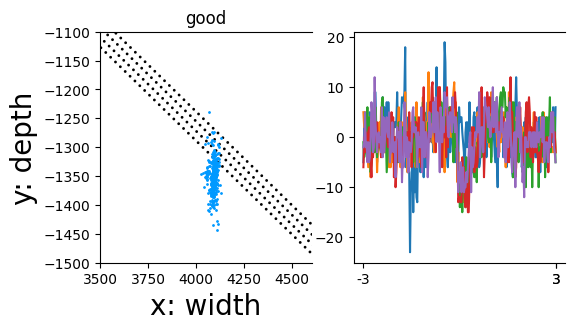

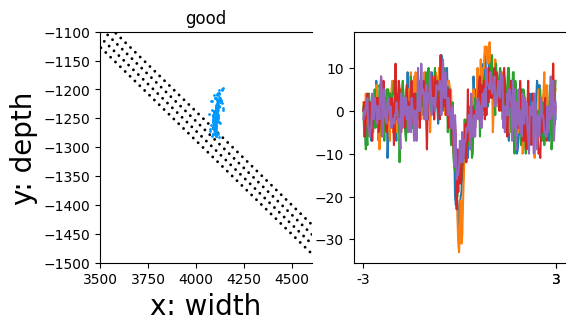

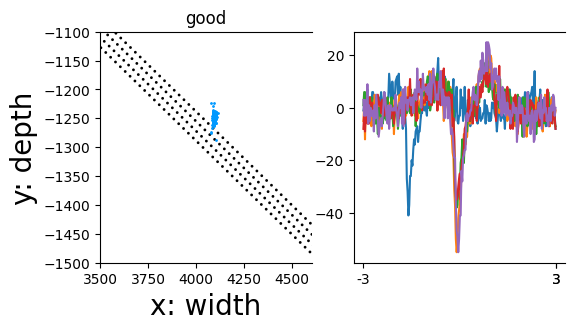

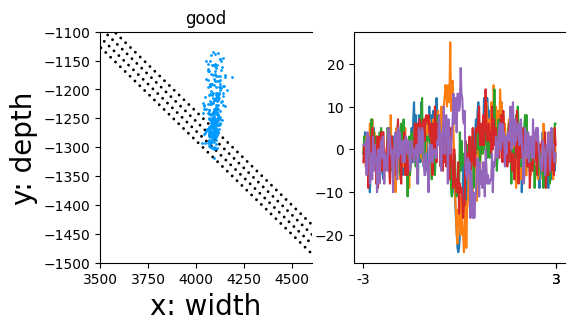

In [193]:
# plot all unit waveforms
plot_all_unit_waveforms(
    ax, we, comp, max_chids, Probe, fp_unit_ids, spike_loc_mt, n_spikes, metrics
)

# Waveform dataset augmented with quality metrics

* Test 1: quality metrics as continuous auxiliary labels (not the best approach, just curious)
    * 10 dimension - 10000 iterations

        * pooled: {'mae': 0.0, 'r2': 0.008246647945259866, 'accuracy': 0.8123791102514507, 'bal_accuracy': 0.7634082189613574, 'precision': 0.6214285714285714, 'recall': 0.6641221374045801, 'f1_score': 0.6420664206642066}


        * l23: {'mae': 0.0, 'r2': -1.2857142857142856, 'accuracy': 0.75, 'bal_accuracy': 0.42857142857142855, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
        l4: {'mae': 0.0, 'r2': 0.29761904761904745, 'accuracy': 0.8305084745762712, 'bal_accuracy': 0.8244047619047619, 'precision': 0.7916666666666666, 'recall': 0.7916666666666666, 'f1_score': 0.7916666666666666}
        l5: {'mae': 0.0, 'r2': -0.0036260036260034045, 'accuracy': 0.8346666666666667, 'bal_accuracy': 0.7821807821807822, 'precision': 0.5869565217391305, 'recall': 0.6923076923076923, 'f1_score': 0.6352941176470588}
        l6: {'mae': 0.0, 'r2': -0.3027777777777778, 'accuracy': 0.6865671641791045, 'bal_accuracy': 0.7074074074074074, 'precision': 0.5789473684210527, 'recall': 0.8148148148148148, 'f1_score': 0.676923076923077}

    * 20 dimensions - 20000 iterations - same performance.

* Main test: quality metrics added to waveform dataset

In [41]:
# parameters
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000  # 10000
TRAIN = False
DIMENSION = 10  # increase output dimensionality
SHOW_DIMS = [0, 1, 2]
N_SPIKES = 50  # 25 # miniumum number of spikes per units

# model parameters
model_cfg = {
    "model_architecture": "offset10-model",  # receptive field size
    "distance": "cosine",
    "batch_size": 1024,
    "temperature_mode": "auto",
    "learning_rate": 0.001,
    "max_iterations": MAX_ITER,
    "conditional": "time_delta",
    "time_offsets": 10,  # 10 timesteps (should be >= nb of receptve fields)
    "output_dimension": DIMENSION,
    "device": "cuda_if_available",
    "verbose": True,
}

In [42]:
# DATASETS

# TRAINING (EVOKED) ***************

# (16m) layer-wise
data_lyr_ev_mixed_20Khz = get_dataset_by_layer(
    KS4_ne_10m,
    GT_ne_10m,
    STUDY_ne,
    quality_path,
    "KS4",
    "E",
    N_SPIKES,
    3,
    1,
    continuous_qmetrics=True,
    qmetrics_in_dataset=True,
    load_if_exists=True,
)

# pooled dataset
data_pool_ev_mixed_20Khz = get_dataset_pooled(
    data_lyr_ev_mixed_20Khz,
    continuous_qmetrics=True,
    qmetrics_in_dataset=True,
)

# report sample size
print(data_lyr_ev_mixed_20Khz["unit_ids_l23"].shape[0])
print(data_lyr_ev_mixed_20Khz["unit_ids_l4"].shape[0])
print(data_lyr_ev_mixed_20Khz["unit_ids_l5"].shape[0])
print(data_lyr_ev_mixed_20Khz["unit_ids_l6"].shape[0])

/tmp/ipykernel_269414/412722301.py:259: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 20000.0
calculating continuous quality metrics labels


extract amplitudes:   0%|          | 0/3618 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/3618 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/3618 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/3618 [00:00<?, ?it/s]

/tmp/ipykernel_269414/412722301.py:1105: RuntimeWarning: divide by zero encountered in scalar divide
  return np.absolute(np.std(amplitude) / np.median(amplitude))


extract amplitudes:   0%|          | 0/3618 [00:00<?, ?it/s]

ex. data shape (L4): (104, 6007)
ex. label shape (L4): (104,)
31
104
3211
134


In [43]:
# TEST (SPONTANEOUS) ******************

# layer-wise
data_lyr_sp_mixed_20Khz = get_dataset_by_layer(
    KS4_ns_10m,
    GT_ns_10m,
    STUDY_ns,
    quality_path,
    "KS4",
    "NS",
    N_SPIKES,
    3,
    2,
    continuous_qmetrics=True,
    qmetrics_in_dataset=True,
    load_if_exists=True,
)

# pooled
data_pool_sp_mixed_20Khz = get_dataset_pooled(
    data_lyr_sp_mixed_20Khz, continuous_qmetrics=True, qmetrics_in_dataset=True
)

# report sample size
print(data_lyr_sp_mixed_20Khz["unit_ids_l23"].shape[0])
print(data_lyr_sp_mixed_20Khz["unit_ids_l4"].shape[0])
print(data_lyr_sp_mixed_20Khz["unit_ids_l5"].shape[0])
print(data_lyr_sp_mixed_20Khz["unit_ids_l6"].shape[0])

/tmp/ipykernel_269414/412722301.py:259: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 40000.0
calculating continuous quality metrics labels


extract amplitudes:   0%|          | 0/2058 [00:00<?, ?it/s]

/tmp/ipykernel_269414/412722301.py:1105: RuntimeWarning: divide by zero encountered in scalar divide
  return np.absolute(np.std(amplitude) / np.median(amplitude))


ex. data shape (L4): (58, 6007)
ex. label shape (L4): (58,)
15
58
371
67


### (32m)Run 17 (Pooled, mixed dataset)

* dataset contains N first waveforms and quality metrics.

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudn

accuracy metrics:

pooled: {'mae': 0.0, 'r2': 0.13772599437525102, 'accuracy': 0.8356164383561644, 'bal_accuracy': 0.7444154278826838, 'precision': 0.7373737373737373, 'recall': 0.5572519083969466, 'f1_score': 0.6347826086956522}


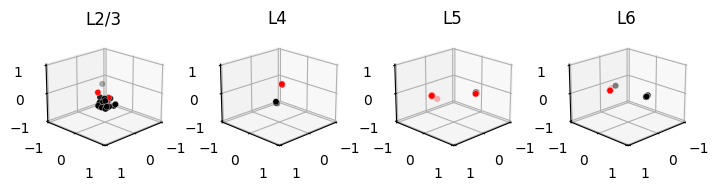

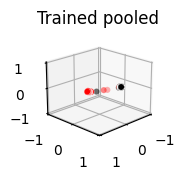

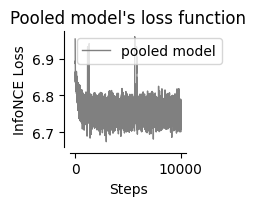

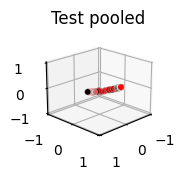

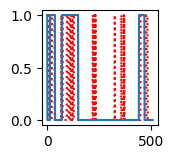

In [44]:
# train, test and evaluate
rez_e2s_20Khz_pooled_mixed_pms4 = train_test_eval(
    model_cfg,
    TRAIN,
    MODEL_PATH_20Khz_e2s_pm4_mixed_dataset,
    data_lyr_ev_mixed_20Khz,
    data_pool_sp_mixed_20Khz,  # test
    data_pool_ev_mixed_20Khz,
    SHOW_DIMS,
    tight_layout_cfg,
    mixed_model=False,
)

### Run 18 (layer-wise, mixed labels)

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudn

accuracy metrics:

l23: {'mae': 0.0, 'r2': -0.1538461538461542, 'accuracy': 0.8666666666666667, 'bal_accuracy': 0.5, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
l4: {'mae': 0.0, 'r2': 0.218137254901961, 'accuracy': 0.8103448275862069, 'bal_accuracy': 0.8014705882352942, 'precision': 0.782608695652174, 'recall': 0.75, 'f1_score': 0.7659574468085106}
l5: {'mae': 0.0, 'r2': 0.12339196639537908, 'accuracy': 0.8544474393530997, 'bal_accuracy': 0.7385140456812811, 'precision': 0.7, 'recall': 0.5384615384615384, 'f1_score': 0.6086956521739131}
l6: {'mae': 0.0, 'r2': 0.37962962962962954, 'accuracy': 0.8507462686567164, 'bal_accuracy': 0.8268518518518518, 'precision': 0.9047619047619048, 'recall': 0.7037037037037037, 'f1_score': 0.7916666666666666}


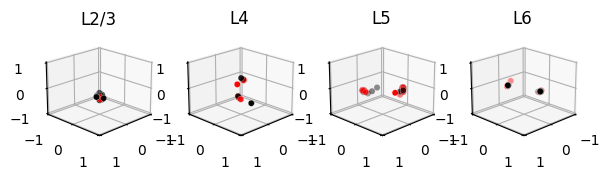

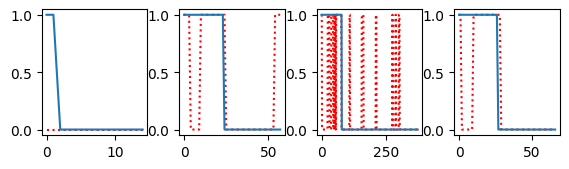

In [45]:
rez_e2s_20Khz_lyr_mixed_pms4 = train_test_eval_layerwise(
    rez_e2s_20Khz_pooled_mixed_pms4["model_lyr_ev"],
    data_lyr_sp_mixed_20Khz,
    data_lyr_ev_mixed_20Khz,
    SHOW_DIMS,
    tight_layout_cfg,
)

# Error Analysis

In [47]:
def eval_each_prediction(model_out: dict, data: dict, layer: str):
    """_summary_

    Args:
        model_out (_type_): _description_
        data (_type_): _description_
        layer (str): "l23", "l4", "l5", l6""

    Returns:
        _type_: _description_
    """

    # evaluate best model's individual predictions
    evals = get_tp_tn_fp_fn(
        model_out[f"eval_rez_{layer}"]["prediction"],
        data[f"label_{layer}"],
    )

    # Analyze the model's false positive errors:
    # compare the two sets of units. What makes some poor units incorrectly detected as good (FP)
    # while others are correctly rejected
    tp_unit_ids = data[f"unit_ids_{layer}"][evals == "TP"]  # correct
    tn_unit_ids = data[f"unit_ids_{layer}"][evals == "TN"]  # correct
    fp_unit_ids = data[f"unit_ids_{layer}"][evals == "FP"]  # incorrect

    # report
    print("tp:", tp_unit_ids)
    print("tn:", tn_unit_ids)
    print("fp:", fp_unit_ids)
    return tp_unit_ids, tn_unit_ids, fp_unit_ids

tp: [359 345 321 318 316 397 394 392 391 413 424 286 133 213 214 135 173 125
 212 162 188 172 166 205 145 198 195 199 152 238 269 285 284 280 247 252
  83  95 240 241  91 262]
tn: [  0 430 429 427 423 422 421 420 419 418 417 416 415 409 408 406 404 403
 400 398 396 395 393 431 390 464 434 387 386 347 341 339 338 337 336 334
 333 332 330 329 327 326 322 320 319 317 315 314 313 312 311 310 348 349
 350 351 384 383 382 381 380 378 377 375 374 373 372 371 370 368 367 366
 365 364 361 309 510 509 508 507 506 504 503 502 501 500 498 497 496 493
 491 490 489 511 512 513 514 519 518 517 515 308 306 305 102 101  99  97
  93  92  90  89  88  87  86  85  80  79  74  71  70 103 150 149 148 144
 141 140 139 132 131 130  69 129 124 123 115 113 111 128 151  22  21  20
  18  17  16  15  14  12  11  10   9   8   7   6   5   4   3   2   1  65
  62  55  67  44  41  40 153 155 261 260 259 258 257 256 255 253 251 250
 249 248 246 244 243 242 239 237 236 235 234 233 232 230 265 266 304 303
 302 300 298 295 

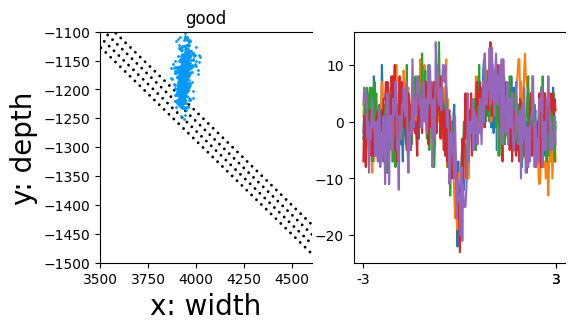

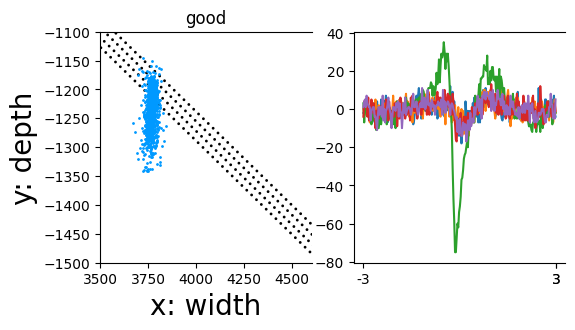

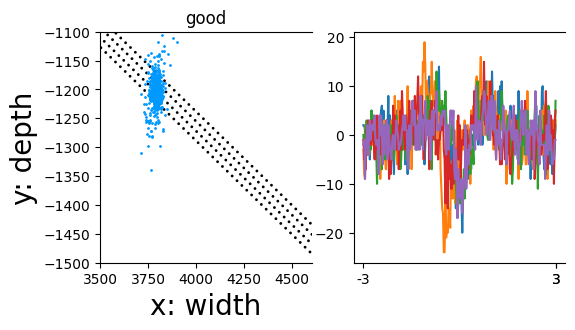

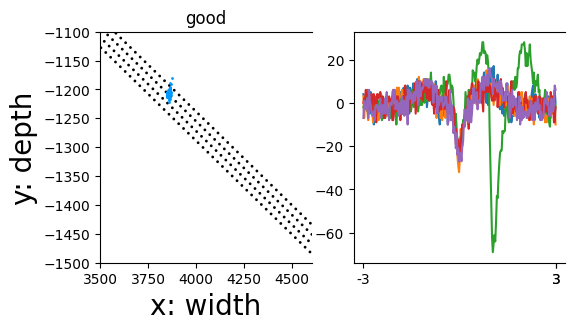

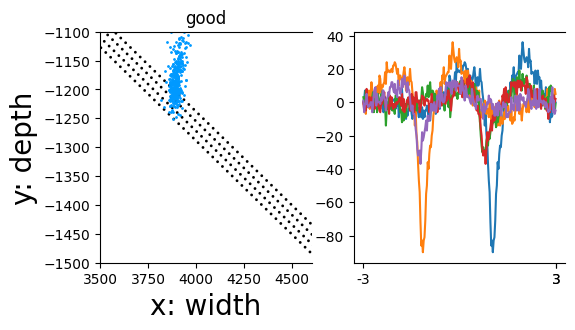

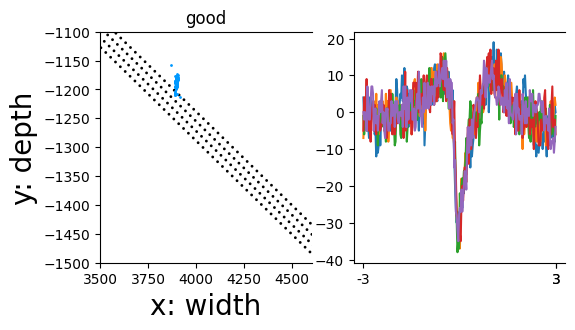

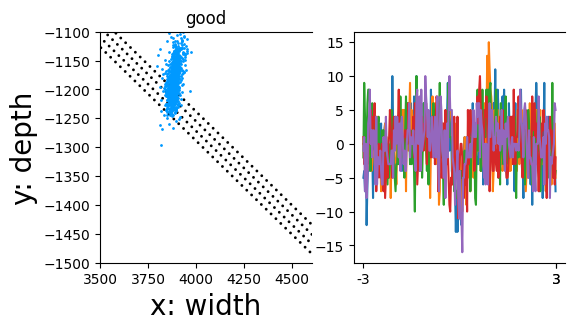

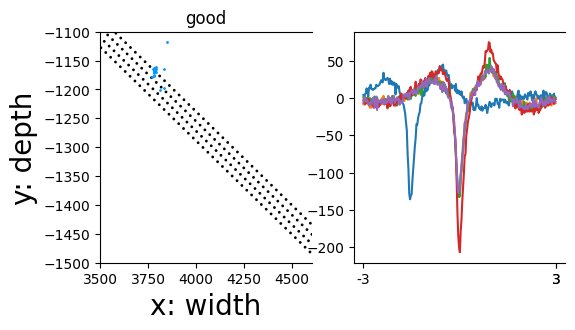

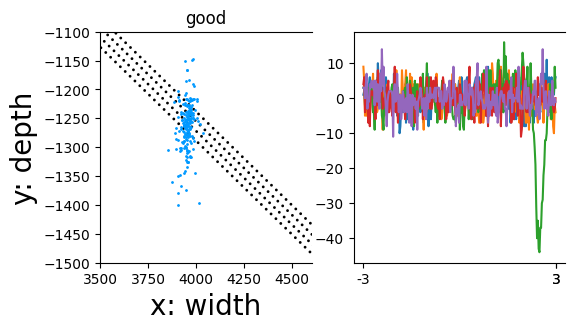

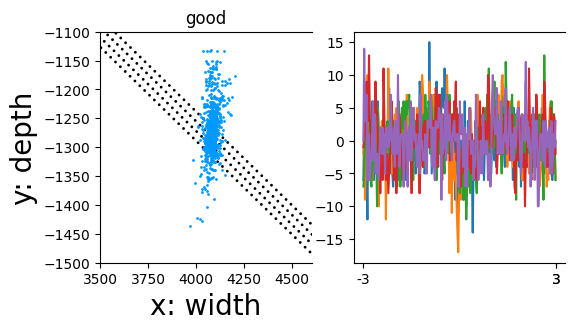

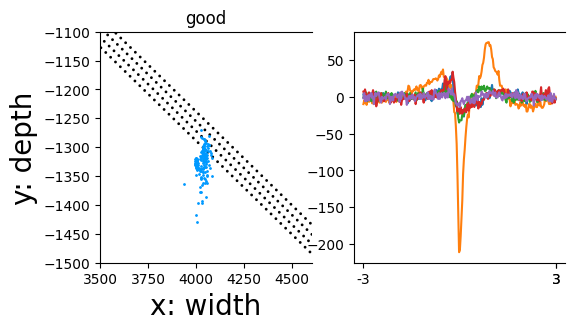

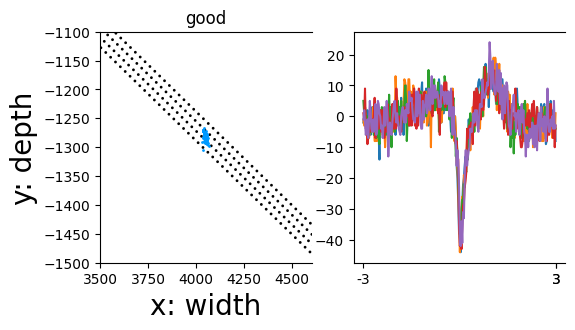

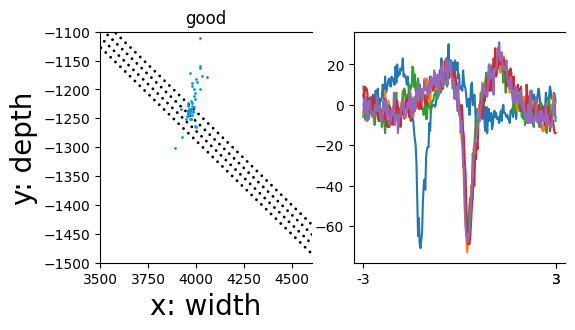

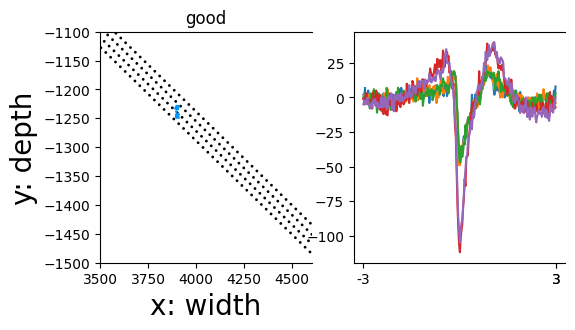

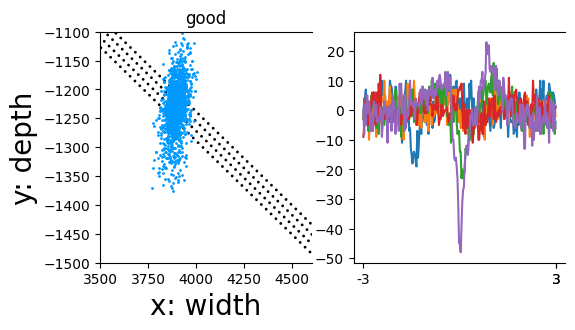

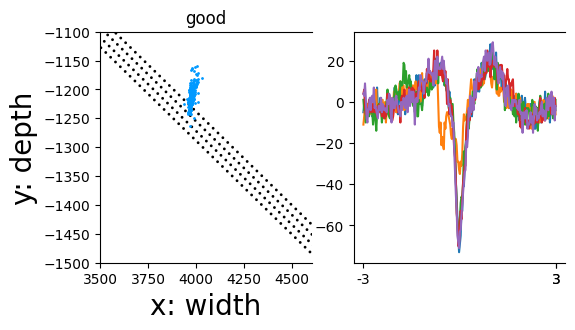

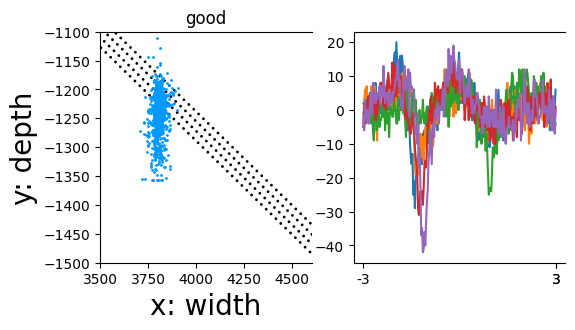

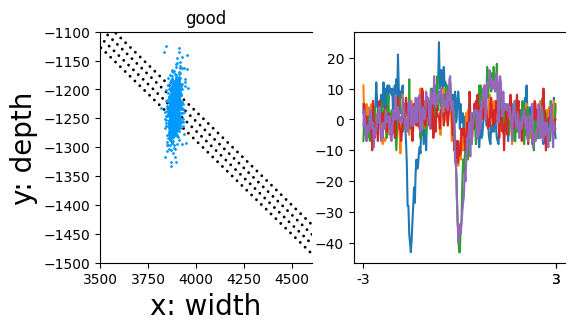

In [48]:
# evaluate individual prediction
tp_ids, tn_ids, fp_ids = eval_each_prediction(
    rez_e2s_20Khz_lyr_mixed_pms4, data_lyr_sp_mixed_20Khz, layer="l5"
)

# plot all unit waveforms
plot_all_unit_waveforms(
    we,
    comp,
    max_chids,
    Probe,
    fp_unit_ids,
    spike_loc_mt,
    n_spikes,
    metrics,
)

# Space-time

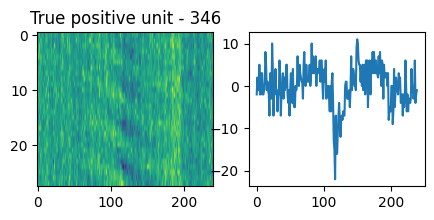

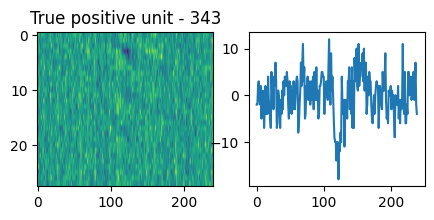

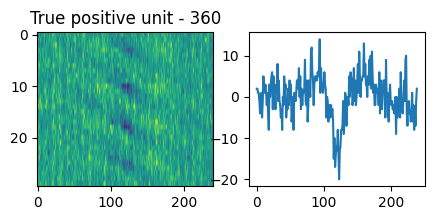

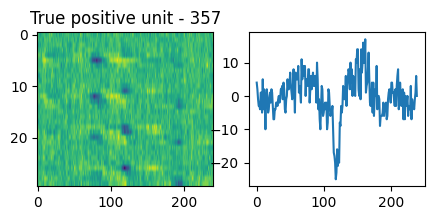

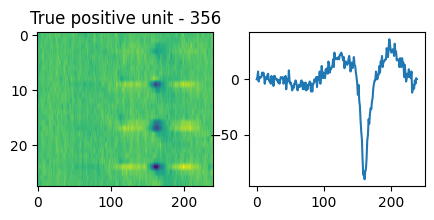

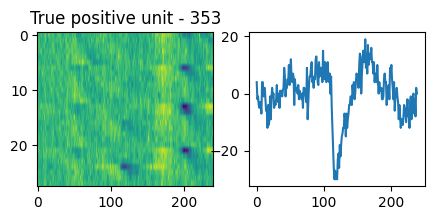

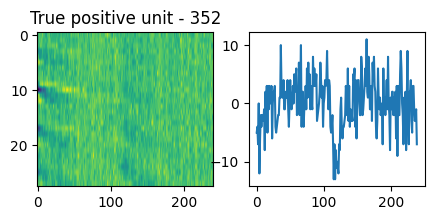

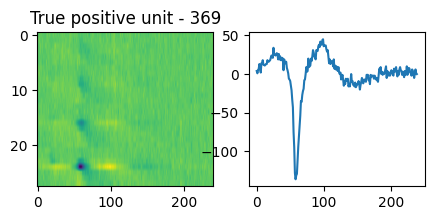

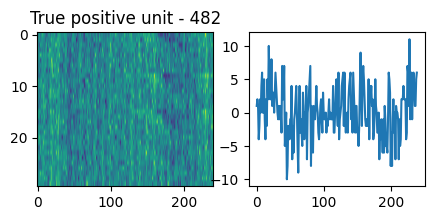

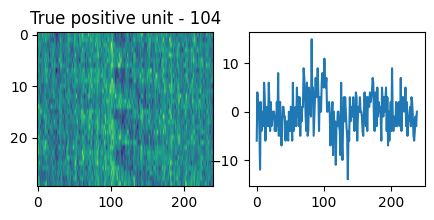

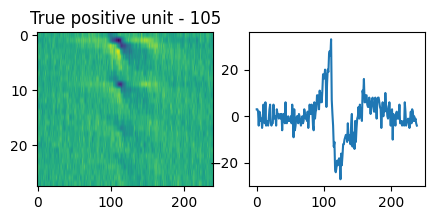

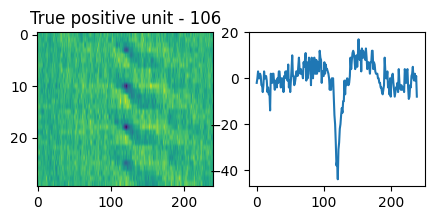

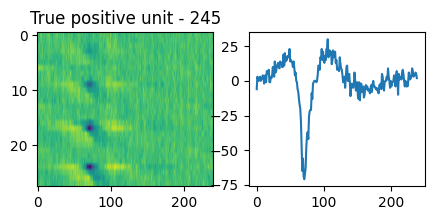

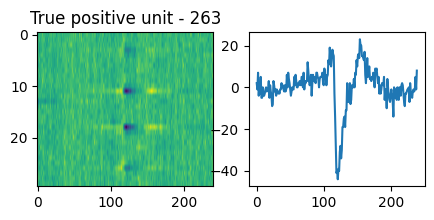

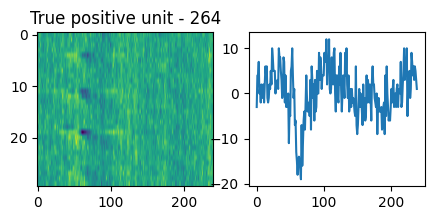

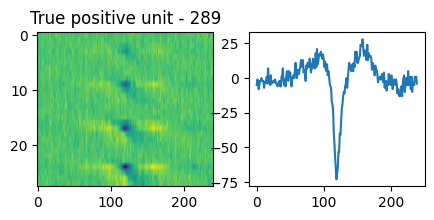

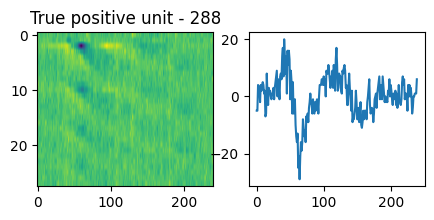

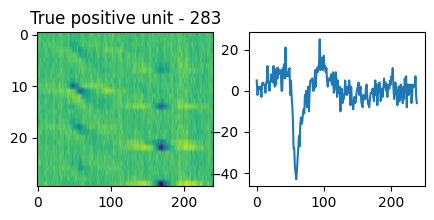

In [50]:
unit_id = 359
interval_ms = 3
sfreq = 40000

# spontaneous (test)
we = si.WaveformExtractor.load_from_folder(STUDY_ns)

for unit in fp_unit_ids:
    _, ax = plt.subplots(1, 2, figsize=(5, 2))
    ax = plot_waveforms_2D(we, unit_id=unit)
    ax[0].set_title(f"True positive unit - {unit_id}")

/tmp/ipykernel_269414/3310821158.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(1, 2, figsize=(5, 2))


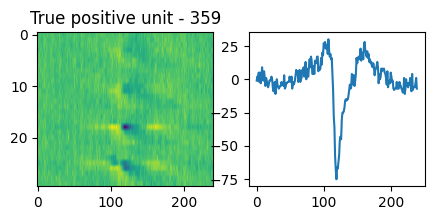

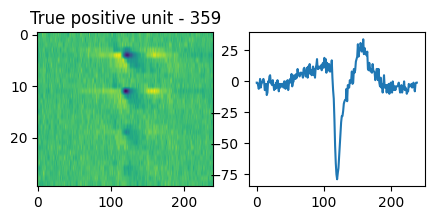

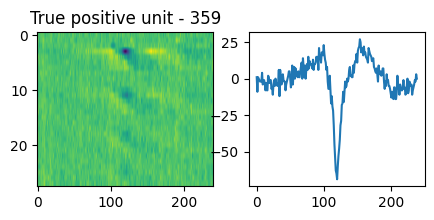

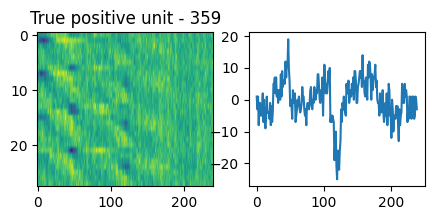

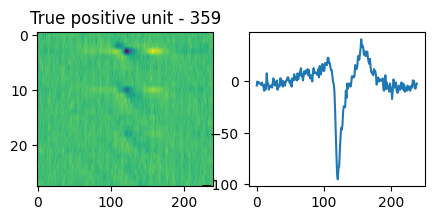

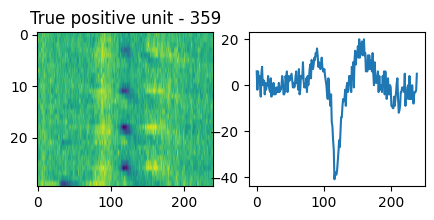

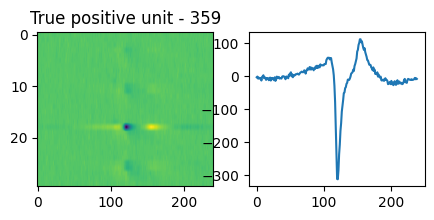

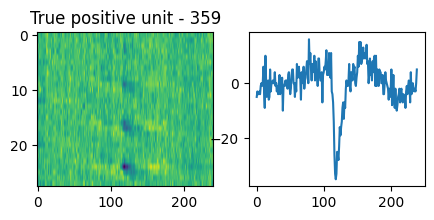

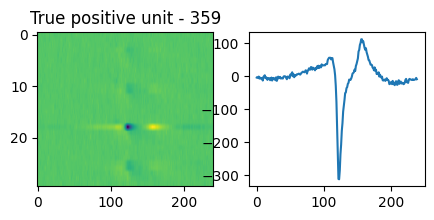

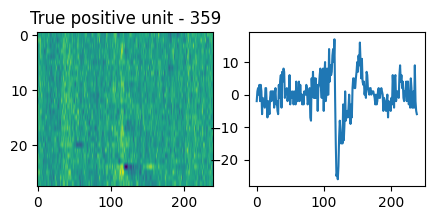

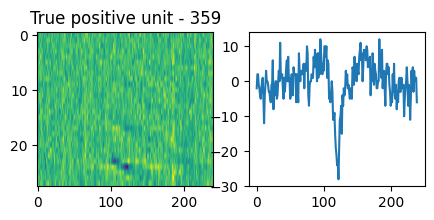

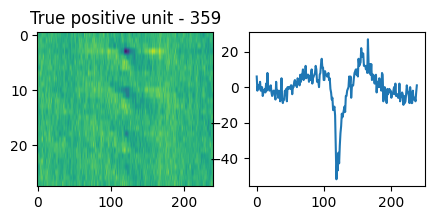

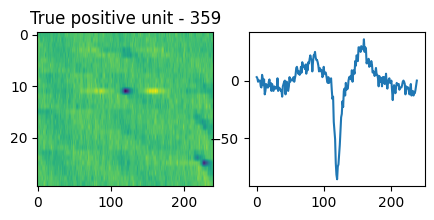

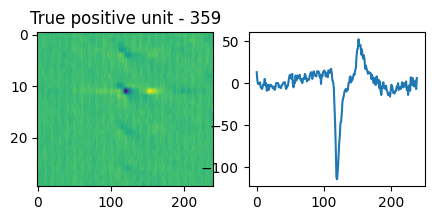

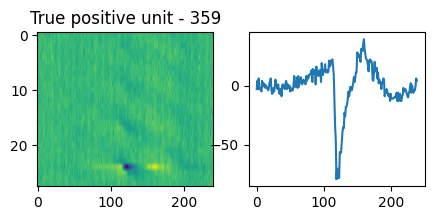

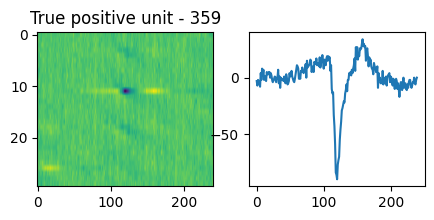

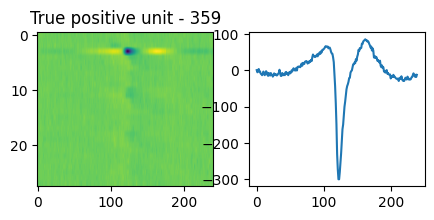

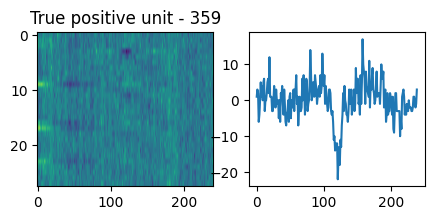

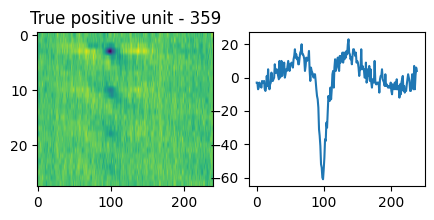

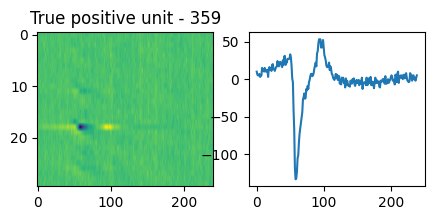

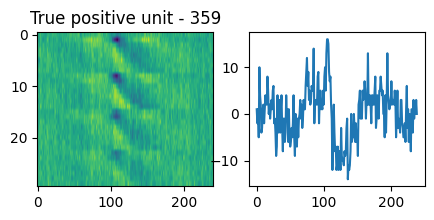

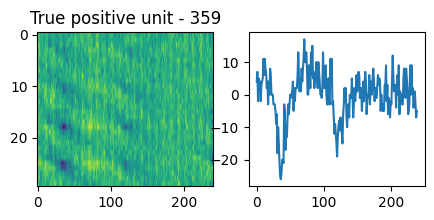

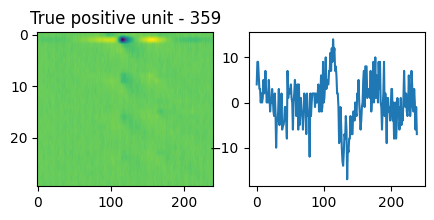

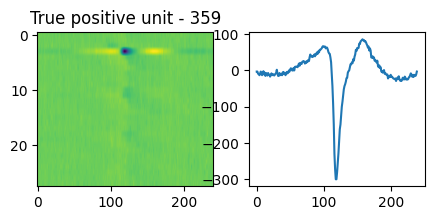

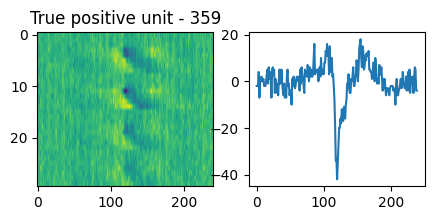

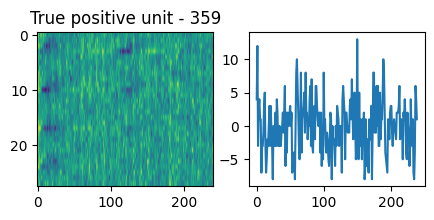

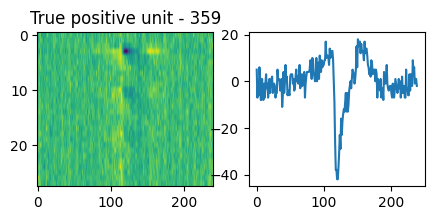

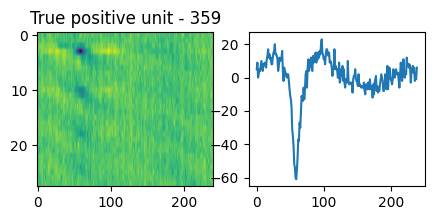

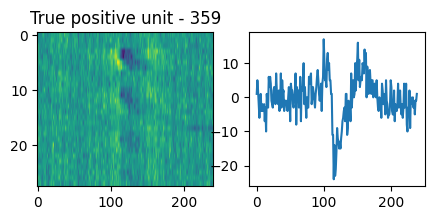

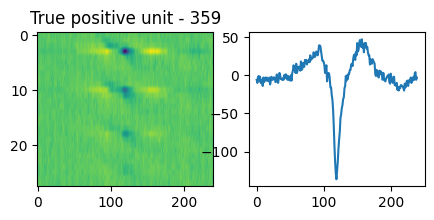

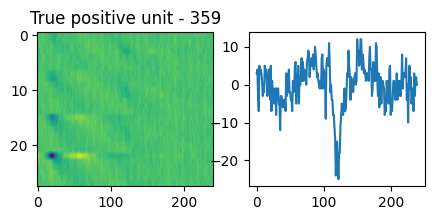

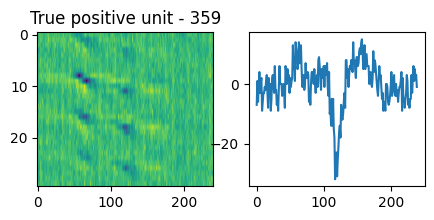

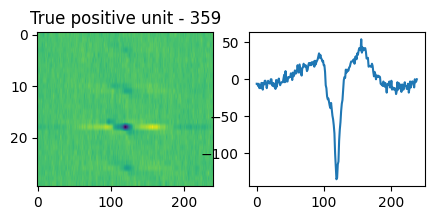

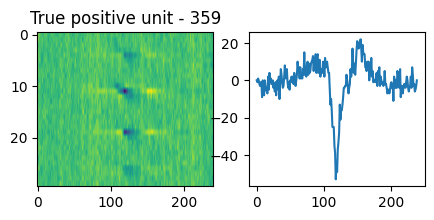

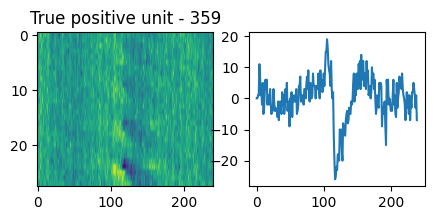

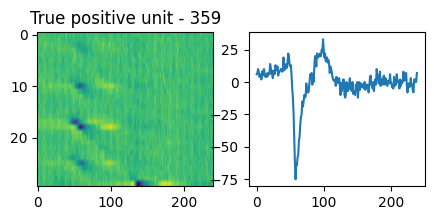

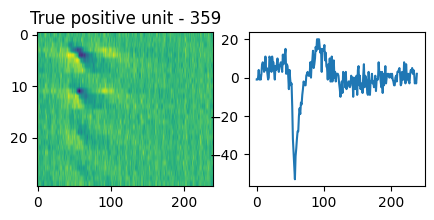

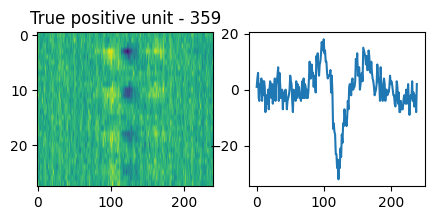

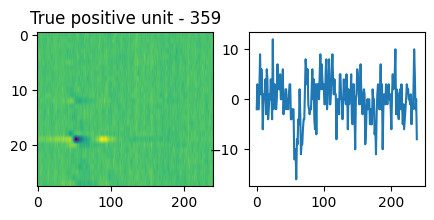

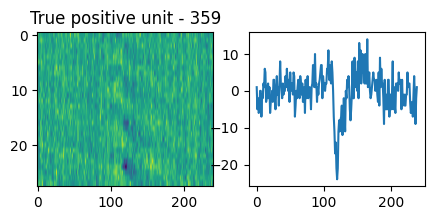

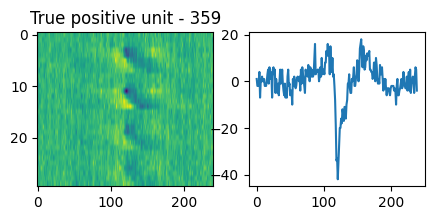

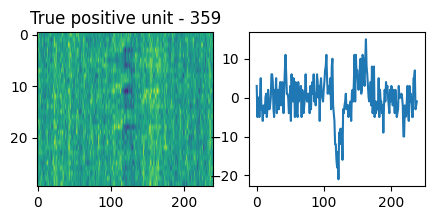

In [53]:
interval_ms = 3
sfreq = 40000

# spontaneous (test)
we = si.WaveformExtractor.load_from_folder(STUDY_ns)

for unit in tp_unit_ids:
    _, ax = plt.subplots(1, 2, figsize=(5, 2))
    ax = plot_waveforms_2D(we, unit_id=unit)
    ax[0].set_title(f"True positive unit - {unit_id}")

In [39]:
we = si.WaveformExtractor.load_from_folder(STUDY_ns)
ax = plot_2d_1d_waveform_and_sites(we, tp_unit_ids[0], N_SITE, site_coord)

NameError: name 'tp_unit_ids' is not defined

/tmp/ipykernel_269414/2317756628.py:1232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(c_ids_new)


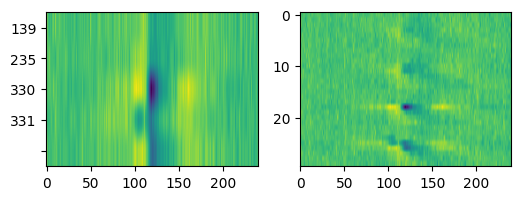

In [306]:
# plot 2d waveform on nearest sites to the unit
Probe = si.load_extractor(REC_ns).get_probe()

fig, ax = plt.subplots(1, 2, figsize=(6, 2))
ax = plot_2d_waveform_on_neareast_sites(
    ax, we, Probe.contact_positions, n_sites=5, unit_id=tp_unit_ids[0]
)

# 2D-waves + spike qmetrics

* (batch_size: 1024 - n_sites: 5, n_spikes: 40):
    * pooled: {'mae': 0.0, 'r2': 0.05624010739115626, 'accuracy': 0.8203125, 'bal_accuracy': 0.7264931578209213, `'precision': 0.693069306930693`, 'recall': 0.5343511450381679, 'f1_score': 0.603448275862069}

    * layer-wise:
        * l23: {'mae': 0.0, 'r2': -0.7307692307692313, 'accuracy': 0.8, 'bal_accuracy': 0.46153846153846156, 'precision': `0.0`, 'recall': 0.0, 'f1_score': 0.0}
        * l4: {'mae': 0.0, 'r2': -0.20833333333333282, 'accuracy': 0.7068965517241379, 'bal_accuracy': 0.6703431372549019, 'precision': `0.7333333333333333`, 'recall': 0.4583333333333333, 'f1_score': 0.5641025641025641}
        * l5: {'mae': 0.0, 'r2': 0.075353218210361, 'accuracy': 0.8467741935483871, 'bal_accuracy': 0.7711930926216641, 'precision': `0.6329113924050633`, 'recall': 0.6410256410256411, 'f1_score': 0.6369426751592356}
        * l6: {'mae': 0.0, 'r2': 0.25555555555555554, 'accuracy': 0.8208955223880597, 'bal_accuracy': 0.8138888888888889, 'precision':` 0.7777777777777778`, 'recall': 0.7777777777777778, 'f1_score': 0.7777777777777778}


* (batch_size: 512 - n_sites: 10, n_spikes: 40):
    * pooled: {'mae': 0.0, 'r2': 0.24088878203201702, 'accuracy': 0.85546875, 'bal_accuracy': 0.8052132796377551, 'precision': `0.7244094488188977`, 'recall': 0.7022900763358778, 'f1_score': 0.7131782945736435}
    * layer-wise:
        * l23: {'mae': 0.0, 'r2': -3.03846153846154, 'accuracy': 0.5333333333333333, 'bal_accuracy': 0.5192307692307692, 'precision': `0.14285714285714285`, 'recall': 0.5, 'f1_score': 0.2222222222222222}
        * l4: {'mae': 0.0, 'r2': -0.13725490196078383, 'accuracy': 0.7241379310344828, 'bal_accuracy': 0.7034313725490196, 'precision': `0.7`, 'recall': 0.5833333333333334, 'f1_score': 0.6363636363636364}
        * l5: {'mae': 0.0, 'r2': -0.005756148613291545, 'accuracy': 0.8333333333333334, 'bal_accuracy': 0.7956567242281527, 'precision': `0.5816326530612245`, 'recall': 0.7307692307692307, 'f1_score': 0.6477272727272727}
        * l6: {'mae': 0.0, 'r2': 0.37962962962962954, 'accuracy': 0.8507462686567164, 'bal_accuracy': 0.8449074074074074, 'precision': `0.8148148148148148`, 'recall': 0.8148148148148148, 'f1_score': 0.8148148148148148}
    
* TODO plot loss function by layer.


### Model train/test

In [31]:
# parameters
# cebra
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000  # 10000
TRAIN = False
DIMENSION = 10  # output dimensionality
SHOW_DIMS = [0, 1, 2]

# dataset
N_SPIKES = 40  # min. spike count (which fits into GPU memory)
N_SITES = 10  # site count for 2D waveform (default ~30, to fit into GPU memory)

# model parameters
model_cfg = {
    "model_architecture": "offset10-model",  # receptive field size
    "distance": "cosine",
    "batch_size": 512,  # (153) need to reduce batch size as dataset becomes larger
    "temperature_mode": "auto",
    "learning_rate": 0.001,
    "max_iterations": MAX_ITER,
    "conditional": "time_delta",
    "time_offsets": 10,  # 10 timesteps (should be >= nb of receptve fields)
    "output_dimension": DIMENSION,
    "device": "cuda_if_available",
    "verbose": True,
}

In [6]:
# DATASETS

# (48 min)TRAINING (EVOKED) ***************
# - 48 min (n_sites=25)
# - 26 min (n_sites=10)
# - 13 min (n_sites=5)

Probe_ne = si.load_extractor(REC_ne).get_probe()

# layer-wise dataset
data_lyr_ev_mixed_2dwave_20Khz = get_dataset_by_layer(
    KS4_ne_10m,
    GT_ne_10m,
    STUDY_ne,
    quality_path,
    "KS4",
    "E",
    N_SPIKES,
    interval_ms=3,
    downsample=1,
    continuous_qmetrics=True,
    qmetrics_in_dataset=True,
    load_if_exists=True,
    wave_dim=2,
    n_sites=N_SITES,
    site_coord=Probe_ne.contact_positions,
)

# pooled dataset
data_pool_ev_mixed_2dwave_20Khz = get_dataset_pooled(
    data_lyr_ev_mixed_2dwave_20Khz,
    continuous_qmetrics=True,
    qmetrics_in_dataset=True,
)

# report unit sample size
print(data_lyr_ev_mixed_2dwave_20Khz["unit_ids_l23"].shape[0])
print(data_lyr_ev_mixed_2dwave_20Khz["unit_ids_l4"].shape[0])
print(data_lyr_ev_mixed_2dwave_20Khz["unit_ids_l5"].shape[0])
print(data_lyr_ev_mixed_2dwave_20Khz["unit_ids_l6"].shape[0])

/tmp/ipykernel_236777/1588007118.py:394: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 20000.0
calculating continuous quality metrics labels


extract amplitudes:   0%|          | 0/3618 [00:00<?, ?it/s]

/tmp/ipykernel_236777/1588007118.py:1284: RuntimeWarning: divide by zero encountered in scalar divide
  return np.absolute(np.std(amplitude) / np.median(amplitude))


ex. data shape (L4): (104, 48007)
ex. label shape (L4): (104,)
31
104
3231
134


In [9]:
# (2m) TEST (SPONTANEOUS) ******************
# (2m) n_sites = 10

Probe_ns = si.load_extractor(REC_ns).get_probe()

# layer-wise test dataset
data_lyr_sp_mixed_2dwave_20Khz = get_dataset_by_layer(
    KS4_ns_10m,
    GT_ns_10m,
    STUDY_ns,
    quality_path,
    sorter="KS4",
    exp="NS",
    num_spike=N_SPIKES,
    interval_ms=3,
    downsample=2,
    continuous_qmetrics=True,
    qmetrics_in_dataset=True,
    load_if_exists=True,
    wave_dim=2,
    n_sites=N_SITES,
    site_coord=Probe_ns.contact_positions,
)

# pooled test dataset
data_pool_sp_mixed_2dwave_20Khz = get_dataset_pooled(
    data_lyr_sp_mixed_2dwave_20Khz, continuous_qmetrics=True, qmetrics_in_dataset=True
)

# report sample size
print(data_lyr_sp_mixed_2dwave_20Khz["unit_ids_l23"].shape[0])
print(data_lyr_sp_mixed_2dwave_20Khz["unit_ids_l4"].shape[0])
print(data_lyr_sp_mixed_2dwave_20Khz["unit_ids_l5"].shape[0])
print(data_lyr_sp_mixed_2dwave_20Khz["unit_ids_l6"].shape[0])

/tmp/ipykernel_236777/1588007118.py:394: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 40000.0
calculating continuous quality metrics labels


extract amplitudes:   0%|          | 0/2058 [00:00<?, ?it/s]

/tmp/ipykernel_236777/1588007118.py:1284: RuntimeWarning: divide by zero encountered in scalar divide
  return np.absolute(np.std(amplitude) / np.median(amplitude))


ex. data shape (L4): (58, 48007)
ex. label shape (L4): (58,)
15
58
372
67


accuracy metrics:

pooled: {'mae': 0.0, 'r2': 0.24088878203201702, 'accuracy': 0.85546875, 'bal_accuracy': 0.8052132796377551, 'precision': 0.7244094488188977, 'recall': 0.7022900763358778, 'f1_score': 0.7131782945736435}


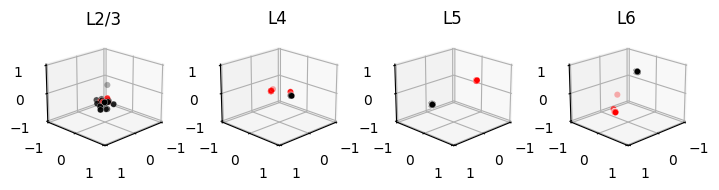

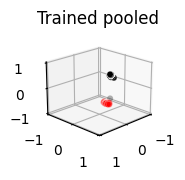

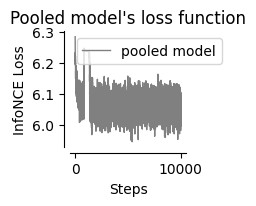

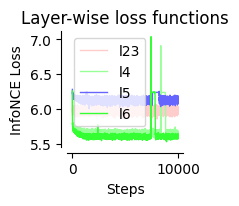

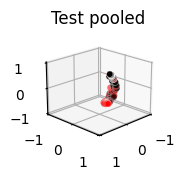

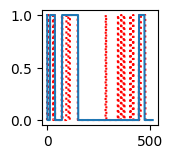

In [37]:
# (2h/load: 10s) train, test and evaluate
rez_e2s_20Khz_pooled_mixed_pms4_2dwave = train_test_eval(
    model_cfg,
    TRAIN,
    MODEL_PATH_20Khz_e2s_pm4_mixed_dataset_2dwave,
    data_lyr_ev_mixed_2dwave_20Khz,
    data_pool_sp_mixed_2dwave_20Khz,  # test
    data_pool_ev_mixed_2dwave_20Khz,
    SHOW_DIMS,
    tight_layout_cfg,
    mixed_model=False,
)

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudn

accuracy metrics:

l23: {'mae': 0.0, 'r2': -3.03846153846154, 'accuracy': 0.5333333333333333, 'bal_accuracy': 0.5192307692307692, 'precision': 0.14285714285714285, 'recall': 0.5, 'f1_score': 0.2222222222222222}
l4: {'mae': 0.0, 'r2': -0.13725490196078383, 'accuracy': 0.7241379310344828, 'bal_accuracy': 0.7034313725490196, 'precision': 0.7, 'recall': 0.5833333333333334, 'f1_score': 0.6363636363636364}
l5: {'mae': 0.0, 'r2': -0.005756148613291545, 'accuracy': 0.8333333333333334, 'bal_accuracy': 0.7956567242281527, 'precision': 0.5816326530612245, 'recall': 0.7307692307692307, 'f1_score': 0.6477272727272727}
l6: {'mae': 0.0, 'r2': 0.37962962962962954, 'accuracy': 0.8507462686567164, 'bal_accuracy': 0.8449074074074074, 'precision': 0.8148148148148148, 'recall': 0.8148148148148148, 'f1_score': 0.8148148148148148}


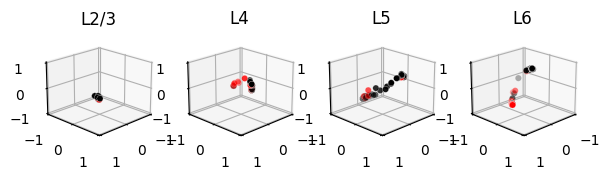

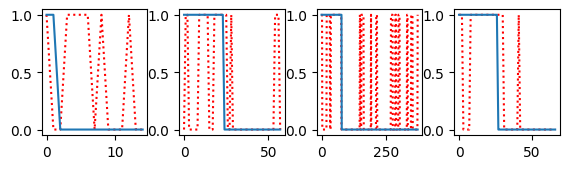

In [17]:
rez_e2s_20Khz_lyr_mixed_pms4_2dwave = train_test_eval_layerwise(
    rez_e2s_20Khz_pooled_mixed_pms4_2dwave["model_lyr_ev"],
    data_lyr_sp_mixed_2dwave_20Khz,
    data_lyr_ev_mixed_2dwave_20Khz,
    SHOW_DIMS,
    tight_layout_cfg,
)

### Error Analysis

* false positive features:
    * high snr
    * many surrounding spikes temporally (indicating lots of nearby neurons)

tp: [359 345 358 342 340 335 323 321 318 316 397 394 392 391 399 402 425 410
 413 424 286 133 213 214 135 138 231 117 116 173 125 212 162 161 188 190
 172 166 205 145 198 195 199 152 238 269 285 284 280 247 252  83  95 240
 241  91 262]
tn: [  0 430 429 427 423 422 421 420 419 418 417 416 415 409 408 406 404 403
 400 398 396 395 393 431 390 464 434 387 386 347 346 343 341 339 338 337
 336 334 333 332 330 329 327 326 322 320 319 317 315 314 313 312 311 310
 348 349 350 351 384 383 382 381 380 378 377 375 374 373 372 371 367 366
 365 364 510 509 508 507 506 505 504 503 502 501 500 498 497 496 493 491
 490 489 511 512 513 514 519 518 517 515 308 306 102 101  99  97  93  92
  90  89  88  87  86  85  80  79  74  71  70 103 104 148 144 141 140 139
 132 131 130  69 129 124 123 115 113 111 128 151  22  21  20  18  17  16
  15  14  12  11  10   9   8   7   6   5   4   3   2   1  65  62  55  67
  44  41  40 153 155 261 260 259 258 257 256 255 244 243 242 239 237 236
 235 234 233 232 265 266 304 

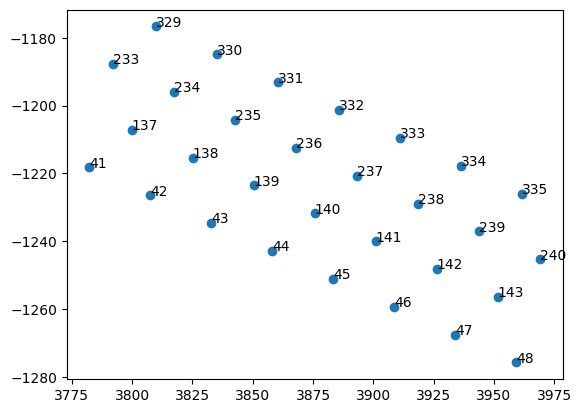

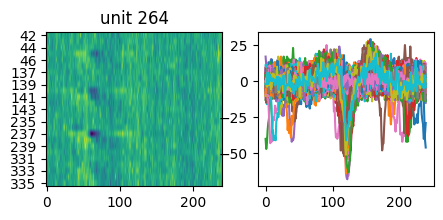

In [102]:
# parameters
LAYER = "l5"
UNIT_ID = fp_ids[25]

# evaluate individual prediction
tp_ids, tn_ids, fp_ids = eval_each_prediction(
    rez_e2s_20Khz_lyr_mixed_pms4_2dwave,
    data_lyr_sp_mixed_2dwave_20Khz,
    layer=LAYER,
)

# plot
we = si.WaveformExtractor.load_from_folder(STUDY_ns)
site_coord = si.load_extractor(REC_ns).get_probe().contact_positions

# ax = plot_2d_1d_waveform_and_sites(we, UNIT_ID, 10, site_coord)
ax = plot_2d_1d_waveform_and_sites(we, UNIT_ID, 25, site_coord)

In [109]:
# # (10m)
# from spikeinterface.postprocessing import compute_principal_components

# # spikeinterface.qualitymetrics.pca_metrics.nearest_neighbors_isolation
# # spikeinterface.qualitymetrics.pca_metrics.mahalanobis_metrics

# # with PCs
# pca = compute_principal_components(
#     waveform_extractor=we,
#     n_components=5,
#     mode="by_channel_local",
#     job_kwargs=job_kwargs,
# )

In [14]:
# 64 minutes
# metrics = qm(WeNs, load_if_exists=True, **job_kwargs)

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:848: UserWarning: Units [26, 29, 48, 55, 56, 66, 71, 76, 83, 86, 90, 105, 110, 116, 126, 146, 149, 152, 183, 193, 201, 202, 211, 263, 270, 277, 286, 291, 299, 304, 321, 325, 342, 365, 368, 371, 380, 386, 391, 396, 401, 402, 405, 408, 410, 411, 420, 424, 429, 440, 442, 446, 448, 450, 458, 460, 461, 462, 463, 466, 469, 470, 473, 475, 482] have too few spikes and amplitude_cutoff is set to NaN
  warnings.warn(f"Units {nan_units} have too few spikes and " "amplitude_cutoff is set to NaN")
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/numpy/core/_methods.py:163

Computing PCA metrics:   0%|          | 0/184 [00:00<?, ?it/s]

In [23]:
metrics

amplitude_cutoff  amplitude_cv_median  amplitude_cv_range  \
26                NaN                  NaN                 NaN   
29                NaN                  NaN                 NaN   
40           0.000504                  NaN                 NaN   
41           0.004427                  NaN                 NaN   
42           0.000460                  NaN                 NaN   
..                ...                  ...                 ...   
483          0.000821                  NaN                 NaN   
484          0.003162                  NaN                 NaN   
485          0.004137                  NaN                 NaN   
487          0.008396                  NaN                 NaN   
490          0.000679                  NaN                 NaN   

     amplitude_median  drift_ptp  drift_std  drift_mad  firing_range  \
26                8.0        NaN        NaN        NaN           0.8   
29               19.0        NaN        NaN        NaN           0.4   
40                8.0        NaN        NaN        NaN           4.0   
41                6.0        NaN        NaN        NaN           1.6   
42               12.0        NaN        NaN        NaN           3.2   
..                ...        ...        ...        ...           ...   
483               3.0        NaN        NaN        NaN           1.6   
484               6.0        NaN        NaN        NaN           1.4   
485              12.0        NaN        NaN        NaN           3.4   
487              25.0        NaN        NaN        NaN           3.2   
490               3.0        NaN        NaN        NaN           2.6   

     firing_rate  isi_violations_ratio  ...       snr  sync_spike_2  \
26      0.177843              0.000000  ...  2.736659      0.000000   
29      0.069971              0.000000  ...  5.775318      0.000000   
40      1.003402              0.160873  ...  3.757582      0.151090   
41      0.324587              0.000000  ...  2.179276      0.010479   
42      0.844510              0.227104  ...  4.249286      0.006329   
..           ...                   ...  ...       ...           ...   
483     0.368805              0.000000  ...  0.924051      0.013175   
484     0.318756              0.000000  ...  2.685144      0.140244   
485     0.899417              0.000000  ...  4.096176      0.315505   
487     0.886784              0.000000  ...  8.228775      0.195068   
490     0.638484              0.000000  ...  0.315661      0.009893   

     sync_spike_4  sync_spike_8   d_prime  isolation_distance       l_ratio  \
26            0.0           0.0       NaN                 NaN           NaN   
29            0.0           0.0       NaN                 NaN           NaN   
40            0.0           0.0  2.391655          204.591077  9.339546e-02   
41            0.0           0.0  2.064748          185.416469  1.027941e-01   
42            0.0           0.0  7.920333          435.548484  6.501806e-13   
..            ...           ...       ...                 ...           ...   
483           0.0           0.0  3.125998          213.557694  1.739121e-02   
484           0.0           0.0  2.335641          144.242231  9.327189e-01   
485           0.0           0.0  4.289883          226.667801  7.116074e-02   
487           0.0           0.0  6.358257          454.195181  6.615208e-02   
490           0.0           0.0  1.785818          213.689248  6.480780e-02   

     silhouette  nn_hit_rate  nn_miss_rate  
26          NaN          NaN           NaN  
29          NaN          NaN           NaN  
40     0.024091     0.586009      0.003782  
41     0.050264     0.587179      0.004360  
42     0.149763     0.983000      0.000546  
..          ...          ...           ...  
483    0.053555     0.851852      0.001489  
484    0.019156     0.296000      0.011184  
485    0.031508     0.566253      0.017837  
487    0.087278     0.706000      0.014076  
490    0.045376     0.556098      0.011256  

[184

* features that differ between true and false positives
    * "isi_violations_ratio": false positives have a heavier tail toward larger values
    * "isi_violations_count": false positives have a heavier tail toward larger values
    * "rp_contamination": a second peak at high values for false positive, absent for true positive
    * "rp_violations": a clear heavier tails toward larger values than true positives
    * "d_prime": false positive distribution is clearly shifted toward low d-prime compared to true positive
    * "l_ratio": a clear and strong heavier tail toward larger values than true positives
    * "silhouette": false positive concentrated at lower values, false positive have heavier tail toward large values (not strong predictor)
    * "nn_hit_rate": false positives have a heavier tail toward lower values.
    * "nn_miss_rate": false positives have a heavier tail toward larger values.

* features which distribution is relatively similar

    * amplitude_cutoff
    * sd_ratio
    * sliding_rp_violation: not enough data
    * snr
    * sync_spike_2
    * sync_spike_4
    * sync_spike_8
    * isolation_distance

* Note: 
    * we could not compute "amplitude_cv_median" and "amplitude_cv_range", "drift_ptp", "drift_std", "drift_mad" with spikeinterface (Nan values)
    * we did not keep "amplitude_median" as it is not a relative value that will generalize to other recordings but used snr instead.
    * all presence ratio were identical so we did not keep that feature.

In [ ]:
def plot_metric_distrib(metrics, metric_name, fp_ids, tp_ids):

    # get range
    x_max = pd.concat(
        [metrics.loc[fp_ids, metric_name], metrics.loc[fp_ids, metric_name]]
    ).max()
    x_min = pd.concat(
        [metrics.loc[fp_ids, metric_name], metrics.loc[fp_ids, metric_name]]
    ).min()
    bins = np.arange(x_min, x_max, (x_max - x_min) / 30)

    # plot
    _, ax = plt.subplots(figsize=(1.5, 1.5))

    # true positives
    ax.hist(
        metrics.loc[tp_ids, metric_name],
        bins=bins,
        facecolor="none",
        edgecolor="b",
    )
    # false positives
    ax.hist(
        metrics.loc[fp_ids, metric_name],
        bins=bins,
        facecolor="none",
        edgecolor="r",
    )
    ax.set_yscale("log")
    return ax

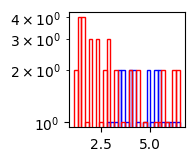

In [197]:
ax = plot_metric_distrib(metrics, "d_prime", fp_ids, tp_ids)

In [33]:
metrics

<module 'sklearn.metrics' from '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/stim-rep/envs/stimrep/lib/python3.9/site-packages/sklearn/metrics/__init__.py'>

# 1D-wave, all qmetrics

### Run 19


In [6]:
# parameters

# cebra
torch.manual_seed(0)  # reproducibility
MAX_ITER = 10000
TRAIN = False
DIMENSION = 10  # increase output dimensionality
SHOW_DIMS = [0, 1, 2]

# dataset
N_SPIKES = 50

# model parameters
model_cfg = {
    "model_architecture": "offset10-model",  # receptive field size
    "distance": "cosine",
    "batch_size": None,  # full batch
    "temperature_mode": "auto",
    "learning_rate": 0.001,
    "max_iterations": MAX_ITER,
    "conditional": "time_delta",
    "time_offsets": 10,  # 10 timesteps (should be >= nb of receptve fields)
    "output_dimension": DIMENSION,
    "device": "cuda_if_available",
    "verbose": True,
}

In [22]:
# Model datasets *************************
METRIC_NAMES = [
    "amplitude_cutoff",
    "amplitude_cv",
    "snr",
    "isi_violations_ratio",
    # "firing_rate",
    "firing_range",
    "sd_ratio",
    # "silhouette",
    # "rp_contamination",  # pca-based, very time consuming
    # "rp_violations", # pca-based, very time consuming
    # "d_prime", # pca-based, very time consuming
    # "l_ratio", # pca-based, very time consuming
    # "nn_hit_rate", # pca-based, very time consuming
    # "nn_miss_rate", # pca-based, very time consuming
    # "isolation_distance", # pca-based, very time consuming
]

# Test ("Spontaneous" by layer and pooled)
data_lyr_sp_20Khz_pm4_mixed_1dwave_qmall = get_dataset_by_layer(
    KS4_ns_10m,
    GT_ns_10m,
    WeNs,
    quality_path,
    "KS4",
    "NS",
    N_SPIKES,
    3,
    2,
    continuous_qmetrics=True,
    metric_names=METRIC_NAMES,
    qmetrics_in_dataset=True,
    load_if_exists=True,
    wave_dim=1,
)
data_pool_sp_20Khz_pm4_mixed_1dwave_qmall = get_dataset_pooled(
    data_lyr_sp_20Khz_pm4_mixed_1dwave_qmall
)

# Trained ()"Evoked" by layer and pooled)
data_lyr_ev_20Khz_pm4_mixed_1dwave_qmall = get_dataset_by_layer(
    KS4_ne_10m,
    GT_ne_10m,
    WeNe,
    quality_path,
    "KS4",
    "E",
    num_spike=N_SPIKES,
    interval_ms=3,
    downsample=1,
    continuous_qmetrics=True,
    metric_names=METRIC_NAMES,
    qmetrics_in_dataset=True,
    load_if_exists=False,
    wave_dim=1,
)
data_pool_ev_20Khz_pm4_mixed_1dwave_qmall = get_dataset_pooled(
    data_lyr_ev_20Khz_pm4_mixed_1dwave_qmall
)

/tmp/ipykernel_67194/822394399.py:461: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


Recording sampling frequency: 40000.0
calculating continuous quality metrics labels
Computing amplitude_cutoff
Computing amplitude_cv
Computing amplitude_median
Computing drift
Computing firing_range
Computing firing_rate
Computing isi_violation
Computing num_spikes
Computing presence_ratio
Computing rp_violation
Computing sd_ratio
Computing sliding_rp_violation
Computing snr
Computing synchrony
Computed quality metrics for layer 23
Computed quality metrics for layer 4
Computed quality metrics for layer 5
Computed quality metrics for layer 6


/tmp/ipykernel_67194/822394399.py:1334: RuntimeWarning: divide by zero encountered in scalar divide
  return np.absolute(np.std(amplitude) / np.median(amplitude))


ex. data shape (L4): (26, 6006)
ex. label shape (L4): (26,)
Recording sampling frequency: 20000.0


/tmp/ipykernel_67194/822394399.py:461: DeprecationWarning: Sorting.get_total_num_spikes() is deprecated and will be removed in spikeinterface 0.102, use sorting.count_num_spikes_per_unit()
  unit_spike = Sorting.get_total_num_spikes()


calculating continuous quality metrics labels


extract amplitudes:   0%|          | 0/3618 [00:00<?, ?it/s]

Computing amplitude_cutoff


/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/cebraspike3/lib/python3.9/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:848: UserWarning: Units [118, 135, 136, 138, 149, 153, 161, 166, 169, 241, 407, 432, 471, 480, 521, 578, 586, 618, 625, 626, 638, 691, 739, 793, 887, 923, 939, 971, 1088, 1117, 1120, 1124, 1140, 1149, 1180, 1182, 1189, 1195, 1202, 1213, 1214, 1216, 1224, 1239, 1242, 1250, 1256, 1260, 1265, 1266, 1280, 1284, 1293, 1294, 1300, 1304, 1312, 1320, 1327, 1330, 1331, 1333, 1336, 1337, 1338, 1347, 1353, 1356, 1376, 1383, 1391, 1394, 1398, 1407, 1408, 1410, 1414, 1421, 1423, 1438, 1448, 1450, 1454, 1462, 1463, 1478, 1486, 1488, 1492, 1494, 1506, 1513, 1515, 1518, 1521, 1533, 1534, 1543, 1552, 1554, 1560, 1564, 1570, 1574, 1588, 1598, 1605, 1608, 1611, 1636, 1642, 1699, 1707, 1713, 1728, 1739, 1751, 1795, 1860, 1861, 1888, 1891, 1923, 1978, 2038, 2047, 2102, 2139, 2157, 2159, 2177, 2191, 2212, 2228, 2240, 2293, 2308, 2341, 2350, 2362, 2368, 

Computing amplitude_cv
Computing amplitude_median
Computing firing_range
Computing firing_rate
Computing isi_violation
Computing num_spikes
Computing presence_ratio
Computing rp_violation
Computing sd_ratio
Computing sliding_rp_violation
Computing snr


/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/cebraspike3/lib/python3.9/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:235: RuntimeWarning: divide by zero encountered in scalar divide
  snrs[unit_id] = np.abs(amplitude) / noise


Computing synchrony


extract amplitudes:   0%|          | 0/3618 [00:00<?, ?it/s]

Computed quality metrics for layer 23
Computed quality metrics for layer 4
Computed quality metrics for layer 5
Computed quality metrics for layer 6


/tmp/ipykernel_67194/822394399.py:1334: RuntimeWarning: divide by zero encountered in scalar divide
  return np.absolute(np.std(amplitude) / np.median(amplitude))


ex. data shape (L4): (36, 6006)
ex. label shape (L4): (36,)


In [25]:
data_lyr_sp_20Khz_pm4_mixed_1dwave_qmall["label_l4"].shape

(26,)

In [ ]:
# (2h/load: 10s) train, test and evaluate
rez_e2s_20Khz_pooled_pms4_mixed_1dwave_qmall = train_test_eval(
    model_cfg,
    TRAIN,
    MODEL_PATH_20Khz_e2s_pm4_mixed_dataset_1dwave_qmall,
    data_lyr_ev_20Khz_pm4_mixed_1dwave_qmall,
    data_pool_sp_20Khz_pm4_mixed_1dwave_qmall,  # test
    data_pool_ev_20Khz_pm4_mixed_1dwave_qmall,
    SHOW_DIMS,
    tight_layout_cfg,
    mixed_model=False,  # qmetrics are not auxilary variable
)

## Test in vivo

* Hypothesis: if the model generalizes well, it should separate in vivo waveforms into two clusters on the extracted latent space.

# References 

(1) https://cebra.ai/docs/usage.html#  
(2) **about quality metrics**: https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html
(3) https://spikeinterface.readthedocs.io/en/0.100.5/modules/qualitymetrics.html?highlight=compute_quality_metrics#quality-metrics-module
